In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import nltk
from imblearn.over_sampling import SMOTE
import itertools
import re
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from autocorrect import spell
stop_words = set(stopwords.words('english')) 
from sklearn.preprocessing import LabelEncoder

In [2]:
words = set(nltk.corpus.words.words())

In [3]:
reviews=pd.read_csv("text_emotion.csv")

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
reviews['sentiment'].unique()

array(['empty', 'sadness', 'happiness', 'surprise', 'love', 'hate',
       'boredom', 'anger'], dtype=object)

In [6]:
def load_slang():
    slangdict = dict()
    with open('slang.txt','rt') as f:
        for line in f:
            spl = line.split('\t')
            slangdict[spl[0]] = spl[1][:-1]
    return slangdict

slang_words = load_slang()

In [7]:
# function to remove the elongated words
def remove_elongated(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

In [8]:
def data_cleaning(tweet, slang_words):
    
    lem = WordNetLemmatizer()
    
    tweet = re.sub("@[\w\d]+", "", tweet)           #delete any references to other people
    tweet = re.sub("http:[\w\:\/\.]+","", tweet)    #replace url's
    tweet = re.sub('[^[A-Za-z]\s]','', tweet)      #replace non alphabets and non spaces
    tweet=  re.sub('[^a-zA-Z]',' ', tweet)
    tweet = re.sub('[^\w\s]','', tweet)            #remove white spaces
    tweet = tweet.lower()
    
    tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    
    tokens = nltk.tokenize.word_tokenize(tweet)
    
    tokens = [token if token not in slang_words else slang_words[token] for token in tokens]
    
    tokens = [token for token in tokens if not token in stop_words]
    
    tokens = [lem.lemmatize(token) for token in tokens]
    tokens = [remove_elongated(token) for token in tokens]
    
    tokens = [spell(token) for token in tokens]
    
    tokens = [token if len(token)>1 else token.replace(token,"") for token in tokens ]
    
    return tokens
    

In [9]:
!pip install tqdm
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas(desc="Example Desc")
#reviews['content'] = reviews['content'].map(lambda x: data_cleaning(x, slang_words))
reviews['content'] = reviews['content'].progress_apply(lambda x: data_cleaning(x, slang_words))

In [10]:
reviews['content'] = reviews['content'].apply(lambda x: ' '.join(x))

In [11]:
from nltk import word_tokenize, pos_tag, pos_tag_sents
reviews['POSTags'] = pos_tag_sents(reviews['content'].apply(word_tokenize).tolist())

In [12]:
reviews['num_of_words'] = reviews["content"].str.split().apply(len)

In [13]:
reviews = reviews.drop(reviews[reviews.num_of_words < 2].index)

In [14]:
reviews['content'].apply(lambda x: print(x.split()))

['know', 'listening', 'bad', 'habit', 'earlier', 'started', 'Fredkin', 'part']
['laying', 'bed', 'headache', 'ughs', 'waiting', 'call']
['funeral', 'ceremony', 'gloomy', 'friday']
['want', 'hang', 'friend', 'soon']
['want', 'trade', 'someone', 'houston', 'ticket', 'one']
['pinging', 'go', 'prom', 'bc', 'boyfriend', 'like', 'friend']
['sleep', 'im', 'thinking', 'old', 'friend', 'want', 'married', 'damn', 'amp', 'want', 'scandalous']
['Charlene', 'love', 'miss']
['sorry', 'least', 'friday']
['cant', 'fall', 'asleep']
['choked', 'retainer']
['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude']
['watch', 'hill', 'london', 'realise', 'torture', 'week', 'week', 'late', 'watch', 'itonlinelol']
['got', 'news']
['storm', 'electricity', 'gone']
['sleepy', 'even', 'late', 'fail']
['lady', 'gaga', 'tweeted', 'impressed', 'video', 'leaking', 'know']
['convinced', 'always', 'wanted', 'signal', 'give', 'damn', 'think', 'lost', 'another', 'friend']
['oh', 'bad', 'hope', 'get', 'better', 'sleep', 'i

['need', 'pack', 'Cali', 'Cali', 'wait', 'thinking', 'glass', 'wine', 'order', 'celebrate', 'weekend', 'vara', 'still', 'work', 'morrow', 'tho']
['miserable', 'feel', 'like', 'im', 'Gona', 'cry', 'six']
['well', 'ran', 'beer', 'left', 'sure', 'eta', 'waiting', 'waiting', 'waiting', 'blew', 'gon', 'na', 'long', 'nite', 'methinks']
['nose', 'stud', 'fell', 'find', 'look', 'like', 'head', 'amsterdam', 'today', 'get', 'new', 'one']
['claire', 'love', 'show', 'got', 'office', 'radio']
['pat', 'Philly', 'love', 'mm', 'cheesesteak', 'miss', 'boyfriend', 'love', 'vacation']
['sigh', 'going', 'bed', 'feel', 'right', 'anymore']
['focused', 'tom', 'much', 'see', 'beloved', 'Barack', 'oh', 'must', 'vote', 'poor', 'president', 'vote']
['epicentre', 'Wheelock', 'place', 'tourist']
['depressed', 'watching', 'think', 'dance']
['cross', 'cause', 'stuck', 'twiddling', 'thumb', 'ugh']
['miss', 'th']
['know', 'like', 'said', 'idea', 'long', 'take', 'investigate', 'stuff']
['cant', 'sleep', 'im', 'sore', '

['friend', 'like', 'maiko', 'nedumaran', 'late', 'need', 'enemy', 'wrong', 'advice', 'wrong', 'time', 'led', 'numerous', 'death', 'amp', 'lost', 'cause', 'well']
['work', 'day']
['chillis', 'roomy', 'wait', 'zombie', 'clown', 'cr', 'gon', 'na', 'week']
['love', 'guitar', 'playing', 'think', 'sound', 'magnificent', 'better']
['refund', 'retrieve', 'account', 'take', 'like', 'week', 'hoping', 'thief', 'use', 'hack', 'permaban']
['im', 'cry', 'laugh', 'out', 'loud']
['cute', 'malay', 'girl', 'came', 'seems', 'room', 'rent', 'sadly', 'think', 'guyfreind', 'bit', 'misleading', 'disappointing', 'laugh', 'out', 'loud']
['epicentre', 'Wheelock', 'place', 'unit', 'amp', 'tourist', 'starting', 'today']
['hate', 'new', 'mt', 'dew', 'commercial', 'one', 'giant', 'mosquito', 'scare', 'gross', 'time']
['come', 'knight', 'well', 'hour']
['super', 'keen', 'drive', 'home', 'rain', 'additional', 'concentration', 'required', 'really', 'wan', 'na', 'deal']
['aw', 'let', 'secret']
['im', 'sorry', 'think', 

['rate', 'rocked', 'nashville', 'tonite', 'one', 'thing', 'sucked', 'encore', 'like', 'still', 'fun', 'show', 'Pearcy', 'hot', 'bad', 'boy', 'look']
['feeling', 'bad', 'got', 'bad', 'news', 'mum']
['dun', 'wan', 'na']
['damn', 'girl', 'ya', 'got', 'ta', 'let', 'know', 'get', 'kit', 'together', 'amp', 'got', 'flyer', 'next', 'weekend', 'quot']
['dbl', 'boo', 'sick', 'Flippin', 'blow', 'Bahama', 'no', 'dont', 'many', 'friend', 'either', 'feel', 'lame', 'haha']
['thats', 'thinking', 'time', 'gon', 'na']
['peep', 'still', 'fun', 'time', 'got', 'ta', 'sleep', 'tho', 'work', 'cool', 'hot', 'chick', 'none', 'cool', 'missing']
['feel', 'like', 'working', 'think', 'tweet', 'often']
['feel', 'sick', 'stomach', 'idea', 'why']
['Ineri', 'nific', 'special', 'sau', 'probabl', 'un', 'alt', 'weekend', 'pierdut']
['counting', 'hour', 'lost', 'sunshine', 'weekend']
['dude', 'saw', 'sf', 'pic', 'look', 'like', 'mini', 'excursion', 'pretty', 'kick', 'as', 'see', 'sun', 'tho']
['home', 'safely', 'hungry']


['sometimes', 'thing', 'say', 'hurt', 'one', 'love', 'unintentionally', 'never', 'ever', 'take', 'back', 'fix']
['ii', 'know', 'mean']
['fever', 'dont', 'feel', 'work']
['taking', 'horse', 'pill', 'hoping', 'get', 'sleep', 'tonight']
['PGP', 'student', 'PGP', 'student', 'year', 'back', 'wish', 'could', 'stay', 'one']
['missing', 'day', 'pas', 'quick', 'enough']
['hey', 'school', 'hate', 'place']
['working', 'home', 'today', 'back', 'killing', 'doctor', 'physio', 'later', 'today']
['back', 'work', 'distraction']
['demi', 'say', 'hi', 'enough', 'replay', 'please', 'love', 'much']
['www', 'never', 'noticed']
['suck', 'well', 'state', 'start', 'tomorrow', 'im', 'heading', 'bed', 'nizey', 'nite']
['look', 'like', 'going', 'nice', 'work', 'today', 'annoying', 'choice']
['guy', 'keep', 'set', 'list', 'forgot', 'ask', 'one', 'xx']
['first', 'impression', 'silverlight', 'sadly', 'based', 'saw', 'today', 'quite', 'problematic']
['desperately', 'hoping', 'dad', 'take', 'vanessa', 'game']
['hi', '

['laugh', 'out', 'loud', 'yeah', 'yeah', 'big', 'perv', 'hoping', 'see', 'next', 'week', 'scrapped', 'plan']
['rejecting', 'food', 'substance']
['trying', 'interview', 'dr', 'paul', 'Thomey', 'ceo', 'cann', 'phone', 'issue', 'cut', 'interview', 'min']
['add', 'MySpace', 'girly', 'asks', 'last', 'name', 'email']
['back', 'vienna', 'Soo', 'tired', 'luggage', 'lost', 'manchester', 'great', 'good', 'outcome', 'seminar', 'mb', 'amp', 'great', 'people', 'around']
['think', 'take', 'needle', 'watched', 'horribly', 'gory', 'short', 'film', 'drug', 'month', 'ago', 'scarred', 'life']
['wan', 'na', 'go', 'back', 'work', 'sleepy', 'time']
['feel', 'good']
['watching', 'biggest', 'loser', 'hallmark', 'never', 'fails', 'make', 'cry', 'yeh']
['suck', 'old', 'actually']
['thinking', 'getting', 'work']
['still', 'confuse']
['naughty', 'girl', 'tonight', 'disappointed']
['better', 'missy', 'telling', 'biggest', 'loser']
['noo', 'go', 'orlando', 'oh', 'my', 'god', 'gon', 'na', 'cry']
['sahh', 'Soo', 'swe

['ze', 'franz', 'friended', 'think', 'think', 'creepy', 'stalker', 'somma', 'mph']
['taking', 'back', 'horrible', 'shoe', 'mum', 'made', 'get', 'urged', 'nasty', 'footwear', 'problem', 'find', 'shoe']
['ran', 'money', 'sad', 'panda']
['find', 'today', 'first', 'kiss']
['cal', 'dachshund', 'rescue', 'found', 'home', 'foster', 'pup', 'max', 'Soo', 'sad', 'see', 'leave']
['wow', 'feel', 'like', 'ish', 'really', 'feel', 'bad', 'ignorant', 'holes', 'wont', 'overturn', 'prop']
['work', 'finish', 'pm', 'boo']
['wish', 'teased', 'movie', 'night']
['got', 'ta', 'what', 'till', 'next', 'week', 'by', 'the', 'way', 'Mumbai']
['dont', 'know', 'tired', 'today', 'bye', 'time', 'eddy']
['intentando', 'intentarlo']
['maybe', 'take', 'drinking', 'feel', 'massive', 'hangover', 'still', 'myself', 'today']
['really', 'bad', 'head', 'ache', 'gon', 'na', 'go', 'bed', 'might', 'back', 'maybe', 'bye', 'bye']
['friend', 'traveller', 'tale', 'held', 'farewell', 'party', 'kinda', 'disappointed', 'would', 'still',

['feel', 'really', 'weird']
['trying', 'self', 'learn', 'photoshop', 'going', 'well']
['ever', 'seen', 'tv', 'show', 'dead', 'like', 'died', 'became', 'grim', 'reaper', 'taking', 'people', 'soul', 'accident']
['sorry', 'thinking', 'hope', 'week', 'get', 'better']
['steam', 'punk', 'fashion', 'show', 'anime', 'north', 'first', 'year', 'since', 'torchon', 'back', 'til', 'amp', 'missed']
['throat', 'hurt', 'gon', 'na', 'go', 'read', 'go', 'bed', 'text', 'mee']
['dying', 'hangout', 'friday', 'afternoon']
['eh', 'cold']
['Mann', 'got', 'iPhone', 'im', 'jealous']
['fjdskal', 'im', 'really', 'frustrated']
['www', 'YouTube']
['wondering', 'come', 'mcdonald', 'take', 'long', 'deliver', 'food']
['ya', 'weather', 'super', 'weird', 'looked', 'like', 'gon', 'na', 'rain', 'today', 'course', 'darnitt']
['much', 'injustice', 'imagine', 'get', 'worse', 'get', 'better', 'afraid', 'doubt', 'sorry']
['miss', 'nostalgia', 'everyone', 'please', 'kick', 'tuskar']
['Soo', 'kind', 'sick', 'tired', 'guy', 'dish

['exam', 'slept', 'hour', 'last', 'night']
['oh', 'hell', 'way', 'tell']
['wish', 'lived', 'least', 'relatively', 'close', 'ohio', 'seen', 'almost', 'year']
['oh', 'crap']
['carlie', 'came', 'fell', 'asleep']
['within', 'short', 'time', 'last', 'clue']
['phone', 'still', 'doesnt', 'tweet']
['good', 'idea', 'brain', 'twitter']
['didnt', 'get', 'msg', 'bought', 'princess']
['trying', 'learn', 'quot', 'twitter', 'quot', 'thing', 'get', 'welcome', 'follower', 'though', 'im', 'interesting']
['checked', 'library', 'website', 'girl', 'dragon', 'tattoo', 'checked']
['laugh', 'out', 'loud', 'ik', 'figure', 'kept', 'year', 'without', 'needing', 'virus', 'software', 'get', 'fixed', 'sigh']
['first', 'puppy', 'gone', 'new', 'home']
['unhappy', 'hate', 'affecting', 'everything', 'relationship', 'people', 'personality', 'attitude']
['nothing', 'right', 'tired', 'want', 'sleep', 'cleaned', 'pretty', 'good', 'proud', 'least', 'good', 'janitor']
['feeling', 'extremely', 'ill']
['oh', 'im', 'offended', 

['me', 'almost', 'sleep', 'finished', 'anything', 'close', 'cancel', 'doom']
['hospital', 'unnerve', 'waiting', 'doc', 'flipping', 'thru', 'magazine']
['ah', 'safeway', 'yet', 'vote', 'need', 'vote']
['want', 'monte', 'Kristo', 'sandwich', 'Soo', 'bad']
['awake', 'migrate', 'yet', 'tummy', 'hurting', 'evil', 'is']
['finished', 'watching', 'quot', 'Marley', 'quot']
['wanted', 'go']
['guy', 'gon', 'na', 'tour', 'short', 'stack', 'missed', 'last', 'tour', 'friend', 'went', 'said', 'mad']
['ee', 'jealous', 'Sia', 'didnt', 'get', 'see']
['im', 'little', 'oven', 'tonight']
['argh', 'bored', 'bored', 'nothing', 'except', 'slouch', 'computer', 'day', 'long']
['wow', 'really', 'really', 'ill']
['nina', 'lap', 'decided', 'jump']
['swine', 'flu', 'Robina', 'gold', 'coast']
['going', 'miss', 'miss', 'Shana']
['unstable', 'broadband', 'electricity', 'taking', 'toll', 'mental', 'stability']
['sink', 'hospital', 'toilet', 'low', 'crotch', 'grey', 'suit', 'spattered', 'water', 'time', 'physio']
['mary

['watching', 'jay', 'leno', 'nd', 'last', 'tonight', 'show', 'gone', 'day', 'without', 'leno', 'like', 'four', 'years']
['got', 'home', 'downtown', 'dead', 'plus', 'im', 'kinda', 'weather', 'got', 'ta', 'get', 'work', 'tomorrow']
['honestly', 'feel', 'like', 'healing', 'getting', 'better', 'good']
['thingsmummysaid', 'need', 'learn', 'wash', 'dish', 'laundry', 'always', 'right']
['Soo', 'dont', 'want', 'go', 'work', 'today', 'nice', 'outside']
['oh', 'my', 'god', 'mcdonald', 'combo', 'wends', 'sundae', 'puke', 'material']
['really', 'need', 'sort', 'bird', 'table', 'feeder', 'robin', 'blue', 'tit', 'bullied']
['finished', 'listening', 'last', 'day', 'krypton', 'audio', 'book', 'loved', 'sad', 'though']
['got', 'ta', 'lot', 'work', 'knocked', 'project', 'one', 'feature', 'refuse', 'work', 'right', 'release', 'next', 'version']
['tired', 'cant', 'sleep']
['yesterday', 'friend', 'mine', 'thrown', 'horse', 'lorry', 'drove', 'past', 'ignoring', 'signaling', 'slow']
['sleeping', 'im', 'work'

['epicfail', 'joseph', 'class', 'long', 'Liao']
['www', 'poor', 'tank', 'friend', 'guild', 'fucking', 'promising', 'main', 'ot', 'barely', 'even', 'get', 'go']
['morning', 'class', 'always', 'late', 'bunk', 'someone', 'wake']
['tweeting', 'much', 'even', 'paying', 'attention']
['daddy', 'life', 'manchester', 'love', 'hull', 'bitch', 'mate', 'wan', 'na', 'go']
['yeah', 'dry']
['physical', 'coo', 'know', 'letting', 'steam']
['busy', 'day', 'disappointed', 'today', 'show', 'repeat']
['god', 'piss', 'always', 'enter', 'comp', 'amp', 'never', 'win', 'sore', 'loser']
['wanted', 'change', 'handset', 'cover', 'pen', 'drive', 'headphone', 'place', 'guess', 'happening']
['jessie', 'gone', 'away', 'weekend', 'miss', 'already']
['something', 'wrong', 'tired', 'barely', 'keep', 'eye', 'open', 'yet', 'done', 'last', 'hr', 'toss', 'amp', 'turn', 'bed']
['stop', 'loosing', 'worst', 'month', 'result', 'ever', 'bubble', 'two', 'time', 'row']
['hd', 'full', 'need', 'cleanup', 'lot']
['awake', 'mum', 'tur

['sleep', 'thought', 'im', 'hungry', 'whipped', 'pb', 'amp', 'milk', 'hopefully', 'work']
['tweet', 'last', 'hour', 'nobody', 'like', 'tweetboard']
['im', 'Saad', 'need', 'someone', 'talk']
['bored', 'barely', 'even', 'tweet', 'nothing', 'talk', 'boredboots']
['tshwane', 'want', 'double', 'rate', 'try', 'phone', 'get', 'service', 'endless', 'loop', 'fail']
['never', 'invite']
['head', 'killing', 'keep', 'sneezing', 'think', 'boyfriend', 'fell', 'asleep', 'great']
['saying', 'goodbye', 'something', 'familiar', 'never', 'becomes', 'familiar']
['tired', 'climb', 'bed', 'fall', 'asleep', 'hope', 'weekend', 'fun', 'couple', 'week', 'left']
['bad', 'day', 'got', 'worse']
['bus', 'going', 'work', 'oh', 'my', 'god', 'seriously', 'im', 'Soo', 'tired', 'dont', 'know', 'survive', 'hour', 'shift']
['said', 'home', 'min', 'tweet', 'laugh', 'out', 'loud']
['need', 'snuggle', 'work', 'like', 'snuggle', 'ironic', 'huh']
['hi', 'anyone']
['headache', 'last', 'night', 'morphed', 'hangover', 'time', 'dri

['horrible', 'dream', 'scary', 'face', 'im', 'awake', 'rest', 'night', 'god', 'dammit']
['thought', 'going', 'another', 'def', 'jam', 'fighting', 'game', 'turned', 'crappy', 'karaoke', 'game', 'miss', 'fighting']
['argh', 'annoyed', 'yet', 'gone', 'Starbucks', 'amp', 'given', 'skimmed', 'milk', 'instead', 'soy', 'milk', 'milk', 'hav', 'throw', 'away', 'expensive']
['sent', 'donation', 'eric', 'wanted', 'put', 'banner', 'avatar', 'disappeared', 'tried']
['confused', 'people', 'pose', 'others', 'twitter', 'mean', 'really', 'homework', 'people', 'life', 'imitate', 'sad']
['twitter', 'mean', 'pic', 'lately', 'stole', 'mine', 'entire', 'day']
['non', 'european', 'managed', 'dump', 'sun', 'gon', 'na', 'hot', 'time']
['ugh', 'knee', 'injury', 'except', 'mine', 'infected', 'cut', 'hurt', 'like', 'hell']
['using', 'tiffy', 'computer', 'feel', 'different', 'mine', 'touch', 'different']
['would', 'ideal', 'however', 'dont', 'see', 'leaving', 'gon', 'na', 'take', 'rain', 'check']
['logging', 'yet'

['talk', 'buttershots', 'wanting', 'maybe', 'small', 'bit', 'ice', 'since', 'faire']
['way', 'exam', 'nervous', 'bah']
['happy', 'wake', 'call', 'morning', 'going', 'grumpy', 'later']
['want', 'zone', 'love', 'pod', 'ahahah']
['nightshirt', 'still', 'working', 'luckily', 'fun', 'turn', 'music', 'one', 'else', 'office', 'yay']
['racoon', 'ate', 'bread']
['missed', 'everyone', 'tonight']
['today', 'marking']
['ugh', 'two', 'week', 'push', 'produce', 'six', 'pack', 'produced', 'nothing', 'pain']
['standing', 'open', 'hand', 'know', 'alone', 'hold', 'hold', 'baby', 'hold', 'geez']
['Bryna', 'find', 'yr', 'old', 'junt', 'stable', 'job', 'good', 'home', 'extra', 'room', 'baggage', 'tired', 'young', 'dude']
['daisee', 'bad', 'see', 'lens', 'flare', 'around', 'listening', 'xd', 'cant', 'really', 'catch', 'saying', 'tho']
['may', 'try', 'prism']
['dang', 'internet', 'night']
['get', 'good', 'download', 'speed', 'one', 'else', 'using', 'connection']
['yikes', 'ant', 'everywhere', 'house', 'ant',

['hate', 'continually', 'getting', 'sick', 'whenever', 'exam']
['missed', 'Otha', 'disney', 'day', 'yesterday']
['wan', 'na', 'go', 'vivid', 'light', 'walk']
['want', 'ride', 'bicycle', 'today', 'cold', 'cloudy', 'today']
['song', 'come', 'goodbye', 'stuck', 'head', 'good', 'song', 'singing', 'considering', 'situation']
['went', 'green', 'yesterday', 'missed', 'get', 'another', 'certificate']
['weird', 'really', 'want', 'harry', 'potter', 'bed', 'spread', 'pillow', 'wish', 'could', 'find', 'one', 'gryffindor']
['heading', 'hospital', 'sort', 'back', 'looking', 'forward']
['im', 'gon', 'na', 'go', 'bed', 'alone', 'sad', 'day', 'itll', 'get', 'better']
['ready', 'productive', 'friday', 'one', 'last', 'year']
['im', 'hell', 'pushing', 'tha', 'graduation', 'sorry', 'couldnt', 'smash', 'thru']
['sick', 'amp', 'tired', 'sick', 'amp', 'tired']
['wish', 'private', 'jet', 'go', 'see', 'best', 'friends', 'forever', 'time', 'like', 'ok', 'ok', 'ot', 'really', 'thinking', 'carbon', 'footprint']
['

['housemate', 'saw', 'angel', 'amp', 'demon', 'last', 'night', 'left', 'home', 'looking', 'forward', 'seeing', 'wanted', 'reminisce']
['going', 'chicago']
['starting', 'get', 'cold']
['gawd', 'people', 'still', 'remember', 'preggers', 'comment', 'hate']
['think', 'finally', 'reached', 'point', 'life', 'need', 'nasal', 'hair', 'trimmer']
['hmm', 'disappointed', 'made', 'serving', 'able', 'enjoy', 'one', 'stomach', 'full', 'wishing', 'company', 'help']
['ugh', 'down', 'good']
['why', 'still', 'awake', 'work', 'good']
['really', 'think', 'wee', 'callum', 'got', 'last', 'night']
['taking', 'forever', 'get', 'im', 'bored']
['hair', 'cut', 'today', 'boyfriend', 'notice']
['ew', 'tongue', 'kiss']
['wall', 'jericho', 'please', 'come', 'worcester', 'asap', 'Candace', 'pleeaassee', 'flee', 'seen', 'call', 'quits', 'why']
['pretty', 'sure', 'ISI', 'tapeworm', 'allowed', 'snuggle', 'want', 'tonight']
['still', 'working']
['feel', 'like', 'getting']
['gone', 'day', 'wen', 'used', 'sit', 'exam', 'ex

['havent', 'heard', 'anything', 'show', 'hasnt', 'saturday', 'night', 'occasional', 'sunday', 'rerun']
['www', 'cant', 'wait', 'till', 'get', 'sydney', 'missed', 'ticket', 'tho', 'xx']
['miss', 'come', 'back', 'home', 'honey']
['falling', 'asleep', 'waking', 'gun', 'shot', 'arent', 'fun']
['concerned', 'family']
['never', 'forgive', 'burying', 'erotica', 'snuffing', 'love']
['fix', 'bike', 'chain', 'way', 'work', 'arrived', 'filthy', 'bloody', 'mess', 'lovely', 'weather', 'though']
['seen', 'knocked', 'top', 'spot', 'follow', 'perth']
['six', 'may', 'bar', 'nor', 'know']
['came', 'back', 'germany', 'yesterday', 'five', 'day', 'uk']
['cant', 'sleep', 'amp', 'miss', 'long', 'hair']
['really', 'want', 'see', 'quot', 'quot']
['mom', 'ok', 'far', 'missing', 'baron']
['such', 'info', 'ticketed', 'yet', 'heap', 'excited', 'though', 'dont', 'care', 'much', 'hope', 'much']
['called', 'toyota', 'car', 'ready', 'til']
['im', 'finally', 'going', 'home', 'didnt', 'get', 'finish', 'work', 'ill', 'ba

['doc', 'getting', 'younger', 'day', 'guess', 'yup', 'nut', 'paying', 'ear', 'doc', 'visit', 'ouch']
['well', 'going', 'try', 'sleep', 'work', 'tomorrow', 'weekend', 'start']
['mum', 'said', 'probably', 'wont', 'get', 'also', 'go', 'like', 'month', 'normal', 'right']
['im', 'cold', 'still', 'cant', 'find', 'hoodie']
['eating', 'springles', 'nearly', 'really', 'reminds', 'touring', 'Jonas', 'brother', 'ask', 'miss', 'much']
['even', 'know', 'sporting', 'social', 'enterprise', 'mean']
['pic', 'show', 'boo', 'pic', 'site', 'show']
['yummy', 'chocolate', 'cake', 'wish', 'even', 'got', 'one', 'day', 'anybody', 'listening']
['um', 'arent', 'episode', 'lost', 'season', 'abc', 'good', 'thing', 'im', 'going', 'vega', 'keep', 'distracted', 'tragedy']
['white', 'accidentally', 'left', 'colour']
['going', 'back', 'manila', 'evening', 'trip', 'cebu', 'biting']
['posted', 'first', 'video', 'contest', 'entry', 'still', 'terrible', 'boo', 'love', 'you', 'are', 'video', 'by', 'the', 'way', 'xxrebelrebe

['woken', 'feeling', 'little', 'special', 'dont', 'thing', 'drink', 'bar', 'dry', 'card', 'finally', 'sober', 'home', 'time', 'think']
['bummer', 'tomorrow', 'friday']
['poor', 'buddy', 'teased', 'mini', 'puggy', 'think', 'need', 'pughug']
['screw', 'fact', 'post', 'long', 'update', 'twitter']
['eBay', 'mile', 'rule', 'working', 'many', 'pair', 'leather', 'trouser', 'sold', 'aberdeen', 'try', 'next', 'week']
['thanks', 'used', 'therm', 'pry', 'like', 'concrete', 'blood', 'everything', 'lot', 'better', 'thank', 'god']
['much', 'debate']
['hey', 'got', 'text', 'sm', 'plan', 'maybe', 'catching', 'flick', 'tonight', 'last', 'night', 'wee', 'bit', 'much']
['breakupwords', 'changed']
['four', 'full', 'day', 'left', 'aussie', 'land', 'want', 'go', 'home']
['freakyfriday', 'slipped', 'shower', 'fell', 'lucky', 'escape', 'couple', 'concussion']
['damn', 'failed', 'assassination', 'attempt', 'louis']
['damn', 'missed']
['still', 'awake', 'sma', 'suck']
['headache', 'cold']
['grr', 'allowed', 'ga

['ever', 'realized', 'never', 'fully', 'everything', 'want', 'feeling']
['know', 'hell', 'wish', 'could', 'mom', 'move', 'across', 'usa']
['hell', 'awake', 'early']
['gutted', 'invited', 'BBQ', 'tomorrow', 'night', 'gon', 'na', 'miss', 'but', 'final', 'wonder', 'wheel', 'tv', 'outside']
['know', 'wear']
['sad', 'best', 'friend', 'selfish', 'heartless', 'exclude', 'life', 'completely', 'sad']
['working', 'oral', 'presentation', 'upset']
['nt', 'online', 'today', 'amp', 'may', 'whole', 'next', 'week', 'havent', 'voted', 'PLS']
['sad', 'true', 'shouldnt', 'right']
['wordsaftersex', 'think', 'im', 'bleeding']
['supposed', 'great', 'weather', 'today', 'amp', 'moro', 'luck', 'im', 'stuck', 'work', 'day']
['miss', 'Soo', 'much']
['lost', 'friend', 'alone', 'sleepy', 'wan', 'na', 'go', 'home']
['didnt', 'get', 'joke']
['Firefox', 'ok', 'opera', 'ie', 'footer', 'ok']
['concentrate', 'need', 'booster', 'work']
['also', 'really', 'missing', 'sami', 'thought', 'would', 'throw', 'one']
['thanks', '

['fo', 'swizzle', 'bored', 'wan', 'na', 'go', 'something', 'wish', 'went', 'pisay', 'today', 'oh', 'well', 'wonder']
['thats', 'actually', 'fun', 'would', 'think', 'hurting', 'week', 'similar', 'experience']
['listening', 'someday', 'know', 'raining']
['everyone', 'seems', 'love', 'felt', 'kinda', 'lazy', 'reputative', 'really', 'disappointed']
['de', 'examen', 'al', 'be']
['lovely', 'day', 'sky', 'clear', 'bird', 'singing', 'stuck', 'office', 'window', 'hour']
['want', 'friend', 'need', 'friend', 'right']
['saying', 'goodbye', 'sydney', 'day', 'hello', 'Grapeville', 'miss', 'pretty']
['yeah', 'finish', 'go', 'home', 'get', 'changed', 'etc', 'etc', 'im']
['ah', 'huge', 'fan', 'getting', 'middle', 'night', 'change', 'peed', 'sheet', 'underpants']
['nothing', 'could', 'get', 'worse', 'could', 'think', 'id', 'verge', 'killing', 'someone', 'else', 'thing', 'good', 'anymore']
['oh', 'love', 'oreo', 'get', 'many', 'variety', 'uk']
['work', 'early', 'frustrating', 'work', 'get', 'frustrated',

['trouble', 'finished', 'reading', 'crow', 'road', 'book', 'club', 'today', 'afraid', 'lazy', 'mare']
['wishing', 'day', 'day', 'people', 'wanted', 'party']
['irk', 'headed', 'meeting']
['guess', 'cant', 'help', 'byee', 'Eva', 'really', 'sad']
['leave', 'calcutta', 'delhi', 'lucknow', 'tomorrow', 'day', 'absence']
['hate', 'quot', 'nowhere', 'quot', 'stuff']
['rebuilding', 'dev', 'machine', 'disk', 'crash', 'last', 'night']
['si', 'dont', 'think', 'nite', 'sadly', 'im', 'clot', 'pain', 'day', 'amp', 'bad', 'nite', 'go', 'anotta', 'week', 'soon', 'xx']
['believe', 'awake', 'start', 'getting', 'ready', 'soon', 'hate', 'doctor']
['sick', 'tired', 'people', 'steal', 'people', 'work']
['daddy', 'wanted', 'buy', 'shoe', 'prettier', 'expensive', 'no', 'haff', 'go', 'bearfoot']
['much', 'bro']
['back', 'work', 'warm', 'today']
['lobbying', 'twitter', 'yuk', 'getting', 'rid', 'groupie']
['another', 'letter', 'one', 'car', 'insurance', 'ouch']
['miss', 'terribly']
['went', 'athletics', 'carnival

['shut', 'face', 'mean', 'pedro', 'supposed', 'mean', 'one']
['ffa', 'evil', 'grin', 'busy', 'work', 'today', 'get', 'anything', 'done']
['dont', 'iPhone', 'maybe', 'next', 'week']
['jus', 'woke', 'late', 'running', 'work', 'student', 'train']
['always', 'tired', 'always', 'cold', 'always', 'headache', 'cant', 'wait', 'vacashun', 'friskin', 'grin', 'update', 'want', 'onscreen', 'keyboard', 'dammit']
['need', 'aussie']
['oh', 'my', 'god', 'going', 'see', 'another', 'reason', 'live', 'devon', 'none', 'cinema', 'film', 'im', 'annoyed']
['way', 'quot', 'stabilise', 'quot', 'shaky', 'video', 'post', 'production', 'apparently', 'shaky', 'hand']
['aa', 'hate', 'fucking', 'kinship']
['room', 'oven']
['think', 'may', 'time', 'lemsip', 'soon', 'cold', 'really', 'suck']
['go', 'doctor', 'want', 'cause', 'wait', 'Soo', 'long']
['fell', 'stair', 'dancing', 'sword', 'fell', 'bum', 'hurt']
['meeting', 'discussion', 'colour', 'bikeshed']
['proud', 'excels', 'video', 'photo', 'editing', 'pc', 'lag', 'm

['close', 'think', 'running', 'long', 'still', 'chance', 'see']
['sleep', 'ugh', 'shit', 'damn', 'day', 'tomorrow', 'wanting', 'take', 'sleeping', 'pill', 'know', 'ill', 'get', 'late']
['sassafras', 'reminds', 'Rachel', 'miss']
['youre', 'supposed']
['thanks', 'follow', 'isafailure', 'supposed', 'team', 'thing', 'friend', 'emailed', 'communicated', 'ever']
['oh', 'yes', 'sure', 'sad', 'cause', 'miss', 'view', 'house', 'leaving', 'actually']
['hindi', 'flick', 'came', 'couple', 'week', 'ago', 'never', 'made', 'uk']
['liesboystell', 'one', 'love', 'really', 'several', 'woman']
['boyfriend', 'gig', 'portland', 'driving', 'distance', 'come', 'save', 'burbank', 'stuck', 'atm', 'working', 'plan']
['www', 'watching', 'Britney', 'sal', 'young', 'cute', 'really', 'funny', 'miss', 'Britney']
['good', 'sorry', 'hear', 'park']
['working', 'bit']
['got', 'tweet', 'suck', 'love']
['house', 'bound', 'acute', 'mumps', 'bad', 'time', 'whole', 'day', 'OV', 'supernatural', 'think']
['sadly', 'awake', 'wo

['time', 'got', 'back', 'grizzly', 'peak', 'camera', 'capture', 'sea', 'fog', 'already', 'engulfed', 'everything']
['yep', 'freezing', 'hate', 'winter', 'im', 'literally', 'wearing', 'blankets']
['ulcer', 'got', 'big', 'one', 'mouth']
['happened', 'installing', 'office', 'mac', 'badmicrosoft']
['dual', 'reject']
['room', 'hot', 'sleep']
['shit', 'wide', 'awake']
['mei', 'missing', 'dad', 'year']
['funny', 'want', 'something', 'even', 'someone', 'else', 'cant', 'anymore', 'ahahah', 'next']
['wrong', 'maybe', 'help']
['definitely', 'feel', 'sorry', 'Jamie', 'stewart', 'amsterdam', 'audience', 'really', 'suck', 'WW', 'xiuxiu', 'org', 'read', 'post', 'may', 'th']
['look', 'like', 'beautiful', 'day', 'work', 'til', 'sunday', 'yay', 'BBQ', 'yet', 'though', 'gon', 'na', 'postpone', 'invitation']
['thought', 'payday', 'today', 'saturday', 'happy', 'hour', 'wont', 'happening', 'today', 'laugh', 'out', 'loud', 'thank', 'goodness', 'friday', 'tho']
['thanks', 'bro', 'awake', 'already']
['feeling'

['mc', 'john', 'sim', 'posit', 'yr', 'passed', 'softens', 'stranded', 'without', 'warren', 'tea', 'tech', 'spec', 'aching']
['three', 'first', 'week', 'june']
['joke', 'long', 'tweet']
['glorious', 'went', 'outside', 'gone', 'cold', 'cloudy']
['felt', 'like', 'crap', 'behaved', 'like', 'son', 'ate', 'compensate', 'pigged', 'home', 'roasted', 'sugar', 'almond', 'painful', 'tum', 'threw', 'still', 'feel', 'sick']
['right', 'richard', 'marx', 'right', 'waiting', 'really', 'making', 'feel', 'nauseatingly', 'sad']
['ugh', 'neck', 'really', 'hurt', 'aquatards', 'box']
['week', 'dragged', 'bit', 'essay', 'write', 'seaside', 'im', 'seeing', 'Eddie', 'izzard', 'tonight']
['miss', 'captain']
['den', 'fell', 'asleep']
['want', 'need', 'soon']
['dentist', 'le', 'hour', 'arrgghh', 'like', 'teeth', 'way', 'except', 'toothache', 'minor', 'quibble']
['boo', 'least', 'give', 'mantanence', 'waited', 'long', 'hint', 'clue', 'full', 'detail', 'PLS']
['ready', 'weekend', 'yay', 'even', 'though', 'im', 'luc

['wish', 'coming', 'perth']
['good', 'think', 'fault', 'though', 'use', 'buttermilk', 'recipe', 'back', 'flour']
['alive', 'work', 'finish', 'sun']
['doesnt', 'sound', 'like', 'good', 'situation']
['headed', 'hospital', 'take', 'pain', 'anymore']
['big', 'fan', 'costa', 'ended', 'going', 'eat', 'one', 'outside', 'office']
['absolutely', 'boiling', 'got', 'factor', 'must', 'turn', 'orange', 'must', 'look', 'like', 'pompa', 'lump', 'left', 'shoulder', 'burnt', 'yesterday']
['waiting', 'bus', 'bus', 'going', 'uncomfortably', 'hot', 'bet']
['going', 'nag', 'tonight']
['oh', 'nice']
['got', 'excited', 'thought', 'exhibit', 'sydney']
['across', 'water', 'damned', 'expensive']
['cause', 'give', 'reason', 'assume']
['whole', 'whole', 'addiction', 'talk', 'brother', 'lady', 'broke', 'couldnt', 'help', 'cry']
['wish', 'someone', 'would', 'mm', 'Mariya', 'mf', 'lens', 'need', 'money']
['got', 'bullied', 'zillah', 'help']
['study', 'exam', 'tom']
['adjust', 'finished', 'watching', 'prison', 'break

['deck', 'building', 'buddy', 'missing', 'action']
['cat', 'missing', 'day', 'freaking']
['tried', 'translate', 'tweet', 'using', 'google', 'translation', 'service', 'spat', 'back']
['reading', 'taking', 'note', 'understanding', 'none', 'help']
['worm', 'either', 'escaped', 'died', 'bum']
['dam', 'vote', 'gon', 'na', 'win', 'anything']
['feel', 'used', 'hate', 'guy', 'grr']
['real', 'stressed']
['ooh', 'lush', 'cant', 'sunbathe', 'burn', 'way', 'easily', 'even', 'sun', 'cream', 'im', 'great', 'thanks', 'lovely', 'sunny', 'day']
['twitterberry', 'wont', 'work', 'friend']
['oh', 'man', 'sold', 'step', 'away', 'desk', 'min', 'right']
['sorry', 'didnt', 'mean', 'hope', 'think', 'positively', 'looking', 'back']
['sick', 'suck', 'im', 'ohbabayy']
['read', 'first', 'thought', 'using', 'cast', 'lt', 'gt', 'status', 'symbol']
['ahahah', 'sana', 'someone', 'selling', 'full', 'version', 'quot', 'coding', 'workshop', 'photo', 'recovery', 'wizard', 'quot', 'cd', 'demo', 'mode', 'lang', 'eh']
['foun

['yoga', 'tonight', 'going', 'try', 'pilate', 'let', 'see', 'many', 'un', 'used', 'muscle', 'discover']
['going', 'see', 'star', 'trek', 'tomorrow', 'night', 'time', 'full', 'IMAX', 'glory', 'hope', 'motion', 'sickness', 'get', 'better']
['please', 'vote', 'husband', 'Jorge', 'star', 'game', 'vote', 'anymore']
['ooh', 'whatchy', 'going', 'monsterpalooza', 'weekend', 'ink', 'stressed', 'contestant', 'year', 'miss']
['much', 'work', 'drink', 'love', 'afternoon', 'pub']
['got', 'ill', 'tomorrow', 'got', 'birthday']
['FMk', 'worst', 'paper', 'cut', 'knuckle', 'paper', 'handling', 'hat', 'damn', 'research', 'paper']
['tom', 'wondering', 'tour', 'asia', 'specifically', 'philippine', 'chance', 'soon']
['sat', 'sunbathing', 'bombed', 'church', 'day', 'left', 'missed']
['argh', 'interested', 'time', 'maybe', 'go', 'maybe']
['watching', 'chicago', 'honey', 'im', 'miss', 'hey', 'arnold', 'wild', 'thornberrys']
['congrats', 'graduate', 'beautiful', 'thing', 'amp', 'big', 'deal', 'jus', 'wish', 'cu

['well', 'ya', 'please', 'send', 'levin', 'im', 'sensing', 'deep', 'fiery', 'anger', 'surrounding', 'presence', 'right']
['weather', 'suck', 'raining']
['im', 'feeling', 'like', 'getting', 'motion', 'go', 'work']
['wow', 'EMC', 'new', 'site', 'different']
['happy', 'birthday', 'dork', 'lot', 'love', 'today', 'wish', 'could', 'buy', 'drink', 'make', 'great', 'night']
['surprised', 'Leyton', 'isnt', 'putting', 'much', 'fight']
['last', 'night', 'recall', 'invited']
['oh', 'my', 'god', 'tragic']
['got', 'fever', 'half', 'dead']
['hate', 'weather']
['Soo', 'close']
['gon', 'na', 'new', 'transformer', 'come', 'colombia']
['invidia', 'ion', 'based', 'Renovo', 'ideapad', 'awesome', 'fn', 'key', 'left', 'ctrl', 'make', 'non', 'starter', 'though']
['notion', 'video', 'deleted']
['play', 'world', 'conflict', 'computer', 'running', 'slow']
['yep', 'drank', 'bawls', 'morning', 'bawls', 'last']
['chillis', 'promoting', 'muzjik', 'eating', 'lmaao']
['bad', 'start', 'day', 'sweating', 'butt', 'range'

['suck', 'fast', 'internet', 'dial', 'suck', 'everything', 'take', 'long', 'load', 'way', 'would']
['boo', 'finally', 'could', 'get', 'back', 'internet', 'went']
['one', 'downside', 'nice', 'weather', 'brings', 'chaos']
['wishing', 'got', 'fit']
['need', 'something', 'excruciating', 'headache']
['thought', 'exactly', 'leaving', 'dog', 'al', 'hate', 'see', 'luggage', 'come']
['mother', 'taking', 'gambit', 'vet', 'today', 'hope', 'nothing', 'serious']
['bad', 'net', 'issue', 'wed', 'broadcast', 'tonight', 'tho', 'tune', 'new', 'anthem', 'bad', 'mixing']
['afraid', 'much', 'realized', 'true', 'difficulty', 'design', 'may', 'cry', 'soon', 'idmfinal']
['sick', 'sans', 'coming', 'good']
['someone', 'stole', 'new', 'laptop', 'airport', 'even', 'used', 'guess', 'economy', 'breeding', 'new', 'set', 'quot', 'opportunists', 'quot']
['haha', 'cunt', 'get', 'ticket', 'dublin', 'Soo', 'upset']
['dislike', 'math', 'math', 'hate']
['tanning', 'emily', 'bad', 'prob', 'gon', 'na', 'rain']
['think', 'hay

['father', 'staying', 'home', 'conference', 'calling', 'sorry']
['got', 'ta', 'drop', 'car', 'part', 'buddy', 'press', 'dentist']
['hmm', 'stuck', 'uploaded', 'picture', 'show', 'urgently', 'need', 'serious', 'twitter', 'help', 'laugh', 'out', 'loud']
['think', 'ive', 'buggered', 'mobile', 'ack', 'stubborn', 'arse', 'refuse', 'get', 'new', 'one']
['weekend', 'getting', 'close', 'bad', 'stuck', 'north', 'hopefully', 'able', 'get', 'next', 'weekend', 'real', 'life', 'fun']
['outside', 'hour', 'sun', 'bloody', 'hot', 'tan', 'wait', 'monday', 'spend', 'around', 'hour', 'outside']
['ala', 'best', 'offer', 'small', 'pony', 'rowing', 'boat']
['pretty', 'warm', 'forgot', 'sick', 'though']
['recorded', 'sent', 'people', 'obviously', 'meant', 'get', 'feel', 'bad']
['put', 'dog', 'tomorrow']
['shower', 'doctor', 'appointment']
['sunglass', 'broke']
['ahh', 'haha', 'cute', 'together', 'gt', 'lt', 'cutest', 'couple', 'really', 'sweet']
['lost', 'Nintendos', 'upsetting']
['believe', 'gorgeous', 'wea

['bar', 'exam', 'madness', 'topic', 'today', 'tort']
['breaking', 'news', 'broiler', 'burger', 'king', 'burger', 'burger', 'king', 'lunch', 'least', 'chicken', 'fry']
['download', 'failed', 'phone', 'like', 'phone']
['around', 'hour', 'left', 'day', 'weekend', 'way', 'much', 'work']
['think', 'people', 'nice', 'would', 'anyone', 'think', 'ok', 'say', 'much', 'le', 'make', 'movie']
['want', 'party']
['www', 'contracted']
['www', 'you', 'are', 'already', 'gone']
['time', 'fly', 'never', 'got', 'right', 'oh']
['loving', 'sunshine', 'hating', 'thought', 'office', 'without', 'window']
['into', 'arent', 'wan', 'na', 'go', 'meet', 'kyle', 'im', 'obsessed', 'fair']
['yep', 'jimmy', 'buffets', 'FTW', 'jimmy', 'need', 'tweet', 'word', 'wisdom', 'every', 'morning']
['hey', 'bunch', 'event', 'Facebook', 'jenny', 'invited', 'sad']
['want', 'rain', 'today', 'like', 'full', 'thunderstorm', 'style', 'probably']
['trying', 'shop', 'online', 'wi', 'could', 'find', 'seven', 'haha']
['better', 'come', 'ba

['sitting', 'bed', 'wanting', 'go', 'work']
['guess', 'ive', 'got', 'wow', 'impossible']
['never', 'thought', 'say', 'miss', 'job', 'commute', 'cubicle', 'free', 'food', 'amp', 'coffee', 'downtown', 'quit']
['really', 'want', 'limo', 'service', 'take', 'airport', 'want', 'ok', 'soft', 'moment', 'get', 'use']
['cheer', 'wish', 'font', 'play']
['ran', 'Facebook', 'quiz', 'laugh', 'out', 'loud', 'grocery', 'shopping', 'work']
['twitter', 'look', 'funny', 'someone', 'help']
['ugh', 'trying', 'respond', 'email', 'voicemail', 'Facebook', 'message', 'missed', 'town', 'could']
['aah', 'taking', 'back', 'sunday', 'playing', 'new', 'york', 'day', 'leave']
['ruined', 'perfectly', 'delicious', 'green', 'smoothie', 'throwing', 'last', 'bag', 'frozen', 'strawberry', 'freezer', 'burn', 'yum']
['dont', 'feel', 'well', 'got', 'dentist', 'appointment', 'later']
['slowly', 'going', 'drive', 'crazy', 'hate', 'leaky', 'faucet', 'frustrating', 'ready', 'nap', 'naptime', 'work']
['join', 'jealousy']
['need',

['rarely', 'sleep', 'cant', 'help', 'Hehe']
['eek', 'wait', 'see', 'well', 'everyone', 'el', 'gash', 'know', 'want', 'laugh', 'out', 'loud']
['need', 'hug', 'got', 'ta', 'find', 'another', 'place', 'live', 'new', 'job']
['poor', 'pirate', 'last', 'wisdom', 'tooth', 'looking', 'really', 'peaky']
['might', 'enough', 'money', 'college']
['yes', 'going', 'marine', 'protect', 'amp', 'serve', 'leaving']
['hot', 'today', 'like', 'hate', 'new', 'timetable', 'bad', 'week']
['oh', 'sorry', 'hear']
['anything', 'fwd', 'mobile', 'last', 'week', 'gotten', 'least', 'spam', 'message', 'day']
['dealing', 'overactive', 'let', 'right']
['fuck', 'I', "don't", 'know', 'Andy', 'get', 'you']
['machine', 'vids', 'freeze', 'halt', 'whole', 'blip', 'stream']
['want', 'compute']
['watching', 'ard', 'earn', 'money', 'disappear']
['hate', 'parked', 'car', 'get', 'hit']
['puggles', 'see', 'reply', 'right', 'away', 'bos', 'hovering', 'today', 'feeling', 'missy', 'life']
['enjoyed', 'week', 'work', 'back', 'next', '

['alliant', 'interview', 'went', 'well', 'got', 'rejection', 'mod', 'though', 'going', 'long', 'weekend', 'hear', 'alliant', 'monday']
['chance', 'seeing', 'race', 'germany', 'unfortunately', 'hardly', 'tv', 'amp', 'news', 'coverage', 'cycling', 'anymore']
['harlem', 'im', 'jealous', 'right', 'miss', 'living', 'NYC']
['Babi', 'pangane', 'friend', 'tomorrow', 'working', 'time']
['voted', 'couldnt']
['yeah', 'suppose']
['morning', 'forecast', 'radio', 'partly', 'mostly', 'cloudy', 'yay', 'vog', 'stay', 'inside', 'happy', 'friday']
['alone', 'evening']
['feel', 'bad', 'got', 'road', 'promotion']
['sheesh', 'med', 'make', 'feel', 'like', 'bottom', 'ocean', 'go', 'back', 'work', 'today', 'sad']
['sad', 'day', 'found', 'first', 'scratch', 'car']
['friend', 'going', 'jealous']
['follow', 'friday', 'thing', 'work', 'real', 'follower']
['oh', 'long', 'remember']
['week', 'awful']
['aw', 'man', 'half', 'term', 'long', 'enough', 'laugh', 'out', 'loud']
['oh', 'my', 'god', 'sorry', 'anything', 'he

['completely', 'bummed', 'stuck', 'ford', 'focus', 'weekend', 'car', 'shop']
['got', 'dispatch', 'mail', 'book', 'hour', 'ago', 'ups', 'status', 'already', 'exception']
['hate', 'snood', 'laugh', 'out', 'loud', 'sorry', 'dont', 'know', 'people', 'play']
['got', 'subpoena']
['showed', 'fluid', 'decreasing', 'slightly', 'look', 'like', 'letting', 'bed', 'anytime', 'soon', 'follow', 'next', 'week']
['follower', 'sad']
['weird', 'kiss', 'yet', 'damn', 'romantical', 'hot', 'TEPP']
['senior', 'video', 'mustang', 'update', 'gon', 'na', 'cry']
['wait', 'get', 'home', 'watch', 'new', 'moon', 'trailer', 'clip', 'stupid', 'work', 'internet', 'access', 'restriction']
['never', 'mind', 'closed', 'sorry', 'Miley']
['cold', 'wish', 'cuddle']
['hmm', 'anyone', 'else', 'iPhone', 'earphone', 'grey', 'rubber', 'disintegrating']
['back', 'home', 'phone', 'grandma', 'love', 'miss']
['hey', 'scared', 'last', 'night', 'several', 'bad', 'nightmare']
['cm', 'still', 'next', 'main', 'event', 'happy', 'get', 'ba

['would', 'vote', 'Miley', 'live', 'ireland', 'fine', 'good', 'luck', 'sl', 'bye', 'irish', 'Sorcha', 'xx']
['sigh', 'last', 'day', 'work', 'ladifying', 'heartparts']
['two', 'clock', 'morning']
['working', 'weekend']
['missed', 'math', 'trade']
['wish', 'playing', 'prom']
['oh', 'Oprah', 'jumped', 'front']
['going', 'cal', 'going', 'able', 'cuz', 'close', 'tonight', 'open', 'tomorrow', 'real', 'sorry', 'present']
['bingo', 'connected', 'without', 'fuss', 'time', 'slower', 'snail', 'piss', 'md', 'food', 'count', 'concourse']
['oo', 'yuk', 'thats', 'good', 'im', 'retching', 'tweet']
['jealous', 'pouring', 'right']
['wishing', 'could', 'go', 'town', 'weekend']
['got', 'poor', 'thing', 'gon', 'na', 'choice', 'much', 'longer', 'though']
['cold', 'amp', 'raining', 'Inglewood']
['know', 'hoping', 'since', 'got', 'sesame', 'oil', 'love', 'let', 'slide', 'finger', 'crossed']
['listen', 'music', 'work', 'probably', 'could', 'try', 'start', 'hunting', 'new', 'job', 'monday']
['www', 'fun', 'take

['oh', 'yeah', 'sometimes', 'forget', 'cheek', 'ok', 'america']
['waiting', 'amp', 'cramp']
['friday', 'whole', 'different', 'meaning', 'work', 'saturday', 'sunday']
['ok', 'day', 'jo', 'bit', 'bruised']
['mee', 'listening', 'sad', 'music', 'missing']
['wrote', 'leadership', 'essay', 'abt', 'founder', 'expansion', 'went', 'well', 'tried', 'break', 'america', 'lot', 'money', 'burned']
['yep', 'automatic', 'fall', 'someone', 'person', 'sting', 'like', 'way', 'suck']
['clowning', 'since', 'got', 'flooded', 'town', 'april', 'got', 'repaired', 'thought']
['dried', 'superglue', 'thumb']
['much', 'Skype', 'blackberry', 'may']
['bunuelo', 'huge', 'hit', 'skip', 'shopping', 'afterwards', 'let', 'see', 'kind', 'trouble', 'get']
['great', 'let', 'friend', 'use', 'iPod', 'morning', 'us', 'day', 'kill', 'battery', 'cant', 'listen', 'demi']
['deep', 'cant', 'text', 'patrick', 'back', 'baby']
['drawn', 'yet']
['well', 'spur']
['laugh', 'my', 'ass', 'off', 'shush', 'illness', 'come', 'joy', 'multiple'

['dang', 'dropped', 'subway', 'da', 'floor', 'ahh', 'sec', 'rule', 'passed', 'already']
['saying', 'goodbye', 'papa']
['cause', 'missed', 'lot', 'class']
['www', 'one', 'MSN']
['would', 'slip', 'fall', 'dirty', 'school', 'bathroom', 'floor', 'FMk']
['oh', 'according', 'mom', 'dad', 'going', 'try', 'take', 'week', 'sep', 'go', 'austria', 'wrap', 'vacation', 'well', 'laugh', 'my', 'ass', 'off']
['www', 'shame', 'still', 'followfriday', 'though', 'gt', 'gt']
['day', 'town', 'wish', 'could', 'catch', 'show', 'already', 'plan', 'go', 'figure']
['find', 'show', 'Brantley', 'foot', 'raining']
['oh', 'yea', 'think', 'open', 'yet', 'took', 'ben', 'amp', 'jerry', 'loved', 'place']
['enjoying', 'couch', 'last', 'time']
['city', 'officially', 'smell', 'like', 'dead', 'fish']
['dog', 'going', 'die', 'somebody', 'save']
['dont', 'think', 'ugly', 'tha', 'dumb', 'as', 'looking', 'lill', 'betta', 'know']
['keep', 'receiving', 'beautiful', 'pic', 'beach', 'office', 'working', 'getting', 'bitter']
['yeah

['work', 'half', 'hour', 'getting', 'mri', 'yay']
['anyone', 'know', 'scale', 'pic', 'trying', 'change', 'pic', 'pic', 'big', 'keep', 'cropping', 'help']
['hav', 'bet', 'get', 'pack', 'day', 'im', 'day', 'six']
['oh', 'need', 'new', 'work', 'shoe', 'broke', 'one']
['road', 'test', 'booked', 'scared']
['maybe', 'something', 'wrong', 'phone', 'still', 'working']
['oh', 'one', 'explains', 'much', 'poor', 'girl']
['direct', 'message', 'free', 'lunch']
['unlucky', 'pant', 'today', 'lemonade', 'earlier', 'white', 'russian', 'middle', 'dance', 'floor']
['big', 'weekend', 'final', 'project', 'due', 'sunday', 'night', 'computer', 'day', 'night']
['Soo', 'good', 'wood', 'ranch', 'BBQ', 'time', 'dian', 'Deng', 'PAO']
['tooth', 'bloody', 'killing', 'sure', 'wait', 'next', 'week', 'get', 'fixed']
['said', 'patchouli', 'incense', 'burning', 'love', 'patchouli', 'DH', 'stand', 'none']
['lot', 'req', 'today', 'fun']
['want', 'get', 'super', 'pretty', 'want', 'cig']
['finished', 'mine', 'part', 'remark

['addictive', 'biz', 'could', 'definitely', 'better', 'folk', 'slowed', 'getting', 'done']
['believe', 'architect', 'planned', 'tar', 'black', 'promenade', 'small', 'town', 'international', 'prize', 'everyone', 'walk', 'amp', 'jog']
['sick', 'daddy', 'send', 'prayer', 'way']
['laura', 'gone', 'weekend', 'miss', 'already']
['leaving', 'utah', 'today', 'super', 'sad', 'face']
['good', 'god', 'fit', 'swear', 'word', 'character']
['noo', 'poor', 'se']
['wish', 'gm', 'stock', 'would', 'turn', 'around', 'cent', 'share', 'would', 'willing', 'buy', 'knew', 'would', 'something']
['Lil', 'si', 'cousin', 'babyfather', 'jimmy', 'aka', 'gemstar']
['souchie', 'laugh', 'out', 'loud', 'thats', 'hilarious', 'man', 'headache', 'meeting']
['argh', 'color', 'jealous', 'rain', 'asked', 'day', 'still', 'gone', 'away']
['read', 'article', 'buying', 'IP', 'necessary', 'mean', 'get', 'developement', 'team', 'mean']
['jay', 'leno', 'last', 'night', 'jay', 'missed']
['people', 'work', 'stressing']
['year', 'amp'

['well', 'asked', 'day', 'ago', 'said', 'money', 'thing', 'holding', 'back', 'saturday', 'something']
['dato', 'messed', 'name', 'sorry', 'hon']
['yep', 'got', 'ta', 'go', 'man', 'talk', 'to', 'you', 'later', 'eventually', 'sometime', 'future', 'hopefully', 'soon']
['want', 'see', 'tour']
['ugh', 'starting', 'another', 'hour', 'behind', 'wheel', 'driver', 'ed']
['meeting', 'went', 'well', 'last', 'night', 'shot', 'promo', 'air', 'weekend', 'MTV', 'tried', 'hide', 'close', 'think', 'caught']
['know', 'lender', 'yea', 'people', 'definitely', 'sucked', 'butt', 'toe', 'friendly', 'helpful']
['yes', 'common', 'thing', 'remember', 'promised', 'Nic', 'stress', 'online', 'clearly', 'kept']
['right', 'ordered', 'static', 'IP', 'set', 'apologize']
['boo', 'hoo', 'day', 'thing', 'suck', 'today']
['shy', 'cute', 'ill', 'see', 'know', 'lt']
['cool', 'liked', 'germany', 'award', 'saw', 'tv', 'cause', 'come', 'comet', 'see', 'live', 'Moxo']
['gawp', 'Facebook', 'slow']
['im', 'watching', 'tv', 'home'

['yeah', 'bored', 'xd', 'pic', 'photo', 'still', 'guitar', 'today', 'mum', 'steam', 'miss', 'nameless']
['get', 'along']
['rain', 'lightly', 'misted', 'though']
['working', 'hop', 'city', 'got', 'ta', 'miss', 'baseball']
['food', 'house', 'sugar', 'ant']
['found', 'morning']
['tried', 'dm', 'following']
['planet', 'fitness', 'van', 'Wyck', 'keep', 'hearing', 'homies', 'tell', 'bout', 'plus', 'close', 'hood', 'know', 'lazy', 'as']
['oh', 'poor', 'thing', 'keep', 'posted']
['yeah', 'shy', 'everything', 'still', 'nothing', 'check', 'sale', 'bite', 'yet']
['yay', 'move', 'sorry', 'DH', 'grr', 'xx']
['thanks', 'review', 'today', 'feel', 'like', 'I', "don't", 'know', 'anything', 'anyways']
['perfect', 'show', 'enjoy']
['follow', 'shes', 'lonely']
['bored', 'without', 'camera']
['senior', 'done', 'day', 'woohoo', 'going', 'night']
['got', 'back', 'grocery', 'store', 'starving', 'find', 'anything', 'eat']
['sitting', 'friday', 'night', 'bored']
['dude', 'come', 'amel', 'larrieux', 'tonight', '

['tonight', 'warm', 'major', 'night', 'west', 'end', 'moro', 'gorgeous', 'dress', 'killer', 'heel', 'fraught', 'problem', 'big', 'crowd', 'going']
['use', 'bathroom']
['wish', 'still', 'around', 'litter', 'azalea', 'caught', 'dd', 'back', 'yard', 'bunny', 'lap']
['www', 'chamber', 'callback', 'Soo', 'emotional']
['Facebook', 'load', 'damn', 'bored']
['browsing', 'web', 'expecting', 'see', 'pm', 'forum', 'back', 'luck']
['feel', 'bad', 'everything', 'stupid', 'harsh', 'fault', 'know', 'sorry', 'savvy', 'love', 'guy', 'lt']
['seems', 'really', 'quiet', 'tonight', 'jealous', 'clearly', 'exciting', 'life', 'bed', 'think']
['tummy', 'ache']
['yeah', 'friday', 'thought', 'si', 'coming', 'town', 'turn', 'sad', 'miss', 'baby']
['quot', 'scant', 'live', 'cant', 'live', 'quot', 'laugh', 'my', 'ass', 'off', 'oh', 'by', 'the', 'way', 'oowwch', 'foot', 'hurry', 'plaster', 'im', 'going', 'bleed', 'death']
['honestly', 'incredibly', 'upset', 'make', 'devastated', 'even', 'would', 'lost', 'whole', 'tr

['watching', 'quot', 'la', 'rosa', 'de', 'Guadalupe', 'quot', 'damp', 'episode', 'true', 'people', 'make', 'fun', 'people', 'virgin']
['oh', 'born', 'play', 'computer', 'mom', 'say', 'makin', 'task']
['also', 'finally', 'home', 'friend', 'anyone', 'kinda', 'nice', 'sit', 'quiet', 'room', 'wish', 'girlfriend', 'tho']
['fuck', 'everything']
['haha', 'scared', 'shit']
['than', 'message', 'wan', 'na', 'leave', 'bye']
['anything', 'brian']
['sorry', 'hear', 'uncle', 'hope', 'okay']
['Fredkin', 'frustrated', 'coach', 'realize', 'time', 'hard', 'nobody', 'got', 'money', 'buy', 'cookie', 'dough', 'new', 'uniform']
['child', 'hospital', 'er', 'hoping', 'Meredith', 'broken', 'elbow', 'arm']
['wishing', 'could', 'famous', 'acting', 'dancing']
['away', 'kinda', 'hoping', 'jack', 'would', 'get', 'banana', 'highlight', 'back']
['everyone', 'working', 'tonight', 'bored']
['fighting', 'horrid', 'headache', 'large', 'vanilla', 'iced', 'coffee']
['may', 'unintentionally', 'snubbed', 'someone', 'due', 'i

['many', 'got', 'deleted', 'sent', 'day', 'ago', 'cried', 'RR']
['worldwide', 'number', 'cause', 'reason', 'phone', 'wont', 'dial', 'number']
['gon', 'na', 'release', 'another', 'album', 'already', 'miss']
['raspberry', 'amp', 'balsamic']
['hey', 'bow', 'yu', 'coming', 'Baxy', 'that', 'miss', 'yu', 'hun', 'day']
['hearing', 'susan', 'Boyle', 'sing', 'came', 'beautiful', 'person', 'ever', 'seen', 'feel', 'bad', 'first', 'impression', 'though']
['TGIF', 'hubby', 'dragged', 'buy', 'car', 'part', 'tired', 'cranky']
['gon', 'na', 'nice']
['sbirro', 'dinner', 'Kristy', 'breme', 'dessert', 'mm', 'healthy']
['computer', 'going', 'ie', 'XP', 'ie', 'vista', 'still', 'show']
['obsessed', 'xd', 'miss', 'Soo', 'much', 'live', 'web', 'cast', 'bookcase', 'every', 'thursday', 'xd']
['trying', 'install', 'Vodafone', 'internet', 'key', 'EEOC', 'remember', 'worked', 'box', 'today', 'want', 'work']
['put', 'computer', 'craigslist', 'case', 'monitor', 'speaker', 'year']
['hard', 'keep', 'everything', 'whol

['anyone', 'else', 'problem', 'following', 'unfollowing', 'peep', 'gone', 'week']
['im', 'depressed', 'got', 'global', 'test']
['Soo', 'miss', 'chinese', 'takeout']
['laugh', 'out', 'loud', 'sed', 'want', 'ach', 'dress', 'reason', 'please', 'im', 'bored', 'laugh', 'out', 'loud']

['favorite', 'drink', 'without', 'laugh', 'out', 'loud']
['saw', 'Deoope', 'BMW', 'series', 'parked', 'top', 'back', 'bad', 'raining']
['never', 'speaks', 'college', 'think', 'might', 'stick', 'unwell', 'Hashim', 'dont', 'shoot']
['losing', 'money', 'vega']
['sh', 'getting', 'even', 'sad', 'currently', 'library', 'think', 'last', 'one']
['slow', 'day', 'home', 'one', 'kid', 'sick', 'little', 'picture', 'cheered']
['come', 'storm', 'ack']
['isnt', 'internet', 'working']
['hopefully', 'discover', 'soap', 'opera', 'tweet']
['drink', 'cheap', 'wine']
['ooh', 'thats', 'early', 'start', 'ive', 'got', 'bed', 'planned', 'time', 'ha', 'loveyoujonesy', 'xx']
['sad', 'akin', 'rest', 'season']
['upset', 'friday', 'night',

['going', 'bed', 'watching', 'bit', 'qi', 'wake', 'tomorrow', 'face', 'start', 'last', 'summer', 'bath', 'bit', 'gutted', 'atm', 'home']
['study', 'study', 'study', 'fun', 'saturday']
['stupid', 'shopping', 'bag', 'left', 'red', 'mark', 'arm']
['busy', 'fantastic', 'tried', 'unplug', 'day', 'thank', 'ff']
['honey', 'perhaps', 'medicine', 'feel', 'bad', 'fever']
['nursing', 'sore', 'back', 'today']
['wife', 'kid', 'made', 'san', 'antonio', 'almost', 'corpus', 'praying', 'safety', 'rest', 'way', 'guess', 'watch', 'game', 'alone']
['work', 'play']
['twitter', 'dumb', 'saw', 'quot', 'com', 'quot', 'amp', 'kind', 'folk', 'tweeted', 'ah', 'sorry', 'ignoring', 'slow']
['get', 'go', 'see', 'oh', 'well', 'ended', 'going', 'dinner', 'blase', 'bridget']
['home', 'san', 'diego', 'san', 'jose', 'weather', 'fallow']
['came', 'back', 'bowling', 'official', 'suck']
['ran', 'turtle']
['good', 'day', 'house']
['really', 'tired', 'work', 'whole', 'day', 'tomorrow', 'thought', 'depresses', 'uncool']
['unh

['day', 'june', 'wack', 'havent', 'seen', 'promotion', 'day', 'party', 'someone', 'better', 'finagle', 'asap']
['awe', 'wit', 'snap', 'finger', 'nod', 'head', 'you', 'are', 'rain', 'gone', 'laugh', 'out', 'loud', 'this', 'hit', 'afterwards']
['yea', 'yea', 'im', 'torture', 'stalky', 'leg', 'marathon', 'Ima', 'dance', 'hr', 'til', 'mo']
['oh', 'man', 'seen', 'but', 'news', 'cool', 'loved', 'Greg', 'dancing', 'weepy', 'kid', 'fucking', 'obnoxious', 'in', 'my', 'opinion']
['mommy', 'coming', 'home', 'vega', 'tonight', 'going', 'pick', 'later', 'Islip', 'plane', 'doesnt', 'get', 'killie', 'want', 'mommy']
['im', 'jealous', 'im', 'slaving', 'away', 'store', 'youre', 'chilling', 'boat']
['damnit', 'suck', 'one', 'one', 'thought', 'drag', 'back', 'laugh', 'out', 'loud']
['cousin', 'jail', 'shoplifting', 'drug', 'im', 'upset', 'please', 'help', 'feel', 'better']
['schmooz', 'moving', 'sad']
['new', 'work', 'picture', 'taken', 'today', 'hated', 'look', 'much', 'like']
['want', 'chat', 'im', 'da

['still', 'feeling', 'crangsty', 'sushi', 'marianne', 'day', 'TMR', 'tonight', 'pedicure', 'finally', 'even', 'hate', 'feeling', 'like', 'pout']
['awe', 'live', 'van', 'would', 'great', 'see', 'great', 'flight']
['Chris', 'cornell', 'going', 'pop', 'prefer', 'old', 'Chris', 'cornell']
['heard', 'said', 'show']
['like', 'friend', 'kinda', 'sad']
['well', 'hot', 'heck', 'right']
['ok', 'twitter', 'doesnt', 'like', 'must', 'really', 'dumb', 'send', 'msg']
['officially', 'dc', 'missing', 'numero', 'Uno']
['Joo', 'studying', 'ready', 'go', 'party', 'let', 'go', 'ajaja', 'think', 'yeah']
['never', 'tell', 'mommy', 'mean']
['heck', 'yea', 'beat', 'traffic', 'im', 'stinking', 'toll', 'road', 'paying', 'sit', 'traffic', 'nice', 'milkshake']
['TGIF', 'right', 'think', 'broke', 'toe', 'last', 'night', 'bad', 'foot']
['down', 'homework', 'ugh']
['room', 'damn', 'warm', 'window', 'open', 'im', 'still', 'cooking']
['wanting', 'go', 'apparently', 'one', 'available']
['know', 'tweeting', 'though', 'wo

['missed', 'party', 'bought', 'wine', 'everything']['favour', 'tell', 'think']
['tweet', 'eat']
['happy', 'star', 'war', 'day', 'quot', 'may', 'th', 'quot', 'read']
['say', 'somebody', 'body', 'please']
['monday', 'blue', 'today']
['looked', 'absolutely', 'beautiful', 'elegant']
['thanks', 'following']
['THX', 'follow']
['ahahah', 'work', 'strip', 'club', 'know', 'alrighty', 'mister', 'done', 'public', 'may', 'dancing', 'today']
['ja', 'doze', 'interessanter', 'text', 'message', 'limited', 'character']
['great', 'long', 'weekend', 'far', 'going', 'run', 'judo', 'tonight', 'blue', 'water', 'quot', 'retail', 'therapy', 'quot']
['hey', 'putting', 'come', 'Townsville', 'next', 'year', 'Elton', 'john', 'came', 'loved', 'great']
['yeah', 'also', 'partial', 'jt', 'ti', 'dead', 'gone', 'pink', 'sore']
['studying', 'year', 'year', 'school']
['learning', 'play', 'sweet', 'child', 'mine', 'guitar', 'yay']
['quickest', 'way', 'get', 'seat', 'london', 'bus', 'currently', 'pretend', 'sneeze', 'loudl

['listening', 'music', 'testing', 'umm', 'MSN', 'laugh', 'out', 'loud', 'bit', 'bored', 'laugh', 'out', 'loud', 'garth', 'brook', 'woo', 'love', 'Hehe', 'lt']
['well', 'good', 'luck']
['see', 'doc', 'bit', 'get', 'knee', 'checked']
['thanks', 'follow', 'wish', 'ya', 'best']
['oh', 'love', 'Vodafone', 'series', 'ad', 'best', 'picturisation', 'ever']
['happy', 'birthday', 'husband']
['beautiful', 'lake', 'like', 'mirror']
['googled', 'amp', 'looked', 'lot', 'site', 'checked', 'first', 'exciting']
['yeah', 'myst']
['ah', 'brilliant', 'thanks', 'bunch']
['finally', 'talking', 'teacher', 'facilitator', 'edumedia']
['know', 'exactly', 'saying', 'cool', 'tape', 'better']
['yup', 'get', 'better']
['thanks', 'following']
['oh', 'wow', 'fast', 'life', 'going', 'month', 'ya', 'xd']
['good', 'night']
['might', 'guessed', 'crafty', 'lady', 'like', 'would', 'laminator', 'mine', 'cheap', 'one', 'worked', 'brilliantly']
['clang', 'rock', 'using', 'right', 'anyways', 'according', 'comment', 'apple', 'G

['ahahah', 'nine', 'you', 'are', 'Soo', 'smart', 'laugh', 'my', 'ass', 'off', 'think', 'good', 'looking', 'wits', 'gurlier', 'come', 'home', 'weekend']
['indeed', 'nice', 'week']
['good', 'luck', 'mine', 'rd', 'day', 'today']
['oh', 'must', 'get', 'laugh', 'out', 'loud', 'mum', 'still', 'isnt', 'convinced']
['good', 'morning', 'please', 'check', 'new', 'site', 'tactic', 'new', 'training', 'company', 'based', 'warsaw', 'poland', 'WW', 'tactic', 'eu', 'best']
['editing', 'picture']
['Soo', 'happy', 'today', 'going', 'home', 'bit', 'suck', 'meeting', 'everyone', 'access', 'extreme', 'laugh', 'out', 'loud', 'cheesy']
['haha', 'love', 'two', 'girl']
['bevvies', 'day', 'two', 'great', 'day']
['thanks', 'tip', 'company', 'laptop', 'aiming', 'another', 'solution', 'actually']
['feeling', 'way', 'cruise', 'relaxed', 'monday', 'evening', 'oh', 'wait', 'wine', 'dinner']
['ha', 'ha', 'point', 'men']
['byee', 'watching', 'new', 'DH']
['woke', 'remembered', 'there', 'school', 'life', 'good', 'xx']
[

['getting', 'information', 'new', 'korean', 'fashion', 'wear']
['downloaded', 'bonnie', 'Clyde', 'beyond', 'jay', 'old', 'far']
['idiot', 'milan', 'hey', 'th', 'NKS', 'follow', 'good', 'night', 'frank', 'Whyte', 'idiot']
['shiny', 'could', 'marry', 'would', 'im', 'good']
['back', 'trip']
['could', 'barely', 'speak', 'probably', 'thinking', 'weirdo', 'look', 'say', 'sorry', 'please', 'lt']
['thanks', 'twitter']
['yes', 'finish', 'tonight', 'still', 'food', 'great', 'discussion']
['trip', 'planned', 'yet', 'let', 'know']
['got', 'twitter', 'yay', 'xx']
['imtetsting', 'visual']
['need', 'quicker', 'keep', 'nerd', 'stretched', 'haha']
['oki', 'great', 'best']
['happy', 'tiff', 'drop', 'bio', 'suffer', 'nyayhahahah']
['Hehe', 'nice', 'try']
['laugh', 'out', 'loud', 'like', 'polar', 'opposite', 'ben', 'maybe', 'get', 'well']
['finished', 'lunch']
['loopjazz', 'yes', 'Ez', 'be']
['bass', 'love']
['haha', 'Ashley', 'Tisdale']
['got', 'back', 'week', 'jamming', 'french', 'city', 'meyrueis', 'fe

['VW', 'hun', 'agree', 'boy', 'tout', 'Fredkin', 'hate', 'vengeance', 'good', 'luck', 'selling', 'sure', 'someone', 'def', 'snap']
['london', 'wow', 'near']
['listening', 'faith', 'spirituality', 'internet']
['hypnotist', 'hmm', 'beware']
['ha', 'noticed', 'star', 'war', 'day', 'may', 'th', 'always']
['welcome', 'follow', 'Froude']
['glad', 'feeling', 'abit', 'better', 'think', 'mine', 'might', 'nearly', 'gone', 'xd']
['trying', 'learn', 'oral', 'exam', 'distracted']
['MySpace', 'profile', 'old', 'news', 'need', 'editediteditt']
['listened', 'contre', 'scr', 'got', 'invitation', 'watch', 'live', 'concert', 'june', 'th', 'munich', 'postrock']
['swine', 'flu', 'hope', 'take', 'care', 'health', 'mate', 'tell', 'business', 'Derek', 'bell', 'com']
['got', 'kind', 'music']
['test', 'shooting', 'later', 'afternoon', 'mention', 'holland', 'indie', 'wine', 'festival', 'week', 'tongue', 'red']
['im', 'andrew', 'long', 'fun', 'day']
['welcome', 'two', 'month', 'ago', 'banjo', 'Toone', 'released']

['sitting', 'shadow', 'tree', 'heart', 'city', 'listening', 'panic', 'waiting', 'bus', 'thanks', 'wind', 'pleasant']
['cowboy', 'western', 'seen', 'good', 'luck']
['good', 'morning', 'fellow', 'tweeter']
['thanks', 'between']
['done', 'haha', 'house', 'md', 'marathon', 'let']
['hi', 'miss', 'Isabelle']
['ooh', 'nice', 'well', 'guess', 'nice', 'moment', 'windy', 'rainy', 'like', 'rain']
['haha', 'rite', 'im', 'free', 'Britney', 'spear', 'listening', 'time']
['god', 'assignment', 'stressful', 'finished', 'laugh', 'out', 'loud', 'im', 'bed']
['haha', 'ie', 'expensive', 'hm', 'let', 'message', 'later']
['putting', 'half', 'naked', 'Dougie', 'poster', 'love', 'sugar', 'madman']
['would', 'prefer', 'monday']
['www', 'thanks', 'bro', 'glad', 'got', 'active', 'twitter']
['watching', 'final', 'underbelly']
['keep', 'trying', 'taking', 'text', 'week', 'long']
['england', 'summer', 'holiday', 'year', 'yay']
['peace', 'good', 'morning']
['yeah', 'hun', 'good', 'night', 'ankle', 'even', 'fucked', '

['good', 'morning']
['yup', 'even', 'though', 'Lil', 'rainy', 'laugh', 'out', 'loud', 'hope', 'ya', 'good', 'day']
['ten', 'buck', 'say', 'know', 'going', 'think', 'let', 'know', 'boulder', 'still', 'beach']
['thanks', 'utah', 'di', 'follow']
['tired', 'work', 'king', 'bounty', 'add', 'vampyre', 'story', 'evening', 'men', 'comices', 'completely', 'downloaded']
['yes', 'wore', 'weekend', 'planting', 'garden', 'working']
['whoa', 'steady', 'mate', 'fall']
['used', 'untweeps', 'unhollow', 'sweeps', 'tweeted', 'recently', 'good', 'idee']
['homework', 'ball']
['thanks', 'much', 'following', 'keep', 'date', 'much', 'possible', 'makeup', 'line', 'plus', 'new', 'collection']
['feeling', 'much', 'better', 'history', 'research']
['love', 'bank', 'holiday']
['work', 'go', 'day', 'kiddo', 'finish']
['good', 'morning', 'twigs', 'twitch', 'gotcha', 'motivation']
['ideal', 'bank', 'holiday', 'condition', 'little', 'cast', 'rainy', 'perfect', 'lazy', 'day', 'DVD']
['please', 'give', 'shutout', 'love',

['day', 'today', 'believe', 'month', 'nervous', 'gon', 'na', 'say', 'later', 'gon', 'na', 'keep', 'coming', 'back']
['hello', 'may', 'great', 'day']
['school', 'know', 'expect', 'bring', 'life', 'sunrises']
['one', 'good', 'deed', 'deserves', 'another', 'hope', 'help', 'someone', 'else', 'day']
['time', 'lame', 'school', 'ugh', 'XP', 'thank', 'god', 'monday', 'quick']
['laugh', 'out', 'loud', 'going', 'easy', 'used']
['alhamdulilah', 'got', 'accepted', 'lafa']
['quot', 'people', 'pencil', 'quot', 'sharp', 'sharpened', 'pencil', 'philosophy']
['thanks', 'viewing', 'portfolio', 'WW', 'wahliao', 'com', 'updating', 'sometimes', 'keep', 'updated']
['hi', 'waking', 'lazy', 'would', 'proud', 'by', 'the', 'way', 'nice', 'colour', 'burnt']
['making', 'cuppa', 'coffee']
['hey', 'easy', 'type', 'like', 'Facebook', 'much', 'simpler', 'good', 'day']
['laugh', 'my', 'ass', 'off', 'lucky', 'minute', 'foot', 'www', 'school', 'laugh', 'out', 'loud', 'bus']
['girl', 'talk', 'awesome']
['planning', 'run'

['driven', 'theatre', 'develop', 'thick', 'skin', 'yo', 'auditioning', 'since', 'gotten', 'part']
['possible', 'case', 'ft', 'knox', 'ky', 'note', 'info', 'purpose', 'still', 'need', 'panic']
['hey', 'anymore', 'back']
['best', 'wind', 'man', 'levi', 'Sara', 'love', 'guy']
['good', 'morning', 'hun', 'loved', 'movie', 'happens', 'vega', 'good', 'movie']
['good', 'weather', 'reminds', 'read', 'post', 'sugar', 'cane', 'juice', 'thing', 'weather', 'call', 'thing']
['good', 'afternoon', 'Jonas', 'brother']
['happy', 'starwarsday', 'may', 'th', 'everyone']
['glad', 'trudged', 'first', 'page', 'anathem', 'pg', 'long', 'time', 'since', 'wanted', 'call', 'sick', 'read']
['morning', 'tweet', 'tweet']
['cool', 'photo', 'outside', 'place']
['buenos', 'dia', 'undo', 'de', 'twitter', 'eating', 'fast', 'watching', 'quot', 'sex', 'fire', 'quot', 'video', 'go', 'work']
['well', 'ya', 'getting', 'laugh', 'out', 'loud', 'love', 'from', 'ireland']
['computer', 'great', 'distraction', 'sometimes', 'exercis

['listening', 'song', 'quot', 'shattered', 'quot', 'Tanisha', 'Keli', 'WW', 'MySpace', 'com', 'tynishakeli']
['cheer', 'look', 'later', 'hopefully', 'get', 'sorted']
['supernatural', 'mega', 'good', 'bed', 'urge', 'long', 'day', 'school', 'tomorrow']
['today', 'plan', 'taking', 'music', 'history', 'final', 'catching', 'movie', 'movie', 'theatre']
['well', 'praise', 'lord', 'gud', 'mood', 'no', 'need', 'im', 'work', 'thigh', 'amp', 'dark', 'cloud', 'scaring']
['yup', 'sometimes', 'kc', 'raining', 'que', 'la', 'pinas', 'wondering']
['love', 'thy', 'self', 'keep', 'simple', 'learn', 'tai', 'chi', 'aim', 'today', 'beat', 'ankle', 'le', 'swollen', 'negotiation', 'vacation']
['day', 'new', 'beginning']
['ta', 'much', 'happy', 'day', 'grin', 'son']
['pleasure', 'really', 'enjoy', 'random', 'word', 'poetry', 'disappointed', 'miss', 'participating']
['shakti', 'celebrating', 'th', 'birthday', 'today']
['working', 'vacation', 'thailand', 'getting', 'excited', 'every', 'day']
['good', 'luck', 'to

['got', 'home', 'dinner', 'really', 'really', 'full', 'mom', 'said', 'dad', 'bought', 'Sony', 'holy']
['hello', 'new', 'Macc', 'welcome', 'new', 'home']
['great', 'song']
['movie', 'maybe', 'little', 'awesome']
['compliment', 'glad', 'good', 'time']
['woot', 'go', 'girl']
['went', 'restraint', 'NYC', 'amazing']
['yes', 'win']
['miss', 'love', 'boy']
['haha', 'connected', 'phone', 'WiFi']
['highly', 'amused', 'treated', 'nicely', 'like', 'patient', 'fault', 'life', 'better']
['laugh', 'like', 'winning']
['everything', 'better', 'lightsabers']
['gon', 'na', 'take', 'good', 'care', 'little', 'baby', 'gon', 'na', 'strong', 'boy', 'sure']
['birthday', 'week', 'today']
['look', 'class', 'water', 'splash', 'look', 'real', 'looking', 'forward', 'review', 'copy']
['www', 'ya', 'showing', 'mum', 'proud', 'kid', 'let', 'everyone', 'know']
['make', 'perfect', 'sense', 'guess', 'earth', 'thanks', 'reply']
['oh', 'my', 'god', 'brings', 'back', 'high', 'school', 'day', 'egg']
['listening', 'black', '

['happy', 'guy', 'congratulation']
['good', 'luck', 'tonight', 'boy']
['went', 'bought', 'conquered', 'came', 'back', 'delicious', 'custard', 'croissant']
['ouch', 'give', 'head', 'know', 'duck']
['saw', 'Hannah', 'montana', 'movie', 'today', 'best', 'awesome', 'Hannah', 'Miley', 'rock', 'laugh', 'out', 'loud']
['concert', 'hope', 'make', 'guest', 'appearance']
['resting', 'whole', 'day', 'walking']
['ava', 'ng', 'ch', 'NH', 'thus', 'hem', 'sao', 'em', 'NH']
['watching', 'bruce', 'almighty']
['true', 'well', 'behaved', 'woman', 'rarely', 'make', 'history']
['quiet', 'unfortunately', 'hell', 'good', 'chill', 'right']
['new', 'twitter', 'coolness', 'conversation', 'neighbor', 'thunderstorm']
['gig', 'listen', 'cobra', 'new', 'song', 'MySpace', 'talk', 'to', 'you', 'later', 'anti', 'lt']
['awesome', 'glad', 'like', 'for', 'your', 'information', 'platinum', 'note', 'free', 'upgrade', 'summer']
['yea', 'WATSUP']
['ok', 'think', 'take', 'attitude', 'mother', 'day', 'invented', 'hallmark', 'h

['still', 'listening', 'paranoid', 'starting', 'civics', 'homework', 'new', 'Jonas', 'episode']
['oh', 'wow', 'thanks', 'wayne']
['wonder', 'put', 'bet', 'cub', 'winning', 'world', 'series', 'due', 'MTTF', 'ii', 'love', 'actually', 'happens', 'geek']
['geese', 'day', 'straight', 'boy', 'side', 'joint', 'laugh', 'out', 'loud', 'headed', 'go', 'boyfriend']
['nice', 'pre', 'mother', 'day', 'dinner', 'cocktail', 'retiring', 'evening']
['thanks', 'love']
['better', 'get', 'need', 'fix']
['rewarding', 'dinner', 'american', 'dream', 'pizza', 'rooftop', 'terrace', 'perfection', 'got', 'page', 'done', 'prospectus']
['scratch', 'watching', 'Marley', 'thinking', 'could', 'stay', 'awake', 'better', 'one']
['hug', 'sure']
['yeah', 'checked', 'pretty', 'nice', 'site']
['pretty', 'girl', 'must', 'love', 'whole', 'lot', 'happy', 'day']
['happy', 'mother', 'day', 'mommy']
['ooh', 'nice', 'score', 'Jojo']
['looking', 'old', 'MySpace', 'status', 'oh', 'Mann', 'skyrocket', 'flight', 'afternoon', 'delight'

['obsessing', 'Chris', 'pine', 'heeded']
['jus', 'hit', 'casa', 'changing', 'swag', 'cloth', 'would', 'Prada', 'dunk', 'tonight']
['ok', 'done', 'sal', 'time', 'justintimberlake', 'vanilla', 'boyfriend', 'girl', 'crush', 'homo', 'laugh', 'out', 'loud']
['great', 'night', 'nice', 'meeting', 'last', 'night', 'sweetheart', 'xoxoxo', 'bye']
['getting', 'ready', 'mother', 'day', 'love', 'mom']
['ever', 'seen', 'way', 'us', 'browser', 'probably', 'like', 'copy', 'running']
['oh', 'my', 'god', 'found', 'THX']
['blew', 'yeah', 'got', 'vog', 'sure', 'nothing', 'compared', 'get']
['um', 'nick', 'voice', 'smile', 'eye', 'laugh', 'he', 'great', 'rolemodel']
['watching', 'rd', 'Jonas', 'ep']
['started', 'great', 'mother', 'day', 'season']
['always', 'good', 'see', 'even', 'cyberspace']
['realized', 'get', 'arrested', 'public', 'disturbance', 'oh', 'well', 'take', 'chance']
['blink', 'fast', 'better', 'laugh', 'out', 'loud', 'thanks']
['www', 'look', 'motherfucking', 'potus', 'nerdprom']
['shouts', 

['buenas', 'niches', 'hope', 'dream', 'either', 'heaven', 'music', 'dolphin', 'sea', 'sweet', 'dream']
['youre', 'welcome', 'deserve']
['laugh', 'out', 'loud', 'tweet', 'funny', 'met', 'calgary', 'awesome', 'wait', 'next', 'hp', 'movie']
['sweetie', 'refuse', 'offend', 'expect', 'nay', 'count']
['tired', 'day', 'awesomeness', 'cake', 'time', 'bit', 'sleep']
['dog', 'pic', 'rolf', 'one', 'snow', 'stuck', 'quot', 'look', 'could', 'kill', 'look', 'quot', 'way', 'funny']
['skinned', 'still', 'figuring', 'tweetsuite', 'updating']
['www', 'book', 'aint', 'min', 'hey', 'ya', 'whats', 'enjoy', 'ya', 'self', 'especially', 'Lil', 'cousin']
['opposed', 'twitter', 'talk', 'people', 'sl', 'fun', 'already', 'way', 'many', 'way', 'distract']
['please', 'please', 'make', 'dj', 'drop']
['good', 'morning']
['got', 'txt', 'holla', 'ya', 'need']
['twitter', 'really', 'called', 'quot', 'twitter', 'quot', 'posting', 'twat']
['hey', 'steve', 'think', 'awesome', 'actor', 'love', 'every', 'movie', 'love', 'off

['totally', 'plain', 'simple', 'hate', 'those', 'bridezilla', 'show', 'groom', 'running', 'far', 'far', 'away']
['roughly', 'cleaned', 'room', 'heading', 'pablo', 'read']
['know', 'starting', 'think', 'break', 'gon', 'na', 'night', 'tossing', 'turning']
['love', 'da', 'movie', 'say', 'anything', 'Roy']
['haha', 'know', 'sorry', 'typo', 'last', 'tweet', 'flesh', 'said', 'such', 'cute', 'movie', 'www']
['mm', 'wan', 'na', 'go', 'see', 'little', 'big', 'town', 'next', 'sunday', 'chesapeake', 'jubilee']
['laying', 'dark', 'thinking']
['say', 'got', 'mom', 'digital', 'picture', 'frame', 'bout', 'scan', 'pic', 'wedding', 'mushy', 'stuff']
['joining', 'facebeek', 'loser', 'friend', 'amy']
['may', 'new', 'far', 'number']
['went', 'target']
['im', 'gone', 'miss', 'ya', 'laugh', 'out', 'loud', 'laugh', 'im', 'serious', 'bittersweet', 'looking', 'forward', 'going', 'home', 'cant', 'wait', 'till', 'no', 'semester']
['going', 'eat', 'rice', 'fried', 'chicken', 'sederhana', 'padang', 'restaurant', '

['going', 'drive', 'movie', 'first', 'time']
['still', 'love', 'hawk', 'aint', 'fair', 'weather', 'fan', 'ride', 'die', 'mine']
['going', 'bed', 'peter']
['wow', 'text', 'would', 'get', 'tired']
['bouvier', 'day', 'trending', 'topic', 'ahh', 'happy', 'birthday', 'pierre', 'bouvier']
['awesome', 'spent', 'day', 'studying', 'chillis', 'Lil', 'going', 'bed', 'slowly', 'getting', 'colder', 'paraguay', 'winter', 'coming']
['wednesday', 'mom', 'making', 'huge', 'special', 'dinner', 'amp', 'whatnot', 'celebrate', 'new', 'single', 'ya', 'know']
['worry', 'ava', 'distract', 'flight']['try', 'one']
['wow', 'believe', 'reached', 'Facebook', 'limit', 'friend', 'crazy']
['twitter', 'useful', 'reminds', 'people', 'forgot', 'ask', 'given', 'day', 'also', 'excellent', 'inspiration']
['make', 'something', 'buying', 'something', 'impersonal', 'mom']
['wanted', 'say', 'positivity', 'down', 'good', 'change', 'regret', 'morsure']
['www', 'thank', 'love', 'girl', 'lt']
['iced', 'coffee', 'vanilla', 'ice', '

['cool', 'could', 'help', 'make', 'happen', 'amp', 'make', 'sure', 'happens', 'least', 'houston', 'great', 'thanks']
['by', 'the', 'way', 'smile', 'everytime', 'see', 'you', 'are', 'smiling', 'face', 'you', 'are', 'profile', 'quot', 'grin', 'quot', 'damn', 'you', 'are', 'cute']
['might', 'middle', 'perfect', 'weekend']
['wishing', 'everyone', 'happy', 'mother', 'day', 'Moxo']
['one', 'tough', 'momma', 'put', 'together', 'swing', 'set', 'tammy', 'today', 'hubby', 'would', 'proud']
['dang', 'want', 'beach', 'late', 'night', 'best', 'sound', 'wave', 'breeze', 'hope', 'well']
['bye', 'daddy', 'see', 'tuesday']
['house', 'girl', 'tonight']
['yes', 'make', 'want', 'better', 'person', 'think', 'mentioned', 'continue', 'still', 'evil', 'tho']
['want', 'ooze', 'speaking', 'either', 'lame', 'joke', 'wiping', 'social', 'medium', 'shoe', 'laugh', 'out', 'loud']
['listening', 'MCR', 'watching', 'DVD', 'chocolate', 'Hehe', 'awesome']
['happy', 'mother', 'day', 'love', 'mom']
['posted', 'pic', 'colle

['iPhone', 'sd', 'amp', 'going', 'become', 'friend', 'today', 'even', 'kill']
['remember', 'drink', 'plenty', 'fluid', 'buwieser', 'dose', 'count']
['forgot', 'twitter', 'account', 'happy', 'mother', 'day']
['vice', 'president', 'social', 'cultural', 'affair', 'southwestern', 'college']
['calling', 'mother', 'calling', 'mother', 'get', 'butt', 'bed', 'kid', 'tomorrow']
['constructivist', 'learning', 'theory', 'anybody', 'oh', 'wait', 'always', 'Wikipedia', 'right']
['yay', 'new', 'computer', 'fiddle']
['mm', 'comfort', 'junk', 'food', 'sound', 'good', 'always', 'preferred', 'Winston']
['hey', 'hey', 'you', 'are', 'following', 'you', 'are', 'na', 'realise', 'tweet', 'clot', 'haha', 'normal', 'person', 'wud', 'im', 'normal']
['gim', 'wan', 'na', 'try', 'soul', 'boy', 'tell', 'em', 'live', 'live', 'gt']
['believe', 'see']
['quot', 'requires', 'python', 'yeah', 'tweeted', 'yesterday', 'dont', 'install']
['like', 'mean', 'random', 'person', 'obviously', 'know', 'think', 'alike']
['happy', '

['going', 'bed', 'see', 'ya', 'tomorrow', 'twitter', 'people']
['lack', 'go', 'hunt', 'laugh', 'out', 'loud', 'refresh', 'memory', 'one', 'clue']
['half', 'drive', 'idol']
['shout', 'Nikki', 'pleasure', 'soul', 'boy', 'tell', 'em', 'live', 'live', 'gt']
['going', 'scandic', 'food', 'learn', 'leadership', 'course']
['love', 'new', 'mother', 'day', 'sal', 'digital', 'short', 'mother', 'lover', 'ooh', 'corniness']
['good', 'child']
['time', 'nap', 'giant', 'early', 'birthday', 'present', 'pooh', 'bear', 'stuffed', 'animal']
['saturday', 'night', 'live', 'minute', 'jimmy', 'still']
['received', 'mother', 'day', 'card', 'lovely', 'daughter', 'wishing', 'happy', 'mother', 'day']
['happy', 'mother', 'day', 'hope', 'awesome', 'time', 'bug']
['hi', 'serena', 'want', 'say', 'good', 'luck', 'madrid', 'paris', 'month']
['wishing', 'mother', 'happy', 'mother', 'day']
['laughing', 'reason', 'maybe', 'tired', 'haha', 'maybe', 'go', 'bed', 'night']
['goodnight', 'good', 'morning', 'happy', 'mother', '

['watching', 'HDTV', 'laugh', 'out', 'loud', 'what', 'the', 'fuck', 'must', 'love', 'home', 'decor']
['happy', 'mother', 'day', 'mom']
['great', 'night']
['although', 'Volterra', 'killing', 'right', 'la']
['happy', 'mother', 'day']
['well', 'greatly', 'appreciate', 'comment', 'mean', 'lot', 'working', 'work', 'progress', 'know']
['well', 'guess', 'depends', 'undergarment']
['orgasmic', 'sandwich']
['uh', 'marry', 'haha', 'kidding', 'kind', 'hot', 'though', 'know']
['cong', 'govt', 'ruling', 'Karnataka', 'Cauvery', 'found', 'mention', 'truly', 'politician', 'integrity']
['lolo', 'modesty', 'six', 'rox', 'gal', 'lined', 'door']

['soon', 'going', 'germany', 'one', 'hour', 'left']
['got', 'best', 'friend']
['read', 'quot', 'picture', 'dorian', 'gray', 'quot', 'oscar', 'Wilde', 'english', 'easy', 'try', 'make']
['haha', 'thanks', 'new', 'word', 'week', 'mogo']
['cool', 'show', 'last', 'night', 'fit']
['good', 'night', 'twitter', 'people']
['check', 'video', 'scriptgirl', 'report', 'officia

['feeling', 'breathing', 'believing', 'keeping', 'mind', 'never', 'ever', 'gon', 'na', 'think', 'let', 'go']
['pg', 'night']
['marking', 'going', 'ok', 'far', 'far', 'relieved', 'look', 'like', 'future', 'programmer', 'class']
['om', 'sister', 'brought', 'goldstone', 'cupcake', 'today', 'instead', 'cake', 'celebrate', 'days', 'family', 'excited', 'taking', 'pic']
['wait', 'day', 'till', 'happiness']
['haha', 'bet', 'settled', 'bad']
['studying', 'math', 'brought', 'brain', 'explode']
['finally', 'bought', 'new', 'house']
['hermit', 'like', 'stay']
['cake', 'sister', 'birthday']
['dont', 'worry', 'man', 'see', 'much', 'week', 'last', 'week']
['haha', 'dude', 'date', 'wish', 'you', 'are', 'day', 'both', 'november', 'also', 'turn', 'reply', 'please']
['happy', 'mother', 'day']
['need', 'follower', 'get', 'follower', 'fallow', 'fallow', 'back']
['thanks', 'ive', 'got', 'holiday', 'week', 'also', 'concert', 'look', 'forward']
['happy', 'mother', 'day', 'mom', 'love']
['sleepy', 'time', 'hap

['quot', 'paradise', 'quot', 'also', 'said']
['morning', 'washing', 'machine', 'already', 'going', 'mum', 'dad', 'house', 'get', 'house', 'ready', 'wedding', 'day', 'busy', 'busy', 'busy']
['worry', 'spelt', 'correctly', 'look', 'wrong']
['trying', 'sleep', 'watching', 'CNN', 'thinking', 'today', 'meeting', 'work', 'best', 'buy', 'life', 'oh', 'well', 'whatever', 'pay', 'alcohol']
['good', 'morning']
['thank', 'guy', 'awesome', 'thing', 'blog', 'tonight', 'grateful']
['sound', 'awesome']
['diversity', 'diversity', 'diversity', 'today']
['thanks', 'followfriday', 'right', 'back', 'datcha']
['getting', 'ready', 'go', 'study', 'outside', 'fun', 'nice', 'sunny', 'day']
['pretty', 'black', 'top', 'flower', 'pink', 'hue']
['newcastle', 'enjoying', 'family', 'mum', 'mother', 'day', 'st', 'time', 'year']
['definitely', 'although', 'caveat', 'normally', 'read', 'non', 'fiction', 'recent', 'year', 'read', 'novel']
['kakabalik', 'lang', 'Tarlac', 'good', 'daftie']
['thanks', 'fun', 'work', 'laugh

['got', 'little', 'scare', 'tonight', 'couldnt', 'fall', 'back', 'sleep', 'started', 'working', 'digital', 'imaging', 'project', 'looking', 'good']
['woke', 'fell', 'back', 'sleep', 'woke', 'back', 'sleep', 'woke', 'staying', 'awake', 'morning']
['fabulous', 'combination', 'till', 'arrives', 'bill', 'come', 'fun', 'chatting', 'good', 'sunday']
['work', 'im', 'Ina', 'good', 'mood']
['found', 'free', 'WiFi', 'point', 'sunny']
['send', 'movie', 'recommendation', 'way', 'please', 'anyone']
['seriously', 'link', 'Plze']
['celebrating', 'mother', 'also', 'celebrating', 'legacy', 'woman', 'god']
['hiyahh', 'karen', 'always', 'listen', 'show', 'morning', 'tweet', 'back']
['happened', 'doctor', 'get', 'sick', 'hope', 'get', 'well', 'soon']
['np', 'mate', 'great', 'meeting', 'prague']
['gentleman', 'agreement', 'whoever', 'win', 'first', 'match', 'best', 'three', 'pay', 'person', 'copy']
['everybody', 'need', 'time', 'Thier', 'gun', 'rose']
['church', 'went', 'mall', 'parent', 'got', 'new', 'bac

['well', 'say', 'look', 'hot', 'pic', 'got', 'ta', 'work']
['finally', 'went', 'found', 'song', 'sang', 'church', 'wellington', 'online', 'easier', 'expected', 'yay', 'google', 'fb']
['got', 'essay', 'plan', 'written', 'looking', 'couple', 'reference', 'get', 'writing']
['wishing', 'happy', 'mother', 'day']
['starting', 'twitter']
['wonderful', 'talking', 'alarm', 'call', 'phone', 'bed', 'side', 'alarm', 'call', 'imagine', 'wake', 'message', 'laugh', 'out', 'loud']
['good', 'morning']
['yeah', 'signed']
['going', 'dwell', 'happened', 'passed', 'shame', 'supportive', 'life']
['home', 'made', 'red', 'velvet', 'cupcake', 'pretty', 'damn', 'good', 'master', 'frosting', 'goodnight']
['see', 'message', 'mandingo', 'jr', 'laugh', 'out', 'loud', 'hope', 'music', 'like']
['decaf', 'tea', 'late', 'never', 'coffee', 'id', 'fly', 'around', 'room', 'Justin', 'timberlike', 'hosted', 'funny', 'sketch', 'Hamberg']
['happy', 'mother', 'day', 'mummy', 'oxoxo']
['alison', 'great', 'around', 'Miley', 'lov

['kickoff', 'red', 'car', 'hopefully']
['changed', 'mind', 'dammit', 'tsar', 'change', 'mind', 'time', 'without', 'prior', 'notice']
['fear', 'crept', 'already', 'dismissed', 'let', 'thing', 'right', 'coz', 'time', 'feeling', 'different']
['morning', 'finally', 'got', 'stream', 'medium', 'pc', 'via', 'wireless', 'router', 'much', 'easier', 'using', 'USB', 'dongle', 'ah', 'techy', 'simplicity']
['searching', 'home', 'thing', 'cook', 'dinner', 'evening', 'mother', 'day', 'guess', 'im', 'eating']
['wish', 'birthday', 'massacre', 'would', 'come', 'australia', 'think', 'said', 'thinking', 'though']
['afreet', 'chap', 'awesome', 'time', 'congrats', 'recent', 'result']
['happy', 'mother', 'day', 'ugh', 'sick', 'school', 'tomorrow', 'watched', 'news', 'keeping', 'kardashians', 'dreamgirls']
['great', 'time', 'celebrating', 'mother', 'day', 'mom', 'best', 'job', 'earth']
['almost', 'almost', 'thanks', 'quot', 'good', 'save', 'quot']
['jug', 'donated', 'book', 'mag', 'charity', 'feel', 'good', '

['sunny', 'walk', 'round', 'lake', 'morning', 'met', 'mother', 'goose', 'father', 'goose', 'five', 'baby', 'gosling']
['happy', 'mother', 'day', 'mother', 'grandmother', 'furbaby', 'mommy', 'etc', 'heading', 'breakfast', 'mom', 'shortly']
['great', 'time', 'last', 'night']
['oh', 'ok', 'always', 'wondered', 'worked', 'top', 'ear', 'done', 'dont', 'think', 'could', 'get', 'anything', 'else', 'pierced']
['love', 'read', 'love', 'film', 'making']
['tomorrow', 'going', 'Soo', 'awkward', 'amp', 'embarrassing', 'light', 'amp', 'sound', 'last', 'night', 'awesome']
['string', 'trio']
['hey', 'negative', 'primatech', 'handle', 'tube', 'decade', 'longer', 'hero']
['haha', 'twitter', 'hard', 'though']
['thanks', 'follow', 'man']
['sure', 'careful', 'also', 'making', 'statement', 'parallel', 'idea', 'happen', 'seen']
['anychance', 'get', 'matthew', 'give', 'shout', 'mum', 'sarah', 'mother', 'day', 'saw', 'quot', 'ghost', 'girlfriend', 'past', 'today', 'quot']
['happy', 'mother', 'day', 'twitter', 

In [19]:
labels = reviews.sentiment
labels.shape
lb=LabelEncoder()
labels1=lb.fit_transform(labels)

In [20]:
labels1

array([2, 6, 6, ..., 5, 3, 5])

In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(features, labels1, train_size=0.8,test_size=0.2,random_state=123)

NameError: name 'features' is not defined

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
lMapping = {l: i for i, l in enumerate(lb.classes_)}

In [25]:
lMapping

{'anger': 0,
 'boredom': 1,
 'empty': 2,
 'happiness': 3,
 'hate': 4,
 'love': 5,
 'sadness': 6,
 'surprise': 7}

## Deep learning

In [26]:
from sklearn.preprocessing import OneHotEncoder

import keras 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D, BatchNormalization
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam, RMSprop

from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, LearningRateScheduler

C:\Users\jayac\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
reviews

,tweet_id,sentiment,author,content,POSTags,num_of_words
0,1956967341,empty,xoshayzers,know listening bad habit earlier started Fredk...,"[(know, VB), (listening, VBG), (bad, JJ), (hab...",8
1,1956967666,sadness,wannamama,laying bed headache ughs waiting call,"[(laying, VBG), (bed, NN), (headache, NN), (ug...",6
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday,"[(funeral, JJ), (ceremony, NN), (gloomy, NN), ...",4
3,1956967789,happiness,czareaquino,want hang friend soon,"[(want, JJ), (hang, NN), (friend, NN), (soon, ...",4
4,1956968416,empty,xkilljoyx,want trade someone houston ticket one,"[(want, JJ), (trade, NN), (someone, NN), (hous...",6
5,1956968477,sadness,xxxPEACHESxxx,pinging go prom bc boyfriend like friend,"[(pinging, VBG), (go, VB), (prom, JJ), (bc, JJ...",7
6,1956968487,sadness,ShansBee,sleep im thinking old friend want married damn...,"[(sleep, JJ), (im, NN), (thinking, VBG), (old,...",11
8,1956969035,sadness,nic0lepaula,Charlene love miss,"[(Charlene, NNP), (love, VBP), (miss, NN)]",3
9,1956969172,sadness,Ingenue_Em,sorry least friday,"[(sorry, JJ), (least, JJS), (friday, JJ)]",3
10,1956969456,empty,feinyheiny,cant fall asleep,"[(cant, JJ), (fall, NN), (asleep, NN)]",3


In [28]:
train,test=train_test_split(reviews, train_size=0.8,test_size=0.2,random_state=123)

In [29]:
full_text = list(train['content'].values) + list(test['content'].values)

In [30]:
tokenizer = Tokenizer(num_words=20000,lower = True, filters = '')
tokenizer.fit_on_texts(full_text)
train_tokenized = tokenizer.texts_to_sequences(train['content'])
test_tokenized = tokenizer.texts_to_sequences(test['content'])

In [31]:
max_len = 50
X_train = pad_sequences(train_tokenized, maxlen = max_len)
X_test = pad_sequences(test_tokenized, maxlen = max_len)

In [32]:
X_train

array([[    0,     0,     0, ...,  5186,  1906,   316],
       [    0,     0,     0, ...,   803,    95,   165],
       [    0,     0,     0, ...,  1120,    66,  1826],
       ...,
       [    0,     0,     0, ...,   459,   688,    50],
       [    0,     0,     0, ...,   149,   167,   370],
       [    0,     0,     0, ..., 19136,  1183,   129]])

In [33]:
embed_size = 300
max_features = 20000

In [34]:
def get_coefs(word,*arr):
    return word, np.asarray(arr, dtype='float32')

In [35]:
def get_embed_mat(embedding_path):
    
    embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path,encoding="utf8"))

    word_index = tokenizer.word_index
    nb_words = min(max_features, len(word_index))
    print(nb_words)
    embedding_matrix = np.zeros((nb_words + 1, embed_size))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        
    return embedding_matrix

In [36]:
y = train['sentiment']

In [37]:
lb=LabelEncoder()
y=lb.fit_transform(y)

In [38]:
one_hot_encoder = OneHotEncoder(sparse=False)
y_one_hot = one_hot_encoder.fit_transform(y.reshape(-1, 1))

C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [39]:
y_one_hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [40]:
file_path = "model.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10)

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [42]:
d={
0:3000,    
1:3000,
2:10000,
3:10000,
4:4500,
5:6500,
7:7000,
}
ros = RandomOverSampler(random_state=1,sampling_strategy=d)
X_resampled, y_resampled = ros.fit_resample(X_train, y_one_hot)

In [43]:
y_resampled.shape,y_one_hot.shape

((54610, 8), (30673, 8))

In [44]:
def build_model1(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    x = Embedding(20001, embed_size, weights = [embedding_matrix], trainable = False)(inp)
    x1 = SpatialDropout1D(dr)(x)

    x_lstm = Bidirectional(LSTM(units, return_sequences = True))(x1)
    x1 = Conv1D(32, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm1 = GlobalAveragePooling1D()(x1)
    max_pool1_lstm1 = GlobalMaxPooling1D()(x1)
    
    
    x_lstm = Bidirectional(LSTM(units, return_sequences = True))(x1)
    x1 = Conv1D(32, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm = GlobalAveragePooling1D()(x1)
    max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
    
    
    x = concatenate([avg_pool1_lstm1, max_pool1_lstm1,
                    avg_pool1_lstm, max_pool1_lstm])
    #x = BatchNormalization()(x)
    x = Dropout(0.1)(Dense(128,activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(0.1)(Dense(64,activation='relu') (x))
    x = Dense(8, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    history = model.fit(X_train, y_one_hot, batch_size = 128, epochs = 20, validation_split=0.1, 
                        verbose = 1, callbacks = [check_point, early_stop])
    model = load_model(file_path)
    return model

In [45]:
embedding_path = "crawl-300d-2M.vec"

In [46]:
embedding_matrix = get_embed_mat(embedding_path)

20000


In [47]:
embedding_matrix.shape

(20001, 300)

In [48]:
from tensorflow.contrib.rnn import *

## Before oversampling

In [49]:
model = build_model1(lr = 1e-3, lr_d = 0, units = 128, dr = 0.5)

Train on 27605 samples, validate on 3068 samples
Epoch 1/20


26240/27605 [===========================>..] - ETA: 23:47 - loss: 0.7652 - acc: 0.49 - ETA: 14:03 - loss: 0.7488 - acc: 0.51 - ETA: 10:43 - loss: 0.7392 - acc: 0.52 - ETA: 9:04 - loss: 0.7279 - acc: 0.5405 - ETA: 8:05 - loss: 0.7195 - acc: 0.548 - ETA: 7:22 - loss: 0.7101 - acc: 0.559 - ETA: 6:50 - loss: 0.7004 - acc: 0.571 - ETA: 6:27 - loss: 0.6909 - acc: 0.582 - ETA: 6:09 - loss: 0.6808 - acc: 0.594 - ETA: 5:54 - loss: 0.6719 - acc: 0.604 - ETA: 5:44 - loss: 0.6633 - acc: 0.616 - ETA: 5:35 - loss: 0.6554 - acc: 0.627 - ETA: 5:28 - loss: 0.6471 - acc: 0.637 - ETA: 5:20 - loss: 0.6389 - acc: 0.646 - ETA: 5:14 - loss: 0.6316 - acc: 0.655 - ETA: 5:06 - loss: 0.6252 - acc: 0.662 - ETA: 5:01 - loss: 0.6176 - acc: 0.670 - ETA: 4:55 - loss: 0.6110 - acc: 0.676 - ETA: 4:50 - loss: 0.6038 - acc: 0.684 - ETA: 4:46 - loss: 0.5968 - acc: 0.692 - ETA: 4:41 - loss: 0.5908 - acc: 0.698 - ETA: 4:37 - loss: 0.5841 - acc: 0.704 - ETA: 4:33 - loss: 0.5766 - acc: 0.711 - ETA: 4:29 - loss: 0.5697 - acc: 

27605/27605 [==============================] - ETA: 11s - loss: 0.3428 - acc: 0.85 - ETA: 10s - loss: 0.3426 - acc: 0.85 - ETA: 9s - loss: 0.3424 - acc: 0.8555 - ETA: 7s - loss: 0.3421 - acc: 0.855 - ETA: 6s - loss: 0.3420 - acc: 0.855 - ETA: 5s - loss: 0.3418 - acc: 0.855 - ETA: 4s - loss: 0.3417 - acc: 0.855 - ETA: 3s - loss: 0.3414 - acc: 0.855 - ETA: 1s - loss: 0.3413 - acc: 0.856 - ETA: 0s - loss: 0.3410 - acc: 0.856 - 268s 10ms/step - loss: 0.3408 - acc: 0.8562 - val_loss: 0.2722 - val_acc: 0.8847

Epoch 00001: val_loss improved from inf to 0.27217, saving model to model.hdf5
Epoch 2/20


26368/27605 [===========================>..] - ETA: 3:58 - loss: 0.2876 - acc: 0.878 - ETA: 3:55 - loss: 0.2984 - acc: 0.877 - ETA: 3:53 - loss: 0.3018 - acc: 0.877 - ETA: 3:51 - loss: 0.2972 - acc: 0.880 - ETA: 3:49 - loss: 0.2918 - acc: 0.882 - ETA: 3:48 - loss: 0.2916 - acc: 0.881 - ETA: 3:46 - loss: 0.2925 - acc: 0.882 - ETA: 3:46 - loss: 0.2951 - acc: 0.881 - ETA: 3:44 - loss: 0.2950 - acc: 0.880 - ETA: 3:44 - loss: 0.2959 - acc: 0.880 - ETA: 3:42 - loss: 0.2943 - acc: 0.880 - ETA: 3:42 - loss: 0.2948 - acc: 0.879 - ETA: 3:41 - loss: 0.2946 - acc: 0.879 - ETA: 3:40 - loss: 0.2944 - acc: 0.879 - ETA: 3:40 - loss: 0.2921 - acc: 0.879 - ETA: 3:39 - loss: 0.2921 - acc: 0.879 - ETA: 3:38 - loss: 0.2926 - acc: 0.879 - ETA: 3:37 - loss: 0.2932 - acc: 0.878 - ETA: 3:36 - loss: 0.2934 - acc: 0.878 - ETA: 3:35 - loss: 0.2943 - acc: 0.878 - ETA: 3:34 - loss: 0.2940 - acc: 0.878 - ETA: 3:32 - loss: 0.2943 - acc: 0.878 - ETA: 3:31 - loss: 0.2943 - acc: 0.878 - ETA: 3:30 - loss: 0.2950 - acc: 0

27605/27605 [==============================] - ETA: 10s - loss: 0.2857 - acc: 0.88 - ETA: 9s - loss: 0.2857 - acc: 0.8807 - ETA: 8s - loss: 0.2856 - acc: 0.880 - ETA: 6s - loss: 0.2856 - acc: 0.880 - ETA: 5s - loss: 0.2856 - acc: 0.880 - ETA: 4s - loss: 0.2856 - acc: 0.880 - ETA: 3s - loss: 0.2855 - acc: 0.880 - ETA: 2s - loss: 0.2854 - acc: 0.880 - ETA: 0s - loss: 0.2854 - acc: 0.880 - 278s 10ms/step - loss: 0.2854 - acc: 0.8807 - val_loss: 0.2661 - val_acc: 0.8858

Epoch 00002: val_loss improved from 0.27217 to 0.26606, saving model to model.hdf5
Epoch 3/20


26368/27605 [===========================>..] - ETA: 5:32 - loss: 0.2864 - acc: 0.889 - ETA: 5:05 - loss: 0.2979 - acc: 0.885 - ETA: 4:58 - loss: 0.2866 - acc: 0.888 - ETA: 4:51 - loss: 0.2893 - acc: 0.886 - ETA: 4:46 - loss: 0.2894 - acc: 0.883 - ETA: 4:42 - loss: 0.2889 - acc: 0.882 - ETA: 4:41 - loss: 0.2878 - acc: 0.882 - ETA: 4:41 - loss: 0.2893 - acc: 0.881 - ETA: 4:37 - loss: 0.2868 - acc: 0.882 - ETA: 4:35 - loss: 0.2828 - acc: 0.883 - ETA: 4:36 - loss: 0.2805 - acc: 0.884 - ETA: 4:36 - loss: 0.2791 - acc: 0.885 - ETA: 4:33 - loss: 0.2786 - acc: 0.885 - ETA: 4:31 - loss: 0.2809 - acc: 0.883 - ETA: 4:29 - loss: 0.2799 - acc: 0.883 - ETA: 4:26 - loss: 0.2789 - acc: 0.883 - ETA: 4:25 - loss: 0.2797 - acc: 0.883 - ETA: 4:23 - loss: 0.2810 - acc: 0.883 - ETA: 4:21 - loss: 0.2813 - acc: 0.882 - ETA: 4:19 - loss: 0.2821 - acc: 0.882 - ETA: 4:18 - loss: 0.2823 - acc: 0.882 - ETA: 4:17 - loss: 0.2829 - acc: 0.882 - ETA: 4:15 - loss: 0.2829 - acc: 0.882 - ETA: 4:14 - loss: 0.2829 - acc: 0

27605/27605 [==============================] - ETA: 10s - loss: 0.2770 - acc: 0.88 - ETA: 9s - loss: 0.2771 - acc: 0.8835 - ETA: 7s - loss: 0.2771 - acc: 0.883 - ETA: 6s - loss: 0.2770 - acc: 0.883 - ETA: 5s - loss: 0.2771 - acc: 0.883 - ETA: 4s - loss: 0.2771 - acc: 0.883 - ETA: 3s - loss: 0.2771 - acc: 0.883 - ETA: 1s - loss: 0.2771 - acc: 0.883 - ETA: 0s - loss: 0.2770 - acc: 0.883 - 264s 10ms/step - loss: 0.2770 - acc: 0.8835 - val_loss: 0.2643 - val_acc: 0.8866

Epoch 00003: val_loss improved from 0.26606 to 0.26431, saving model to model.hdf5
Epoch 4/20


26368/27605 [===========================>..] - ETA: 3:51 - loss: 0.2988 - acc: 0.877 - ETA: 3:56 - loss: 0.2888 - acc: 0.880 - ETA: 3:54 - loss: 0.2929 - acc: 0.881 - ETA: 3:55 - loss: 0.2899 - acc: 0.881 - ETA: 3:53 - loss: 0.2857 - acc: 0.882 - ETA: 3:53 - loss: 0.2860 - acc: 0.881 - ETA: 3:52 - loss: 0.2857 - acc: 0.882 - ETA: 3:51 - loss: 0.2825 - acc: 0.883 - ETA: 3:49 - loss: 0.2816 - acc: 0.883 - ETA: 3:48 - loss: 0.2810 - acc: 0.883 - ETA: 3:47 - loss: 0.2798 - acc: 0.884 - ETA: 3:45 - loss: 0.2802 - acc: 0.883 - ETA: 3:43 - loss: 0.2795 - acc: 0.883 - ETA: 3:41 - loss: 0.2770 - acc: 0.884 - ETA: 3:40 - loss: 0.2771 - acc: 0.883 - ETA: 3:39 - loss: 0.2769 - acc: 0.883 - ETA: 3:39 - loss: 0.2760 - acc: 0.883 - ETA: 3:38 - loss: 0.2746 - acc: 0.884 - ETA: 3:37 - loss: 0.2751 - acc: 0.884 - ETA: 3:36 - loss: 0.2740 - acc: 0.885 - ETA: 3:35 - loss: 0.2739 - acc: 0.885 - ETA: 3:34 - loss: 0.2742 - acc: 0.885 - ETA: 3:33 - loss: 0.2736 - acc: 0.885 - ETA: 3:32 - loss: 0.2735 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2718 - acc: 0.8854 - ETA: 8s - loss: 0.2718 - acc: 0.885 - ETA: 7s - loss: 0.2717 - acc: 0.885 - ETA: 6s - loss: 0.2717 - acc: 0.885 - ETA: 5s - loss: 0.2719 - acc: 0.885 - ETA: 4s - loss: 0.2719 - acc: 0.885 - ETA: 2s - loss: 0.2719 - acc: 0.885 - ETA: 1s - loss: 0.2719 - acc: 0.885 - ETA: 0s - loss: 0.2720 - acc: 0.885 - 252s 9ms/step - loss: 0.2719 - acc: 0.8853 - val_loss: 0.2622 - val_acc: 0.8874

Epoch 00004: val_loss improved from 0.26431 to 0.26219, saving model to model.hdf5
Epoch 5/20


26368/27605 [===========================>..] - ETA: 4:30 - loss: 0.2608 - acc: 0.888 - ETA: 4:19 - loss: 0.2601 - acc: 0.886 - ETA: 4:13 - loss: 0.2623 - acc: 0.884 - ETA: 4:19 - loss: 0.2626 - acc: 0.885 - ETA: 4:15 - loss: 0.2613 - acc: 0.885 - ETA: 4:14 - loss: 0.2602 - acc: 0.886 - ETA: 4:14 - loss: 0.2620 - acc: 0.886 - ETA: 4:11 - loss: 0.2611 - acc: 0.887 - ETA: 4:09 - loss: 0.2615 - acc: 0.886 - ETA: 4:08 - loss: 0.2612 - acc: 0.886 - ETA: 4:06 - loss: 0.2626 - acc: 0.885 - ETA: 4:03 - loss: 0.2637 - acc: 0.885 - ETA: 4:02 - loss: 0.2634 - acc: 0.885 - ETA: 4:00 - loss: 0.2659 - acc: 0.885 - ETA: 3:58 - loss: 0.2684 - acc: 0.884 - ETA: 3:56 - loss: 0.2671 - acc: 0.885 - ETA: 3:54 - loss: 0.2665 - acc: 0.885 - ETA: 3:52 - loss: 0.2674 - acc: 0.885 - ETA: 3:50 - loss: 0.2670 - acc: 0.885 - ETA: 3:49 - loss: 0.2680 - acc: 0.885 - ETA: 3:47 - loss: 0.2686 - acc: 0.885 - ETA: 3:45 - loss: 0.2676 - acc: 0.885 - ETA: 3:43 - loss: 0.2685 - acc: 0.885 - ETA: 3:42 - loss: 0.2674 - acc: 0

27605/27605 [==============================] - ETA: 10s - loss: 0.2699 - acc: 0.88 - ETA: 9s - loss: 0.2698 - acc: 0.8856 - ETA: 8s - loss: 0.2697 - acc: 0.885 - ETA: 6s - loss: 0.2697 - acc: 0.885 - ETA: 5s - loss: 0.2696 - acc: 0.885 - ETA: 4s - loss: 0.2695 - acc: 0.885 - ETA: 3s - loss: 0.2694 - acc: 0.885 - ETA: 2s - loss: 0.2695 - acc: 0.885 - ETA: 0s - loss: 0.2695 - acc: 0.885 - 276s 10ms/step - loss: 0.2695 - acc: 0.8857 - val_loss: 0.2604 - val_acc: 0.8877

Epoch 00005: val_loss improved from 0.26219 to 0.26041, saving model to model.hdf5
Epoch 6/20


26368/27605 [===========================>..] - ETA: 4:09 - loss: 0.2686 - acc: 0.880 - ETA: 4:06 - loss: 0.2603 - acc: 0.886 - ETA: 4:07 - loss: 0.2592 - acc: 0.887 - ETA: 4:03 - loss: 0.2653 - acc: 0.884 - ETA: 4:02 - loss: 0.2636 - acc: 0.886 - ETA: 4:01 - loss: 0.2667 - acc: 0.886 - ETA: 4:03 - loss: 0.2668 - acc: 0.885 - ETA: 4:02 - loss: 0.2668 - acc: 0.887 - ETA: 4:01 - loss: 0.2679 - acc: 0.886 - ETA: 4:00 - loss: 0.2683 - acc: 0.885 - ETA: 3:59 - loss: 0.2675 - acc: 0.886 - ETA: 3:57 - loss: 0.2686 - acc: 0.886 - ETA: 3:56 - loss: 0.2682 - acc: 0.886 - ETA: 3:54 - loss: 0.2666 - acc: 0.887 - ETA: 3:53 - loss: 0.2667 - acc: 0.888 - ETA: 3:52 - loss: 0.2649 - acc: 0.888 - ETA: 3:50 - loss: 0.2642 - acc: 0.888 - ETA: 3:49 - loss: 0.2640 - acc: 0.888 - ETA: 3:47 - loss: 0.2654 - acc: 0.887 - ETA: 3:46 - loss: 0.2649 - acc: 0.887 - ETA: 3:45 - loss: 0.2642 - acc: 0.888 - ETA: 3:45 - loss: 0.2644 - acc: 0.887 - ETA: 3:47 - loss: 0.2638 - acc: 0.888 - ETA: 3:47 - loss: 0.2638 - acc: 0

27605/27605 [==============================] - ETA: 10s - loss: 0.2658 - acc: 0.88 - ETA: 9s - loss: 0.2659 - acc: 0.8869 - ETA: 8s - loss: 0.2659 - acc: 0.886 - ETA: 7s - loss: 0.2660 - acc: 0.886 - ETA: 5s - loss: 0.2659 - acc: 0.886 - ETA: 4s - loss: 0.2659 - acc: 0.886 - ETA: 3s - loss: 0.2659 - acc: 0.886 - ETA: 2s - loss: 0.2658 - acc: 0.886 - ETA: 0s - loss: 0.2658 - acc: 0.886 - 281s 10ms/step - loss: 0.2657 - acc: 0.8869 - val_loss: 0.2613 - val_acc: 0.8866

Epoch 00006: val_loss did not improve from 0.26041
Epoch 7/20


26368/27605 [===========================>..] - ETA: 5:53 - loss: 0.2497 - acc: 0.887 - ETA: 5:26 - loss: 0.2757 - acc: 0.880 - ETA: 5:16 - loss: 0.2651 - acc: 0.884 - ETA: 5:05 - loss: 0.2571 - acc: 0.888 - ETA: 5:13 - loss: 0.2636 - acc: 0.887 - ETA: 5:15 - loss: 0.2654 - acc: 0.887 - ETA: 5:15 - loss: 0.2645 - acc: 0.888 - ETA: 5:08 - loss: 0.2634 - acc: 0.889 - ETA: 5:03 - loss: 0.2636 - acc: 0.889 - ETA: 4:57 - loss: 0.2628 - acc: 0.889 - ETA: 4:56 - loss: 0.2653 - acc: 0.888 - ETA: 4:56 - loss: 0.2652 - acc: 0.887 - ETA: 4:55 - loss: 0.2649 - acc: 0.887 - ETA: 4:51 - loss: 0.2650 - acc: 0.887 - ETA: 4:45 - loss: 0.2657 - acc: 0.886 - ETA: 4:40 - loss: 0.2652 - acc: 0.886 - ETA: 4:35 - loss: 0.2645 - acc: 0.886 - ETA: 4:30 - loss: 0.2653 - acc: 0.887 - ETA: 4:26 - loss: 0.2652 - acc: 0.887 - ETA: 4:23 - loss: 0.2655 - acc: 0.886 - ETA: 4:19 - loss: 0.2653 - acc: 0.887 - ETA: 4:16 - loss: 0.2650 - acc: 0.887 - ETA: 4:13 - loss: 0.2647 - acc: 0.887 - ETA: 4:11 - loss: 0.2646 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2648 - acc: 0.8874 - ETA: 8s - loss: 0.2648 - acc: 0.887 - ETA: 7s - loss: 0.2649 - acc: 0.887 - ETA: 6s - loss: 0.2650 - acc: 0.887 - ETA: 5s - loss: 0.2650 - acc: 0.887 - ETA: 4s - loss: 0.2650 - acc: 0.887 - ETA: 2s - loss: 0.2650 - acc: 0.887 - ETA: 1s - loss: 0.2651 - acc: 0.887 - ETA: 0s - loss: 0.2650 - acc: 0.887 - 250s 9ms/step - loss: 0.2650 - acc: 0.8872 - val_loss: 0.2596 - val_acc: 0.8881

Epoch 00007: val_loss improved from 0.26041 to 0.25955, saving model to model.hdf5
Epoch 8/20


26368/27605 [===========================>..] - ETA: 4:11 - loss: 0.2836 - acc: 0.884 - ETA: 4:05 - loss: 0.2688 - acc: 0.885 - ETA: 4:02 - loss: 0.2657 - acc: 0.886 - ETA: 4:01 - loss: 0.2659 - acc: 0.887 - ETA: 3:59 - loss: 0.2616 - acc: 0.888 - ETA: 3:58 - loss: 0.2645 - acc: 0.888 - ETA: 3:56 - loss: 0.2673 - acc: 0.887 - ETA: 3:54 - loss: 0.2657 - acc: 0.888 - ETA: 3:52 - loss: 0.2662 - acc: 0.887 - ETA: 3:51 - loss: 0.2650 - acc: 0.887 - ETA: 3:49 - loss: 0.2662 - acc: 0.887 - ETA: 3:48 - loss: 0.2669 - acc: 0.886 - ETA: 3:47 - loss: 0.2680 - acc: 0.885 - ETA: 3:46 - loss: 0.2676 - acc: 0.886 - ETA: 3:44 - loss: 0.2676 - acc: 0.886 - ETA: 3:44 - loss: 0.2678 - acc: 0.885 - ETA: 3:42 - loss: 0.2670 - acc: 0.886 - ETA: 3:41 - loss: 0.2668 - acc: 0.886 - ETA: 3:40 - loss: 0.2670 - acc: 0.886 - ETA: 3:39 - loss: 0.2667 - acc: 0.886 - ETA: 3:37 - loss: 0.2662 - acc: 0.887 - ETA: 3:36 - loss: 0.2674 - acc: 0.887 - ETA: 3:35 - loss: 0.2677 - acc: 0.886 - ETA: 3:34 - loss: 0.2681 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2634 - acc: 0.8882 - ETA: 8s - loss: 0.2635 - acc: 0.888 - ETA: 7s - loss: 0.2635 - acc: 0.888 - ETA: 6s - loss: 0.2635 - acc: 0.888 - ETA: 5s - loss: 0.2636 - acc: 0.888 - ETA: 4s - loss: 0.2636 - acc: 0.888 - ETA: 2s - loss: 0.2636 - acc: 0.888 - ETA: 1s - loss: 0.2635 - acc: 0.888 - ETA: 0s - loss: 0.2635 - acc: 0.888 - 248s 9ms/step - loss: 0.2634 - acc: 0.8882 - val_loss: 0.2599 - val_acc: 0.8882

Epoch 00008: val_loss did not improve from 0.25955
Epoch 9/20


26368/27605 [===========================>..] - ETA: 4:03 - loss: 0.2713 - acc: 0.885 - ETA: 3:57 - loss: 0.2586 - acc: 0.887 - ETA: 3:54 - loss: 0.2561 - acc: 0.888 - ETA: 3:52 - loss: 0.2629 - acc: 0.888 - ETA: 3:49 - loss: 0.2636 - acc: 0.887 - ETA: 3:48 - loss: 0.2607 - acc: 0.889 - ETA: 3:46 - loss: 0.2628 - acc: 0.887 - ETA: 3:47 - loss: 0.2612 - acc: 0.887 - ETA: 3:46 - loss: 0.2616 - acc: 0.887 - ETA: 3:45 - loss: 0.2600 - acc: 0.888 - ETA: 3:44 - loss: 0.2605 - acc: 0.887 - ETA: 3:44 - loss: 0.2607 - acc: 0.887 - ETA: 3:43 - loss: 0.2607 - acc: 0.887 - ETA: 3:41 - loss: 0.2604 - acc: 0.888 - ETA: 3:41 - loss: 0.2602 - acc: 0.888 - ETA: 3:39 - loss: 0.2603 - acc: 0.888 - ETA: 3:38 - loss: 0.2595 - acc: 0.888 - ETA: 3:37 - loss: 0.2613 - acc: 0.888 - ETA: 3:36 - loss: 0.2610 - acc: 0.888 - ETA: 3:35 - loss: 0.2605 - acc: 0.887 - ETA: 3:34 - loss: 0.2609 - acc: 0.888 - ETA: 3:33 - loss: 0.2611 - acc: 0.888 - ETA: 3:32 - loss: 0.2604 - acc: 0.888 - ETA: 3:31 - loss: 0.2603 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2608 - acc: 0.8892 - ETA: 8s - loss: 0.2609 - acc: 0.889 - ETA: 7s - loss: 0.2609 - acc: 0.889 - ETA: 6s - loss: 0.2609 - acc: 0.889 - ETA: 5s - loss: 0.2609 - acc: 0.889 - ETA: 4s - loss: 0.2609 - acc: 0.889 - ETA: 2s - loss: 0.2608 - acc: 0.889 - ETA: 1s - loss: 0.2609 - acc: 0.889 - ETA: 0s - loss: 0.2610 - acc: 0.889 - 248s 9ms/step - loss: 0.2610 - acc: 0.8891 - val_loss: 0.2606 - val_acc: 0.8865

Epoch 00009: val_loss did not improve from 0.25955
Epoch 10/20


26368/27605 [===========================>..] - ETA: 3:47 - loss: 0.2764 - acc: 0.885 - ETA: 3:50 - loss: 0.2619 - acc: 0.888 - ETA: 3:48 - loss: 0.2593 - acc: 0.889 - ETA: 3:49 - loss: 0.2633 - acc: 0.887 - ETA: 3:48 - loss: 0.2618 - acc: 0.890 - ETA: 3:48 - loss: 0.2581 - acc: 0.891 - ETA: 3:47 - loss: 0.2582 - acc: 0.891 - ETA: 3:47 - loss: 0.2588 - acc: 0.890 - ETA: 3:46 - loss: 0.2614 - acc: 0.888 - ETA: 3:46 - loss: 0.2600 - acc: 0.889 - ETA: 3:45 - loss: 0.2610 - acc: 0.889 - ETA: 3:44 - loss: 0.2611 - acc: 0.889 - ETA: 3:43 - loss: 0.2610 - acc: 0.889 - ETA: 3:41 - loss: 0.2616 - acc: 0.889 - ETA: 3:40 - loss: 0.2609 - acc: 0.889 - ETA: 3:38 - loss: 0.2598 - acc: 0.889 - ETA: 3:37 - loss: 0.2598 - acc: 0.889 - ETA: 3:37 - loss: 0.2583 - acc: 0.890 - ETA: 3:36 - loss: 0.2580 - acc: 0.890 - ETA: 3:34 - loss: 0.2577 - acc: 0.890 - ETA: 3:33 - loss: 0.2585 - acc: 0.890 - ETA: 3:33 - loss: 0.2581 - acc: 0.889 - ETA: 3:32 - loss: 0.2587 - acc: 0.889 - ETA: 3:31 - loss: 0.2596 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2602 - acc: 0.8895 - ETA: 8s - loss: 0.2601 - acc: 0.889 - ETA: 7s - loss: 0.2601 - acc: 0.889 - ETA: 6s - loss: 0.2600 - acc: 0.889 - ETA: 5s - loss: 0.2600 - acc: 0.889 - ETA: 4s - loss: 0.2600 - acc: 0.889 - ETA: 2s - loss: 0.2599 - acc: 0.889 - ETA: 1s - loss: 0.2599 - acc: 0.889 - ETA: 0s - loss: 0.2598 - acc: 0.889 - 248s 9ms/step - loss: 0.2598 - acc: 0.8896 - val_loss: 0.2607 - val_acc: 0.8874

Epoch 00010: val_loss did not improve from 0.25955
Epoch 11/20


26368/27605 [===========================>..] - ETA: 3:53 - loss: 0.2662 - acc: 0.886 - ETA: 3:59 - loss: 0.2673 - acc: 0.891 - ETA: 3:56 - loss: 0.2652 - acc: 0.890 - ETA: 3:56 - loss: 0.2607 - acc: 0.890 - ETA: 3:54 - loss: 0.2531 - acc: 0.893 - ETA: 3:52 - loss: 0.2547 - acc: 0.892 - ETA: 3:51 - loss: 0.2548 - acc: 0.892 - ETA: 3:51 - loss: 0.2559 - acc: 0.892 - ETA: 3:50 - loss: 0.2555 - acc: 0.892 - ETA: 3:48 - loss: 0.2539 - acc: 0.893 - ETA: 3:46 - loss: 0.2561 - acc: 0.892 - ETA: 3:45 - loss: 0.2534 - acc: 0.893 - ETA: 3:44 - loss: 0.2542 - acc: 0.892 - ETA: 3:43 - loss: 0.2545 - acc: 0.892 - ETA: 3:43 - loss: 0.2543 - acc: 0.892 - ETA: 3:42 - loss: 0.2552 - acc: 0.891 - ETA: 3:41 - loss: 0.2557 - acc: 0.891 - ETA: 3:40 - loss: 0.2562 - acc: 0.891 - ETA: 3:39 - loss: 0.2571 - acc: 0.891 - ETA: 3:37 - loss: 0.2572 - acc: 0.890 - ETA: 3:36 - loss: 0.2565 - acc: 0.891 - ETA: 3:35 - loss: 0.2560 - acc: 0.891 - ETA: 3:34 - loss: 0.2561 - acc: 0.891 - ETA: 3:32 - loss: 0.2560 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2576 - acc: 0.8907 - ETA: 8s - loss: 0.2576 - acc: 0.890 - ETA: 7s - loss: 0.2576 - acc: 0.890 - ETA: 6s - loss: 0.2577 - acc: 0.890 - ETA: 5s - loss: 0.2577 - acc: 0.890 - ETA: 4s - loss: 0.2577 - acc: 0.890 - ETA: 2s - loss: 0.2577 - acc: 0.890 - ETA: 1s - loss: 0.2577 - acc: 0.890 - ETA: 0s - loss: 0.2577 - acc: 0.890 - 253s 9ms/step - loss: 0.2578 - acc: 0.8907 - val_loss: 0.2635 - val_acc: 0.8861

Epoch 00011: val_loss did not improve from 0.25955
Epoch 12/20


26368/27605 [===========================>..] - ETA: 5:02 - loss: 0.2574 - acc: 0.877 - ETA: 4:48 - loss: 0.2595 - acc: 0.884 - ETA: 4:54 - loss: 0.2610 - acc: 0.885 - ETA: 4:54 - loss: 0.2575 - acc: 0.889 - ETA: 4:59 - loss: 0.2568 - acc: 0.890 - ETA: 4:57 - loss: 0.2613 - acc: 0.889 - ETA: 5:03 - loss: 0.2585 - acc: 0.891 - ETA: 5:16 - loss: 0.2576 - acc: 0.892 - ETA: 5:21 - loss: 0.2574 - acc: 0.892 - ETA: 5:20 - loss: 0.2577 - acc: 0.891 - ETA: 5:18 - loss: 0.2588 - acc: 0.891 - ETA: 5:16 - loss: 0.2607 - acc: 0.891 - ETA: 5:14 - loss: 0.2605 - acc: 0.891 - ETA: 5:11 - loss: 0.2588 - acc: 0.892 - ETA: 5:07 - loss: 0.2587 - acc: 0.892 - ETA: 5:00 - loss: 0.2589 - acc: 0.892 - ETA: 4:54 - loss: 0.2596 - acc: 0.891 - ETA: 4:49 - loss: 0.2594 - acc: 0.892 - ETA: 4:44 - loss: 0.2598 - acc: 0.891 - ETA: 4:39 - loss: 0.2601 - acc: 0.891 - ETA: 4:34 - loss: 0.2611 - acc: 0.890 - ETA: 4:30 - loss: 0.2613 - acc: 0.890 - ETA: 4:26 - loss: 0.2603 - acc: 0.890 - ETA: 4:23 - loss: 0.2587 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2563 - acc: 0.8914 - ETA: 8s - loss: 0.2563 - acc: 0.891 - ETA: 7s - loss: 0.2562 - acc: 0.891 - ETA: 6s - loss: 0.2562 - acc: 0.891 - ETA: 5s - loss: 0.2562 - acc: 0.891 - ETA: 4s - loss: 0.2562 - acc: 0.891 - ETA: 3s - loss: 0.2562 - acc: 0.891 - ETA: 1s - loss: 0.2562 - acc: 0.891 - ETA: 0s - loss: 0.2562 - acc: 0.891 - 256s 9ms/step - loss: 0.2562 - acc: 0.8916 - val_loss: 0.2617 - val_acc: 0.8853

Epoch 00012: val_loss did not improve from 0.25955
Epoch 13/20


26368/27605 [===========================>..] - ETA: 3:58 - loss: 0.2476 - acc: 0.895 - ETA: 3:53 - loss: 0.2503 - acc: 0.891 - ETA: 3:55 - loss: 0.2485 - acc: 0.891 - ETA: 3:54 - loss: 0.2425 - acc: 0.894 - ETA: 3:55 - loss: 0.2506 - acc: 0.888 - ETA: 3:55 - loss: 0.2493 - acc: 0.889 - ETA: 3:55 - loss: 0.2478 - acc: 0.889 - ETA: 3:54 - loss: 0.2464 - acc: 0.890 - ETA: 3:53 - loss: 0.2446 - acc: 0.892 - ETA: 3:52 - loss: 0.2441 - acc: 0.892 - ETA: 3:50 - loss: 0.2454 - acc: 0.893 - ETA: 3:49 - loss: 0.2454 - acc: 0.893 - ETA: 3:47 - loss: 0.2457 - acc: 0.894 - ETA: 3:46 - loss: 0.2444 - acc: 0.894 - ETA: 3:45 - loss: 0.2442 - acc: 0.894 - ETA: 3:44 - loss: 0.2462 - acc: 0.894 - ETA: 3:42 - loss: 0.2469 - acc: 0.893 - ETA: 3:41 - loss: 0.2474 - acc: 0.893 - ETA: 3:40 - loss: 0.2469 - acc: 0.893 - ETA: 3:39 - loss: 0.2482 - acc: 0.893 - ETA: 3:38 - loss: 0.2491 - acc: 0.892 - ETA: 3:37 - loss: 0.2489 - acc: 0.892 - ETA: 3:36 - loss: 0.2476 - acc: 0.892 - ETA: 3:35 - loss: 0.2489 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2547 - acc: 0.8919 - ETA: 8s - loss: 0.2548 - acc: 0.891 - ETA: 7s - loss: 0.2548 - acc: 0.891 - ETA: 6s - loss: 0.2549 - acc: 0.891 - ETA: 5s - loss: 0.2549 - acc: 0.891 - ETA: 4s - loss: 0.2548 - acc: 0.891 - ETA: 3s - loss: 0.2548 - acc: 0.891 - ETA: 1s - loss: 0.2548 - acc: 0.891 - ETA: 0s - loss: 0.2548 - acc: 0.891 - 253s 9ms/step - loss: 0.2548 - acc: 0.8919 - val_loss: 0.2612 - val_acc: 0.8856

Epoch 00013: val_loss did not improve from 0.25955
Epoch 14/20


26368/27605 [===========================>..] - ETA: 4:10 - loss: 0.2516 - acc: 0.889 - ETA: 4:07 - loss: 0.2479 - acc: 0.892 - ETA: 4:05 - loss: 0.2458 - acc: 0.892 - ETA: 4:04 - loss: 0.2477 - acc: 0.891 - ETA: 4:04 - loss: 0.2528 - acc: 0.889 - ETA: 4:02 - loss: 0.2491 - acc: 0.891 - ETA: 3:59 - loss: 0.2499 - acc: 0.890 - ETA: 3:58 - loss: 0.2488 - acc: 0.889 - ETA: 3:56 - loss: 0.2493 - acc: 0.889 - ETA: 3:55 - loss: 0.2484 - acc: 0.891 - ETA: 3:52 - loss: 0.2478 - acc: 0.891 - ETA: 3:50 - loss: 0.2452 - acc: 0.892 - ETA: 3:50 - loss: 0.2444 - acc: 0.893 - ETA: 3:48 - loss: 0.2436 - acc: 0.894 - ETA: 3:47 - loss: 0.2436 - acc: 0.894 - ETA: 3:46 - loss: 0.2439 - acc: 0.894 - ETA: 3:44 - loss: 0.2450 - acc: 0.893 - ETA: 3:43 - loss: 0.2457 - acc: 0.893 - ETA: 3:42 - loss: 0.2451 - acc: 0.894 - ETA: 3:41 - loss: 0.2452 - acc: 0.893 - ETA: 3:40 - loss: 0.2470 - acc: 0.893 - ETA: 3:38 - loss: 0.2476 - acc: 0.893 - ETA: 3:37 - loss: 0.2476 - acc: 0.893 - ETA: 3:36 - loss: 0.2475 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2524 - acc: 0.8924 - ETA: 8s - loss: 0.2524 - acc: 0.892 - ETA: 7s - loss: 0.2525 - acc: 0.892 - ETA: 6s - loss: 0.2527 - acc: 0.892 - ETA: 5s - loss: 0.2527 - acc: 0.892 - ETA: 4s - loss: 0.2528 - acc: 0.892 - ETA: 3s - loss: 0.2529 - acc: 0.892 - ETA: 1s - loss: 0.2528 - acc: 0.892 - ETA: 0s - loss: 0.2528 - acc: 0.892 - 253s 9ms/step - loss: 0.2529 - acc: 0.8922 - val_loss: 0.2639 - val_acc: 0.8841

Epoch 00014: val_loss did not improve from 0.25955
Epoch 15/20


26368/27605 [===========================>..] - ETA: 4:04 - loss: 0.2307 - acc: 0.891 - ETA: 4:01 - loss: 0.2360 - acc: 0.894 - ETA: 3:59 - loss: 0.2388 - acc: 0.895 - ETA: 3:56 - loss: 0.2426 - acc: 0.897 - ETA: 3:54 - loss: 0.2440 - acc: 0.895 - ETA: 3:54 - loss: 0.2483 - acc: 0.893 - ETA: 3:52 - loss: 0.2509 - acc: 0.893 - ETA: 3:52 - loss: 0.2511 - acc: 0.894 - ETA: 3:50 - loss: 0.2542 - acc: 0.893 - ETA: 3:49 - loss: 0.2554 - acc: 0.893 - ETA: 3:48 - loss: 0.2565 - acc: 0.892 - ETA: 3:48 - loss: 0.2562 - acc: 0.891 - ETA: 3:46 - loss: 0.2571 - acc: 0.890 - ETA: 3:45 - loss: 0.2566 - acc: 0.890 - ETA: 3:46 - loss: 0.2565 - acc: 0.891 - ETA: 3:46 - loss: 0.2565 - acc: 0.891 - ETA: 3:45 - loss: 0.2569 - acc: 0.891 - ETA: 3:44 - loss: 0.2559 - acc: 0.891 - ETA: 3:42 - loss: 0.2559 - acc: 0.891 - ETA: 3:41 - loss: 0.2553 - acc: 0.891 - ETA: 3:40 - loss: 0.2545 - acc: 0.891 - ETA: 3:38 - loss: 0.2534 - acc: 0.891 - ETA: 3:37 - loss: 0.2527 - acc: 0.892 - ETA: 3:36 - loss: 0.2525 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2514 - acc: 0.8929 - ETA: 8s - loss: 0.2513 - acc: 0.892 - ETA: 7s - loss: 0.2513 - acc: 0.892 - ETA: 6s - loss: 0.2513 - acc: 0.892 - ETA: 5s - loss: 0.2513 - acc: 0.892 - ETA: 4s - loss: 0.2513 - acc: 0.892 - ETA: 2s - loss: 0.2512 - acc: 0.892 - ETA: 1s - loss: 0.2513 - acc: 0.892 - ETA: 0s - loss: 0.2513 - acc: 0.892 - 246s 9ms/step - loss: 0.2514 - acc: 0.8929 - val_loss: 0.2613 - val_acc: 0.8866

Epoch 00015: val_loss did not improve from 0.25955
Epoch 16/20


26368/27605 [===========================>..] - ETA: 3:51 - loss: 0.2733 - acc: 0.890 - ETA: 3:50 - loss: 0.2630 - acc: 0.893 - ETA: 3:51 - loss: 0.2545 - acc: 0.894 - ETA: 3:52 - loss: 0.2503 - acc: 0.894 - ETA: 3:51 - loss: 0.2471 - acc: 0.897 - ETA: 3:52 - loss: 0.2498 - acc: 0.896 - ETA: 3:50 - loss: 0.2499 - acc: 0.895 - ETA: 3:49 - loss: 0.2472 - acc: 0.897 - ETA: 3:48 - loss: 0.2491 - acc: 0.896 - ETA: 3:47 - loss: 0.2484 - acc: 0.896 - ETA: 3:46 - loss: 0.2472 - acc: 0.896 - ETA: 3:45 - loss: 0.2463 - acc: 0.897 - ETA: 3:44 - loss: 0.2467 - acc: 0.896 - ETA: 3:42 - loss: 0.2462 - acc: 0.896 - ETA: 3:42 - loss: 0.2460 - acc: 0.896 - ETA: 3:40 - loss: 0.2452 - acc: 0.896 - ETA: 3:39 - loss: 0.2453 - acc: 0.896 - ETA: 3:38 - loss: 0.2454 - acc: 0.896 - ETA: 3:36 - loss: 0.2444 - acc: 0.896 - ETA: 3:35 - loss: 0.2454 - acc: 0.895 - ETA: 3:34 - loss: 0.2466 - acc: 0.895 - ETA: 3:33 - loss: 0.2475 - acc: 0.894 - ETA: 3:32 - loss: 0.2475 - acc: 0.894 - ETA: 3:31 - loss: 0.2475 - acc: 0

27605/27605 [==============================] - ETA: 9s - loss: 0.2502 - acc: 0.8944 - ETA: 8s - loss: 0.2502 - acc: 0.894 - ETA: 7s - loss: 0.2502 - acc: 0.894 - ETA: 6s - loss: 0.2502 - acc: 0.894 - ETA: 5s - loss: 0.2502 - acc: 0.894 - ETA: 4s - loss: 0.2502 - acc: 0.894 - ETA: 2s - loss: 0.2500 - acc: 0.894 - ETA: 1s - loss: 0.2500 - acc: 0.894 - ETA: 0s - loss: 0.2500 - acc: 0.894 - 253s 9ms/step - loss: 0.2499 - acc: 0.8945 - val_loss: 0.2665 - val_acc: 0.8840

Epoch 00016: val_loss did not improve from 0.25955
Epoch 17/20


26368/27605 [===========================>..] - ETA: 4:20 - loss: 0.2513 - acc: 0.886 - ETA: 4:18 - loss: 0.2451 - acc: 0.892 - ETA: 4:15 - loss: 0.2384 - acc: 0.896 - ETA: 4:13 - loss: 0.2325 - acc: 0.899 - ETA: 4:17 - loss: 0.2342 - acc: 0.898 - ETA: 4:21 - loss: 0.2342 - acc: 0.898 - ETA: 4:23 - loss: 0.2380 - acc: 0.897 - ETA: 4:25 - loss: 0.2371 - acc: 0.898 - ETA: 4:29 - loss: 0.2386 - acc: 0.897 - ETA: 4:28 - loss: 0.2410 - acc: 0.897 - ETA: 4:26 - loss: 0.2413 - acc: 0.898 - ETA: 4:23 - loss: 0.2414 - acc: 0.898 - ETA: 4:23 - loss: 0.2417 - acc: 0.898 - ETA: 4:22 - loss: 0.2402 - acc: 0.899 - ETA: 4:21 - loss: 0.2403 - acc: 0.899 - ETA: 4:19 - loss: 0.2404 - acc: 0.898 - ETA: 4:17 - loss: 0.2414 - acc: 0.898 - ETA: 4:15 - loss: 0.2411 - acc: 0.898 - ETA: 4:13 - loss: 0.2412 - acc: 0.898 - ETA: 4:10 - loss: 0.2417 - acc: 0.897 - ETA: 4:09 - loss: 0.2433 - acc: 0.897 - ETA: 4:09 - loss: 0.2432 - acc: 0.897 - ETA: 4:08 - loss: 0.2444 - acc: 0.896 - ETA: 4:07 - loss: 0.2435 - acc: 0

27605/27605 [==============================] - ETA: 10s - loss: 0.2468 - acc: 0.89 - ETA: 9s - loss: 0.2469 - acc: 0.8958 - ETA: 8s - loss: 0.2470 - acc: 0.895 - ETA: 6s - loss: 0.2470 - acc: 0.895 - ETA: 5s - loss: 0.2470 - acc: 0.895 - ETA: 4s - loss: 0.2470 - acc: 0.895 - ETA: 3s - loss: 0.2470 - acc: 0.895 - ETA: 2s - loss: 0.2470 - acc: 0.895 - ETA: 0s - loss: 0.2470 - acc: 0.895 - 277s 10ms/step - loss: 0.2470 - acc: 0.8958 - val_loss: 0.2629 - val_acc: 0.8861

Epoch 00017: val_loss did not improve from 0.25955


In [50]:
pred = model.predict(X_test, batch_size = 1024, verbose = 1)

7669/7669 [==============================] - ETA: 21 - ETA: 16 - ETA: 12 - ETA: 9 - ETA:  - ETA:  - ETA:  - 20s 3ms/step


In [51]:
pred

array([[1.26366829e-03, 9.86333820e-04, 1.17356881e-01, ...,
        2.96513811e-02, 7.72304714e-01, 1.89718585e-02],
       [1.37118762e-03, 1.88838341e-03, 3.09433222e-01, ...,
        5.79790920e-02, 2.98598737e-01, 4.21217978e-02],
       [3.47179099e-04, 3.12344142e-04, 3.03204842e-02, ...,
        6.11852622e-03, 8.67284477e-01, 2.12866776e-02],
       ...,
       [1.42378255e-03, 3.42022441e-03, 6.65797070e-02, ...,
        3.49631943e-02, 6.65580511e-01, 3.00272070e-02],
       [2.07819766e-03, 1.99545990e-03, 1.12276375e-01, ...,
        5.00950729e-03, 7.87503660e-01, 3.90519872e-02],
       [2.72646488e-04, 1.12549191e-04, 5.76791465e-02, ...,
        6.82286441e-01, 3.28702070e-02, 5.21712601e-02]], dtype=float32)

In [52]:
predictions = np.round(np.argmax(pred, axis=1)).astype(int)

In [53]:
predictions

array([6, 2, 6, ..., 6, 6, 5])

In [54]:
y = test['sentiment']
y=lb.fit_transform(y)

In [55]:
y[0:200]

array([6, 6, 6, 2, 3, 4, 6, 5, 6, 2, 2, 6, 6, 6, 6, 2, 7, 6, 6, 3, 3, 7,
       5, 6, 4, 2, 5, 3, 6, 3, 1, 4, 3, 2, 3, 3, 2, 3, 2, 6, 3, 7, 6, 6,
       6, 2, 4, 2, 2, 6, 2, 6, 2, 3, 5, 2, 6, 3, 2, 2, 6, 6, 6, 3, 5, 2,
       6, 6, 2, 7, 2, 3, 7, 6, 6, 2, 2, 6, 3, 6, 2, 2, 2, 6, 6, 6, 3, 6,
       6, 6, 2, 6, 6, 6, 4, 6, 3, 6, 6, 6, 6, 3, 3, 6, 2, 3, 7, 4, 6, 6,
       2, 7, 6, 3, 2, 6, 2, 6, 3, 6, 4, 6, 6, 2, 2, 6, 2, 2, 6, 3, 3, 3,
       6, 2, 3, 3, 7, 3, 2, 3, 6, 5, 2, 6, 2, 6, 2, 5, 2, 7, 3, 2, 2, 6,
       6, 2, 6, 7, 2, 3, 5, 6, 6, 2, 4, 3, 5, 4, 3, 6, 6, 3, 2, 6, 2, 2,
       3, 3, 6, 7, 2, 6, 6, 6, 2, 2, 6, 2, 6, 6, 3, 5, 5, 3, 6, 3, 6, 3,
       5, 6])

In [56]:
predictions[0:100]

array([6, 2, 6, 6, 2, 4, 3, 3, 6, 2, 3, 3, 6, 2, 6, 6, 5, 6, 6, 2, 2, 3,
       2, 6, 3, 6, 6, 3, 2, 6, 2, 4, 2, 6, 3, 2, 6, 6, 3, 6, 6, 6, 2, 6,
       6, 6, 6, 3, 2, 2, 6, 6, 2, 3, 3, 2, 6, 3, 6, 2, 6, 2, 2, 2, 3, 2,
       6, 6, 2, 6, 2, 3, 6, 6, 6, 2, 3, 6, 6, 6, 6, 2, 2, 6, 6, 6, 2, 2,
       6, 6, 6, 6, 3, 6, 6, 6, 5, 6, 2, 2])

In [57]:
from sklearn import metrics
metrics.accuracy_score(y,predictions)

0.5042378406571912

In [58]:
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score
print(metrics.classification_report(y,predictions))

C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        30
           2       0.43      0.47      0.44      1709
           3       0.49      0.50      0.50      1826
           4       0.42      0.09      0.15       248
           5       0.55      0.37      0.44       790
           6       0.55      0.70      0.62      2633
           7       0.00      0.00      0.00       412

   micro avg       0.50      0.50      0.50      7669
   macro avg       0.30      0.27      0.27      7669
weighted avg       0.47      0.50      0.48      7669



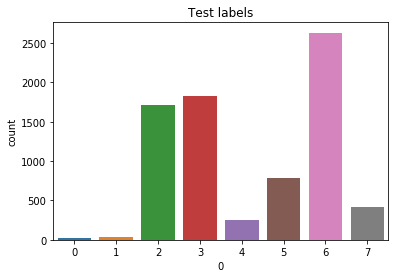

In [59]:
plt.title("Test labels")
sns.countplot(x=0,data=pd.DataFrame(y))

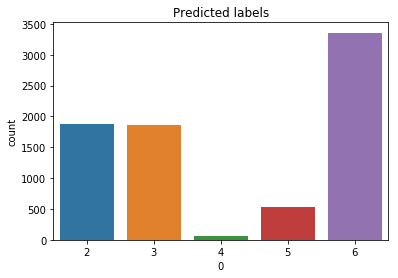

In [60]:
plt.title("Predicted labels")
sns.countplot(x=0,data=pd.DataFrame(predictions))

## After Oversampling

In [61]:
file_path = "model.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10)

In [62]:
def build_model2(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
    inp = Input(shape = (max_len,))
    x = Embedding(20001, embed_size, weights = [embedding_matrix], trainable = False)(inp)
    x1 = SpatialDropout1D(dr)(x)

    x_lstm = Bidirectional(LSTM(units, return_sequences = True))(x1)
    x1 = Conv1D(32, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm1 = GlobalAveragePooling1D()(x1)
    max_pool1_lstm1 = GlobalMaxPooling1D()(x1)
    
    
    x_lstm = Bidirectional(LSTM(units, return_sequences = True))(x1)
    x1 = Conv1D(32, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm = GlobalAveragePooling1D()(x1)
    max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
    
    
    x = concatenate([avg_pool1_lstm1, max_pool1_lstm1,
                    avg_pool1_lstm, max_pool1_lstm])
    #x = BatchNormalization()(x)
    x = Dropout(0.1)(Dense(128,activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(0.1)(Dense(64,activation='relu') (x))
    x = Dense(8, activation = "sigmoid")(x)
    model1 = Model(inputs = inp, outputs = x)
    model1.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    history = model1.fit(X_resampled, y_resampled, batch_size = 128, epochs = 20, validation_split=0.1, 
                        verbose = 1, callbacks = [check_point, early_stop])
    model1 = load_model(file_path)
    return model1

In [63]:
model1 = build_model2(lr = 1e-3, lr_d = 0, units = 128, dr = 0.5)

Train on 49149 samples, validate on 5461 samples
Epoch 1/20


25984/49149 [==============>...............] - ETA: 40:05 - loss: 0.6970 - acc: 0.55 - ETA: 23:32 - loss: 0.6756 - acc: 0.58 - ETA: 18:02 - loss: 0.6672 - acc: 0.59 - ETA: 15:21 - loss: 0.6547 - acc: 0.61 - ETA: 13:36 - loss: 0.6425 - acc: 0.63 - ETA: 12:29 - loss: 0.6324 - acc: 0.64 - ETA: 11:37 - loss: 0.6240 - acc: 0.65 - ETA: 10:59 - loss: 0.6175 - acc: 0.66 - ETA: 10:32 - loss: 0.6082 - acc: 0.67 - ETA: 10:07 - loss: 0.6005 - acc: 0.68 - ETA: 9:50 - loss: 0.5926 - acc: 0.6930 - ETA: 9:35 - loss: 0.5847 - acc: 0.702 - ETA: 9:21 - loss: 0.5771 - acc: 0.709 - ETA: 9:08 - loss: 0.5701 - acc: 0.718 - ETA: 8:58 - loss: 0.5635 - acc: 0.725 - ETA: 8:48 - loss: 0.5561 - acc: 0.733 - ETA: 8:38 - loss: 0.5492 - acc: 0.740 - ETA: 8:29 - loss: 0.5420 - acc: 0.746 - ETA: 8:22 - loss: 0.5359 - acc: 0.752 - ETA: 8:16 - loss: 0.5301 - acc: 0.757 - ETA: 8:11 - loss: 0.5255 - acc: 0.762 - ETA: 8:06 - loss: 0.5211 - acc: 0.766 - ETA: 8:02 - loss: 0.5164 - acc: 0.770 - ETA: 7:58 - loss: 0.5122 - acc: 

49149/49149 [==============================] - ETA: 3:26 - loss: 0.3616 - acc: 0.860 - ETA: 3:25 - loss: 0.3614 - acc: 0.860 - ETA: 3:24 - loss: 0.3611 - acc: 0.860 - ETA: 3:22 - loss: 0.3609 - acc: 0.860 - ETA: 3:21 - loss: 0.3607 - acc: 0.860 - ETA: 3:20 - loss: 0.3607 - acc: 0.860 - ETA: 3:19 - loss: 0.3605 - acc: 0.861 - ETA: 3:18 - loss: 0.3604 - acc: 0.861 - ETA: 3:17 - loss: 0.3602 - acc: 0.861 - ETA: 3:15 - loss: 0.3599 - acc: 0.861 - ETA: 3:14 - loss: 0.3599 - acc: 0.861 - ETA: 3:13 - loss: 0.3597 - acc: 0.861 - ETA: 3:12 - loss: 0.3596 - acc: 0.861 - ETA: 3:11 - loss: 0.3594 - acc: 0.861 - ETA: 3:10 - loss: 0.3592 - acc: 0.861 - ETA: 3:08 - loss: 0.3591 - acc: 0.861 - ETA: 3:07 - loss: 0.3590 - acc: 0.861 - ETA: 3:06 - loss: 0.3588 - acc: 0.861 - ETA: 3:05 - loss: 0.3587 - acc: 0.861 - ETA: 3:04 - loss: 0.3586 - acc: 0.861 - ETA: 3:03 - loss: 0.3584 - acc: 0.861 - ETA: 3:01 - loss: 0.3583 - acc: 0.861 - ETA: 3:00 - loss: 0.3582 - acc: 0.861 - ETA: 2:59 - loss: 0.3580 - acc: 0

26112/49149 [==============>...............] - ETA: 7:15 - loss: 0.3014 - acc: 0.879 - ETA: 6:47 - loss: 0.2929 - acc: 0.886 - ETA: 6:46 - loss: 0.2923 - acc: 0.885 - ETA: 6:49 - loss: 0.2962 - acc: 0.883 - ETA: 6:45 - loss: 0.2994 - acc: 0.884 - ETA: 6:43 - loss: 0.2967 - acc: 0.884 - ETA: 6:42 - loss: 0.2946 - acc: 0.883 - ETA: 6:39 - loss: 0.2985 - acc: 0.881 - ETA: 6:38 - loss: 0.2970 - acc: 0.881 - ETA: 6:36 - loss: 0.2971 - acc: 0.881 - ETA: 6:34 - loss: 0.2991 - acc: 0.879 - ETA: 6:38 - loss: 0.2995 - acc: 0.880 - ETA: 6:44 - loss: 0.3003 - acc: 0.880 - ETA: 6:45 - loss: 0.2992 - acc: 0.880 - ETA: 6:45 - loss: 0.2993 - acc: 0.879 - ETA: 6:43 - loss: 0.2972 - acc: 0.880 - ETA: 6:43 - loss: 0.2979 - acc: 0.880 - ETA: 6:41 - loss: 0.2974 - acc: 0.880 - ETA: 6:41 - loss: 0.2969 - acc: 0.881 - ETA: 6:38 - loss: 0.2971 - acc: 0.881 - ETA: 6:36 - loss: 0.2961 - acc: 0.880 - ETA: 6:34 - loss: 0.2954 - acc: 0.881 - ETA: 6:33 - loss: 0.2961 - acc: 0.880 - ETA: 6:30 - loss: 0.2968 - acc: 0

49149/49149 [==============================] - ETA: 3:01 - loss: 0.2934 - acc: 0.882 - ETA: 3:00 - loss: 0.2934 - acc: 0.882 - ETA: 2:59 - loss: 0.2934 - acc: 0.882 - ETA: 2:58 - loss: 0.2934 - acc: 0.882 - ETA: 2:57 - loss: 0.2932 - acc: 0.882 - ETA: 2:56 - loss: 0.2932 - acc: 0.882 - ETA: 2:55 - loss: 0.2931 - acc: 0.882 - ETA: 2:54 - loss: 0.2931 - acc: 0.882 - ETA: 2:53 - loss: 0.2930 - acc: 0.882 - ETA: 2:52 - loss: 0.2929 - acc: 0.882 - ETA: 2:51 - loss: 0.2930 - acc: 0.882 - ETA: 2:49 - loss: 0.2929 - acc: 0.882 - ETA: 2:48 - loss: 0.2929 - acc: 0.882 - ETA: 2:47 - loss: 0.2928 - acc: 0.882 - ETA: 2:46 - loss: 0.2928 - acc: 0.882 - ETA: 2:45 - loss: 0.2927 - acc: 0.882 - ETA: 2:44 - loss: 0.2927 - acc: 0.882 - ETA: 2:43 - loss: 0.2926 - acc: 0.882 - ETA: 2:42 - loss: 0.2927 - acc: 0.882 - ETA: 2:41 - loss: 0.2925 - acc: 0.882 - ETA: 2:40 - loss: 0.2924 - acc: 0.882 - ETA: 2:39 - loss: 0.2924 - acc: 0.882 - ETA: 2:38 - loss: 0.2924 - acc: 0.882 - ETA: 2:37 - loss: 0.2923 - acc: 0

26112/49149 [==============>...............] - ETA: 6:04 - loss: 0.2580 - acc: 0.890 - ETA: 6:05 - loss: 0.2547 - acc: 0.891 - ETA: 6:04 - loss: 0.2587 - acc: 0.890 - ETA: 6:13 - loss: 0.2532 - acc: 0.894 - ETA: 6:10 - loss: 0.2538 - acc: 0.893 - ETA: 6:08 - loss: 0.2581 - acc: 0.892 - ETA: 6:05 - loss: 0.2588 - acc: 0.893 - ETA: 6:04 - loss: 0.2608 - acc: 0.894 - ETA: 6:02 - loss: 0.2611 - acc: 0.893 - ETA: 6:01 - loss: 0.2632 - acc: 0.892 - ETA: 6:00 - loss: 0.2614 - acc: 0.892 - ETA: 5:59 - loss: 0.2643 - acc: 0.891 - ETA: 5:57 - loss: 0.2638 - acc: 0.891 - ETA: 5:54 - loss: 0.2640 - acc: 0.891 - ETA: 5:52 - loss: 0.2637 - acc: 0.890 - ETA: 5:50 - loss: 0.2644 - acc: 0.890 - ETA: 5:50 - loss: 0.2646 - acc: 0.890 - ETA: 5:50 - loss: 0.2641 - acc: 0.890 - ETA: 5:51 - loss: 0.2640 - acc: 0.890 - ETA: 5:51 - loss: 0.2633 - acc: 0.890 - ETA: 5:50 - loss: 0.2638 - acc: 0.890 - ETA: 5:50 - loss: 0.2641 - acc: 0.890 - ETA: 5:49 - loss: 0.2632 - acc: 0.891 - ETA: 5:48 - loss: 0.2627 - acc: 0

49149/49149 [==============================] - ETA: 2:49 - loss: 0.2602 - acc: 0.892 - ETA: 2:48 - loss: 0.2601 - acc: 0.892 - ETA: 2:47 - loss: 0.2602 - acc: 0.892 - ETA: 2:46 - loss: 0.2600 - acc: 0.892 - ETA: 2:45 - loss: 0.2599 - acc: 0.892 - ETA: 2:44 - loss: 0.2599 - acc: 0.892 - ETA: 2:43 - loss: 0.2600 - acc: 0.892 - ETA: 2:42 - loss: 0.2599 - acc: 0.892 - ETA: 2:42 - loss: 0.2599 - acc: 0.892 - ETA: 2:41 - loss: 0.2598 - acc: 0.892 - ETA: 2:40 - loss: 0.2597 - acc: 0.892 - ETA: 2:39 - loss: 0.2598 - acc: 0.892 - ETA: 2:38 - loss: 0.2599 - acc: 0.892 - ETA: 2:37 - loss: 0.2600 - acc: 0.892 - ETA: 2:36 - loss: 0.2599 - acc: 0.892 - ETA: 2:35 - loss: 0.2598 - acc: 0.892 - ETA: 2:34 - loss: 0.2597 - acc: 0.892 - ETA: 2:33 - loss: 0.2597 - acc: 0.892 - ETA: 2:32 - loss: 0.2597 - acc: 0.892 - ETA: 2:31 - loss: 0.2597 - acc: 0.892 - ETA: 2:30 - loss: 0.2595 - acc: 0.892 - ETA: 2:29 - loss: 0.2594 - acc: 0.892 - ETA: 2:28 - loss: 0.2596 - acc: 0.892 - ETA: 2:27 - loss: 0.2596 - acc: 0

26112/49149 [==============>...............] - ETA: 6:05 - loss: 0.2438 - acc: 0.891 - ETA: 6:04 - loss: 0.2436 - acc: 0.893 - ETA: 6:02 - loss: 0.2483 - acc: 0.894 - ETA: 6:04 - loss: 0.2459 - acc: 0.896 - ETA: 6:03 - loss: 0.2490 - acc: 0.894 - ETA: 6:03 - loss: 0.2489 - acc: 0.894 - ETA: 6:03 - loss: 0.2476 - acc: 0.894 - ETA: 6:03 - loss: 0.2475 - acc: 0.895 - ETA: 6:02 - loss: 0.2476 - acc: 0.894 - ETA: 6:02 - loss: 0.2466 - acc: 0.894 - ETA: 6:01 - loss: 0.2459 - acc: 0.895 - ETA: 6:00 - loss: 0.2458 - acc: 0.896 - ETA: 5:58 - loss: 0.2478 - acc: 0.895 - ETA: 5:57 - loss: 0.2469 - acc: 0.895 - ETA: 5:56 - loss: 0.2459 - acc: 0.895 - ETA: 5:55 - loss: 0.2462 - acc: 0.895 - ETA: 5:53 - loss: 0.2451 - acc: 0.896 - ETA: 5:51 - loss: 0.2451 - acc: 0.895 - ETA: 5:50 - loss: 0.2459 - acc: 0.895 - ETA: 5:49 - loss: 0.2469 - acc: 0.895 - ETA: 5:48 - loss: 0.2465 - acc: 0.895 - ETA: 5:48 - loss: 0.2465 - acc: 0.896 - ETA: 5:47 - loss: 0.2456 - acc: 0.896 - ETA: 5:46 - loss: 0.2458 - acc: 0

49149/49149 [==============================] - ETA: 2:51 - loss: 0.2444 - acc: 0.897 - ETA: 2:50 - loss: 0.2443 - acc: 0.897 - ETA: 2:49 - loss: 0.2443 - acc: 0.897 - ETA: 2:48 - loss: 0.2442 - acc: 0.897 - ETA: 2:47 - loss: 0.2443 - acc: 0.897 - ETA: 2:46 - loss: 0.2444 - acc: 0.897 - ETA: 2:45 - loss: 0.2443 - acc: 0.897 - ETA: 2:44 - loss: 0.2443 - acc: 0.897 - ETA: 2:43 - loss: 0.2443 - acc: 0.897 - ETA: 2:42 - loss: 0.2442 - acc: 0.897 - ETA: 2:41 - loss: 0.2442 - acc: 0.897 - ETA: 2:40 - loss: 0.2442 - acc: 0.897 - ETA: 2:39 - loss: 0.2443 - acc: 0.897 - ETA: 2:38 - loss: 0.2443 - acc: 0.897 - ETA: 2:37 - loss: 0.2442 - acc: 0.897 - ETA: 2:36 - loss: 0.2443 - acc: 0.897 - ETA: 2:35 - loss: 0.2442 - acc: 0.897 - ETA: 2:34 - loss: 0.2442 - acc: 0.897 - ETA: 2:33 - loss: 0.2442 - acc: 0.897 - ETA: 2:32 - loss: 0.2441 - acc: 0.897 - ETA: 2:31 - loss: 0.2441 - acc: 0.897 - ETA: 2:30 - loss: 0.2441 - acc: 0.897 - ETA: 2:29 - loss: 0.2441 - acc: 0.897 - ETA: 2:28 - loss: 0.2440 - acc: 0

26112/49149 [==============>...............] - ETA: 9:35 - loss: 0.2518 - acc: 0.894 - ETA: 9:24 - loss: 0.2470 - acc: 0.898 - ETA: 9:11 - loss: 0.2426 - acc: 0.898 - ETA: 9:03 - loss: 0.2463 - acc: 0.896 - ETA: 8:56 - loss: 0.2465 - acc: 0.895 - ETA: 8:55 - loss: 0.2499 - acc: 0.894 - ETA: 8:53 - loss: 0.2469 - acc: 0.895 - ETA: 8:53 - loss: 0.2452 - acc: 0.895 - ETA: 8:52 - loss: 0.2449 - acc: 0.894 - ETA: 8:53 - loss: 0.2429 - acc: 0.895 - ETA: 8:52 - loss: 0.2413 - acc: 0.895 - ETA: 8:51 - loss: 0.2431 - acc: 0.895 - ETA: 8:49 - loss: 0.2438 - acc: 0.896 - ETA: 8:48 - loss: 0.2440 - acc: 0.896 - ETA: 8:47 - loss: 0.2439 - acc: 0.896 - ETA: 8:45 - loss: 0.2436 - acc: 0.896 - ETA: 8:44 - loss: 0.2435 - acc: 0.896 - ETA: 8:42 - loss: 0.2434 - acc: 0.896 - ETA: 8:41 - loss: 0.2425 - acc: 0.896 - ETA: 8:39 - loss: 0.2424 - acc: 0.896 - ETA: 8:37 - loss: 0.2419 - acc: 0.896 - ETA: 8:35 - loss: 0.2412 - acc: 0.896 - ETA: 8:34 - loss: 0.2415 - acc: 0.896 - ETA: 8:32 - loss: 0.2413 - acc: 0

49149/49149 [==============================] - ETA: 4:11 - loss: 0.2378 - acc: 0.899 - ETA: 4:10 - loss: 0.2379 - acc: 0.899 - ETA: 4:08 - loss: 0.2380 - acc: 0.899 - ETA: 4:07 - loss: 0.2381 - acc: 0.898 - ETA: 4:06 - loss: 0.2380 - acc: 0.899 - ETA: 4:04 - loss: 0.2380 - acc: 0.899 - ETA: 4:03 - loss: 0.2379 - acc: 0.899 - ETA: 4:01 - loss: 0.2380 - acc: 0.899 - ETA: 4:00 - loss: 0.2380 - acc: 0.899 - ETA: 3:58 - loss: 0.2378 - acc: 0.899 - ETA: 3:57 - loss: 0.2380 - acc: 0.899 - ETA: 3:56 - loss: 0.2381 - acc: 0.899 - ETA: 3:54 - loss: 0.2380 - acc: 0.899 - ETA: 3:53 - loss: 0.2379 - acc: 0.899 - ETA: 3:51 - loss: 0.2381 - acc: 0.899 - ETA: 3:50 - loss: 0.2382 - acc: 0.899 - ETA: 3:48 - loss: 0.2383 - acc: 0.899 - ETA: 3:47 - loss: 0.2383 - acc: 0.899 - ETA: 3:45 - loss: 0.2383 - acc: 0.899 - ETA: 3:44 - loss: 0.2382 - acc: 0.899 - ETA: 3:42 - loss: 0.2382 - acc: 0.899 - ETA: 3:41 - loss: 0.2381 - acc: 0.899 - ETA: 3:39 - loss: 0.2382 - acc: 0.899 - ETA: 3:38 - loss: 0.2382 - acc: 0

26112/49149 [==============>...............] - ETA: 8:48 - loss: 0.2284 - acc: 0.901 - ETA: 8:58 - loss: 0.2382 - acc: 0.897 - ETA: 9:02 - loss: 0.2332 - acc: 0.896 - ETA: 9:00 - loss: 0.2279 - acc: 0.900 - ETA: 8:59 - loss: 0.2242 - acc: 0.901 - ETA: 8:54 - loss: 0.2243 - acc: 0.902 - ETA: 8:52 - loss: 0.2257 - acc: 0.901 - ETA: 8:49 - loss: 0.2269 - acc: 0.900 - ETA: 8:49 - loss: 0.2251 - acc: 0.901 - ETA: 8:47 - loss: 0.2274 - acc: 0.900 - ETA: 8:45 - loss: 0.2265 - acc: 0.901 - ETA: 8:44 - loss: 0.2274 - acc: 0.901 - ETA: 8:45 - loss: 0.2263 - acc: 0.902 - ETA: 8:41 - loss: 0.2254 - acc: 0.902 - ETA: 8:37 - loss: 0.2263 - acc: 0.902 - ETA: 8:34 - loss: 0.2262 - acc: 0.901 - ETA: 8:32 - loss: 0.2277 - acc: 0.901 - ETA: 8:31 - loss: 0.2283 - acc: 0.901 - ETA: 8:30 - loss: 0.2294 - acc: 0.900 - ETA: 8:30 - loss: 0.2300 - acc: 0.900 - ETA: 8:29 - loss: 0.2302 - acc: 0.899 - ETA: 8:28 - loss: 0.2297 - acc: 0.899 - ETA: 8:25 - loss: 0.2299 - acc: 0.900 - ETA: 8:24 - loss: 0.2297 - acc: 0

49149/49149 [==============================] - ETA: 4:14 - loss: 0.2331 - acc: 0.900 - ETA: 4:12 - loss: 0.2331 - acc: 0.900 - ETA: 4:11 - loss: 0.2332 - acc: 0.900 - ETA: 4:09 - loss: 0.2331 - acc: 0.900 - ETA: 4:08 - loss: 0.2332 - acc: 0.900 - ETA: 4:06 - loss: 0.2332 - acc: 0.900 - ETA: 4:05 - loss: 0.2331 - acc: 0.900 - ETA: 4:04 - loss: 0.2331 - acc: 0.900 - ETA: 4:02 - loss: 0.2331 - acc: 0.900 - ETA: 4:01 - loss: 0.2331 - acc: 0.900 - ETA: 3:59 - loss: 0.2329 - acc: 0.900 - ETA: 3:58 - loss: 0.2328 - acc: 0.901 - ETA: 3:56 - loss: 0.2328 - acc: 0.901 - ETA: 3:55 - loss: 0.2328 - acc: 0.901 - ETA: 3:53 - loss: 0.2327 - acc: 0.901 - ETA: 3:52 - loss: 0.2326 - acc: 0.901 - ETA: 3:50 - loss: 0.2326 - acc: 0.901 - ETA: 3:49 - loss: 0.2325 - acc: 0.901 - ETA: 3:47 - loss: 0.2326 - acc: 0.901 - ETA: 3:46 - loss: 0.2326 - acc: 0.901 - ETA: 3:44 - loss: 0.2327 - acc: 0.901 - ETA: 3:43 - loss: 0.2327 - acc: 0.901 - ETA: 3:41 - loss: 0.2326 - acc: 0.901 - ETA: 3:40 - loss: 0.2325 - acc: 0

26112/49149 [==============>...............] - ETA: 8:55 - loss: 0.2145 - acc: 0.907 - ETA: 8:55 - loss: 0.2206 - acc: 0.908 - ETA: 8:49 - loss: 0.2226 - acc: 0.905 - ETA: 8:49 - loss: 0.2317 - acc: 0.904 - ETA: 8:54 - loss: 0.2307 - acc: 0.907 - ETA: 8:55 - loss: 0.2376 - acc: 0.903 - ETA: 8:50 - loss: 0.2327 - acc: 0.905 - ETA: 8:49 - loss: 0.2313 - acc: 0.905 - ETA: 8:44 - loss: 0.2302 - acc: 0.905 - ETA: 8:40 - loss: 0.2304 - acc: 0.905 - ETA: 8:36 - loss: 0.2326 - acc: 0.904 - ETA: 8:36 - loss: 0.2311 - acc: 0.905 - ETA: 8:35 - loss: 0.2304 - acc: 0.905 - ETA: 8:34 - loss: 0.2303 - acc: 0.904 - ETA: 8:32 - loss: 0.2308 - acc: 0.904 - ETA: 8:32 - loss: 0.2301 - acc: 0.904 - ETA: 8:30 - loss: 0.2305 - acc: 0.903 - ETA: 8:29 - loss: 0.2302 - acc: 0.903 - ETA: 8:29 - loss: 0.2301 - acc: 0.903 - ETA: 8:28 - loss: 0.2306 - acc: 0.903 - ETA: 8:28 - loss: 0.2310 - acc: 0.903 - ETA: 8:26 - loss: 0.2307 - acc: 0.903 - ETA: 8:25 - loss: 0.2296 - acc: 0.903 - ETA: 8:23 - loss: 0.2291 - acc: 0

49149/49149 [==============================] - ETA: 4:06 - loss: 0.2273 - acc: 0.902 - ETA: 4:04 - loss: 0.2272 - acc: 0.903 - ETA: 4:03 - loss: 0.2272 - acc: 0.903 - ETA: 4:02 - loss: 0.2273 - acc: 0.903 - ETA: 4:00 - loss: 0.2273 - acc: 0.903 - ETA: 3:59 - loss: 0.2273 - acc: 0.903 - ETA: 3:57 - loss: 0.2273 - acc: 0.903 - ETA: 3:56 - loss: 0.2273 - acc: 0.903 - ETA: 3:55 - loss: 0.2273 - acc: 0.903 - ETA: 3:53 - loss: 0.2273 - acc: 0.903 - ETA: 3:52 - loss: 0.2274 - acc: 0.903 - ETA: 3:51 - loss: 0.2275 - acc: 0.903 - ETA: 3:49 - loss: 0.2274 - acc: 0.903 - ETA: 3:48 - loss: 0.2275 - acc: 0.903 - ETA: 3:46 - loss: 0.2276 - acc: 0.902 - ETA: 3:45 - loss: 0.2276 - acc: 0.902 - ETA: 3:44 - loss: 0.2275 - acc: 0.903 - ETA: 3:42 - loss: 0.2275 - acc: 0.903 - ETA: 3:41 - loss: 0.2274 - acc: 0.903 - ETA: 3:40 - loss: 0.2275 - acc: 0.903 - ETA: 3:38 - loss: 0.2274 - acc: 0.903 - ETA: 3:37 - loss: 0.2274 - acc: 0.903 - ETA: 3:36 - loss: 0.2273 - acc: 0.903 - ETA: 3:34 - loss: 0.2273 - acc: 0

26112/49149 [==============>...............] - ETA: 8:56 - loss: 0.2005 - acc: 0.918 - ETA: 8:54 - loss: 0.2184 - acc: 0.909 - ETA: 8:52 - loss: 0.2221 - acc: 0.907 - ETA: 8:54 - loss: 0.2264 - acc: 0.905 - ETA: 8:51 - loss: 0.2252 - acc: 0.904 - ETA: 8:51 - loss: 0.2238 - acc: 0.904 - ETA: 8:50 - loss: 0.2280 - acc: 0.903 - ETA: 8:48 - loss: 0.2239 - acc: 0.905 - ETA: 8:48 - loss: 0.2232 - acc: 0.905 - ETA: 8:47 - loss: 0.2221 - acc: 0.905 - ETA: 8:45 - loss: 0.2231 - acc: 0.904 - ETA: 8:44 - loss: 0.2224 - acc: 0.905 - ETA: 8:41 - loss: 0.2238 - acc: 0.904 - ETA: 8:39 - loss: 0.2227 - acc: 0.904 - ETA: 8:36 - loss: 0.2224 - acc: 0.904 - ETA: 8:34 - loss: 0.2228 - acc: 0.904 - ETA: 8:33 - loss: 0.2232 - acc: 0.904 - ETA: 8:32 - loss: 0.2232 - acc: 0.904 - ETA: 8:31 - loss: 0.2245 - acc: 0.904 - ETA: 8:30 - loss: 0.2267 - acc: 0.903 - ETA: 8:29 - loss: 0.2268 - acc: 0.903 - ETA: 8:27 - loss: 0.2267 - acc: 0.902 - ETA: 8:25 - loss: 0.2274 - acc: 0.902 - ETA: 8:24 - loss: 0.2277 - acc: 0

49149/49149 [==============================] - ETA: 4:11 - loss: 0.2211 - acc: 0.905 - ETA: 4:09 - loss: 0.2210 - acc: 0.905 - ETA: 4:08 - loss: 0.2210 - acc: 0.905 - ETA: 4:06 - loss: 0.2210 - acc: 0.905 - ETA: 4:05 - loss: 0.2211 - acc: 0.905 - ETA: 4:04 - loss: 0.2211 - acc: 0.905 - ETA: 4:02 - loss: 0.2212 - acc: 0.905 - ETA: 4:01 - loss: 0.2212 - acc: 0.905 - ETA: 3:59 - loss: 0.2210 - acc: 0.905 - ETA: 3:58 - loss: 0.2211 - acc: 0.905 - ETA: 3:56 - loss: 0.2212 - acc: 0.905 - ETA: 3:55 - loss: 0.2212 - acc: 0.905 - ETA: 3:54 - loss: 0.2213 - acc: 0.905 - ETA: 3:52 - loss: 0.2212 - acc: 0.905 - ETA: 3:51 - loss: 0.2212 - acc: 0.905 - ETA: 3:49 - loss: 0.2213 - acc: 0.905 - ETA: 3:48 - loss: 0.2213 - acc: 0.905 - ETA: 3:47 - loss: 0.2213 - acc: 0.905 - ETA: 3:45 - loss: 0.2213 - acc: 0.905 - ETA: 3:44 - loss: 0.2213 - acc: 0.905 - ETA: 3:42 - loss: 0.2214 - acc: 0.905 - ETA: 3:41 - loss: 0.2213 - acc: 0.905 - ETA: 3:40 - loss: 0.2213 - acc: 0.905 - ETA: 3:38 - loss: 0.2213 - acc: 0

26112/49149 [==============>...............] - ETA: 8:49 - loss: 0.1967 - acc: 0.909 - ETA: 8:45 - loss: 0.2104 - acc: 0.906 - ETA: 8:49 - loss: 0.2189 - acc: 0.901 - ETA: 8:52 - loss: 0.2146 - acc: 0.905 - ETA: 8:53 - loss: 0.2154 - acc: 0.905 - ETA: 8:52 - loss: 0.2238 - acc: 0.903 - ETA: 8:52 - loss: 0.2205 - acc: 0.904 - ETA: 8:50 - loss: 0.2192 - acc: 0.904 - ETA: 8:49 - loss: 0.2186 - acc: 0.904 - ETA: 8:49 - loss: 0.2163 - acc: 0.906 - ETA: 8:46 - loss: 0.2151 - acc: 0.907 - ETA: 8:44 - loss: 0.2164 - acc: 0.906 - ETA: 8:43 - loss: 0.2150 - acc: 0.907 - ETA: 8:40 - loss: 0.2164 - acc: 0.906 - ETA: 8:38 - loss: 0.2155 - acc: 0.906 - ETA: 8:37 - loss: 0.2167 - acc: 0.906 - ETA: 8:35 - loss: 0.2169 - acc: 0.906 - ETA: 8:33 - loss: 0.2173 - acc: 0.905 - ETA: 8:32 - loss: 0.2187 - acc: 0.904 - ETA: 8:30 - loss: 0.2186 - acc: 0.905 - ETA: 8:29 - loss: 0.2185 - acc: 0.905 - ETA: 8:28 - loss: 0.2192 - acc: 0.904 - ETA: 8:26 - loss: 0.2201 - acc: 0.904 - ETA: 8:25 - loss: 0.2208 - acc: 0

49149/49149 [==============================] - ETA: 4:07 - loss: 0.2185 - acc: 0.906 - ETA: 4:06 - loss: 0.2184 - acc: 0.906 - ETA: 4:05 - loss: 0.2185 - acc: 0.906 - ETA: 4:03 - loss: 0.2185 - acc: 0.906 - ETA: 4:02 - loss: 0.2184 - acc: 0.906 - ETA: 4:00 - loss: 0.2184 - acc: 0.906 - ETA: 3:59 - loss: 0.2183 - acc: 0.906 - ETA: 3:58 - loss: 0.2182 - acc: 0.906 - ETA: 3:56 - loss: 0.2183 - acc: 0.906 - ETA: 3:55 - loss: 0.2184 - acc: 0.906 - ETA: 3:53 - loss: 0.2183 - acc: 0.906 - ETA: 3:52 - loss: 0.2184 - acc: 0.906 - ETA: 3:51 - loss: 0.2184 - acc: 0.906 - ETA: 3:49 - loss: 0.2185 - acc: 0.906 - ETA: 3:48 - loss: 0.2185 - acc: 0.906 - ETA: 3:47 - loss: 0.2185 - acc: 0.906 - ETA: 3:45 - loss: 0.2186 - acc: 0.906 - ETA: 3:44 - loss: 0.2186 - acc: 0.906 - ETA: 3:43 - loss: 0.2186 - acc: 0.906 - ETA: 3:41 - loss: 0.2187 - acc: 0.906 - ETA: 3:40 - loss: 0.2187 - acc: 0.906 - ETA: 3:38 - loss: 0.2186 - acc: 0.906 - ETA: 3:37 - loss: 0.2187 - acc: 0.906 - ETA: 3:36 - loss: 0.2187 - acc: 0

26112/49149 [==============>...............] - ETA: 8:52 - loss: 0.2097 - acc: 0.903 - ETA: 8:59 - loss: 0.2182 - acc: 0.901 - ETA: 8:54 - loss: 0.2201 - acc: 0.905 - ETA: 8:53 - loss: 0.2170 - acc: 0.906 - ETA: 8:51 - loss: 0.2170 - acc: 0.907 - ETA: 8:49 - loss: 0.2169 - acc: 0.906 - ETA: 8:49 - loss: 0.2153 - acc: 0.908 - ETA: 8:48 - loss: 0.2147 - acc: 0.908 - ETA: 8:47 - loss: 0.2127 - acc: 0.909 - ETA: 8:47 - loss: 0.2128 - acc: 0.909 - ETA: 8:44 - loss: 0.2130 - acc: 0.909 - ETA: 8:44 - loss: 0.2129 - acc: 0.909 - ETA: 8:42 - loss: 0.2128 - acc: 0.909 - ETA: 8:38 - loss: 0.2142 - acc: 0.908 - ETA: 8:37 - loss: 0.2145 - acc: 0.908 - ETA: 8:35 - loss: 0.2140 - acc: 0.908 - ETA: 8:33 - loss: 0.2138 - acc: 0.908 - ETA: 8:29 - loss: 0.2129 - acc: 0.908 - ETA: 8:29 - loss: 0.2128 - acc: 0.908 - ETA: 8:27 - loss: 0.2125 - acc: 0.908 - ETA: 8:24 - loss: 0.2133 - acc: 0.907 - ETA: 8:22 - loss: 0.2130 - acc: 0.907 - ETA: 8:21 - loss: 0.2112 - acc: 0.908 - ETA: 8:21 - loss: 0.2108 - acc: 0

49149/49149 [==============================] - ETA: 4:20 - loss: 0.2125 - acc: 0.909 - ETA: 4:19 - loss: 0.2126 - acc: 0.909 - ETA: 4:17 - loss: 0.2126 - acc: 0.909 - ETA: 4:16 - loss: 0.2125 - acc: 0.909 - ETA: 4:14 - loss: 0.2125 - acc: 0.909 - ETA: 4:13 - loss: 0.2126 - acc: 0.909 - ETA: 4:11 - loss: 0.2125 - acc: 0.909 - ETA: 4:10 - loss: 0.2126 - acc: 0.909 - ETA: 4:08 - loss: 0.2125 - acc: 0.909 - ETA: 4:06 - loss: 0.2125 - acc: 0.909 - ETA: 4:05 - loss: 0.2125 - acc: 0.909 - ETA: 4:03 - loss: 0.2125 - acc: 0.909 - ETA: 4:02 - loss: 0.2125 - acc: 0.909 - ETA: 4:00 - loss: 0.2125 - acc: 0.909 - ETA: 3:59 - loss: 0.2125 - acc: 0.909 - ETA: 3:57 - loss: 0.2125 - acc: 0.909 - ETA: 3:56 - loss: 0.2124 - acc: 0.909 - ETA: 3:54 - loss: 0.2125 - acc: 0.909 - ETA: 3:53 - loss: 0.2125 - acc: 0.909 - ETA: 3:51 - loss: 0.2125 - acc: 0.909 - ETA: 3:50 - loss: 0.2125 - acc: 0.909 - ETA: 3:48 - loss: 0.2126 - acc: 0.909 - ETA: 3:47 - loss: 0.2127 - acc: 0.909 - ETA: 3:45 - loss: 0.2126 - acc: 0

26112/49149 [==============>...............] - ETA: 8:35 - loss: 0.2180 - acc: 0.908 - ETA: 8:45 - loss: 0.2233 - acc: 0.907 - ETA: 8:58 - loss: 0.2273 - acc: 0.902 - ETA: 9:04 - loss: 0.2216 - acc: 0.904 - ETA: 9:00 - loss: 0.2176 - acc: 0.905 - ETA: 8:57 - loss: 0.2175 - acc: 0.906 - ETA: 8:50 - loss: 0.2142 - acc: 0.907 - ETA: 8:50 - loss: 0.2163 - acc: 0.906 - ETA: 8:45 - loss: 0.2169 - acc: 0.907 - ETA: 8:41 - loss: 0.2171 - acc: 0.907 - ETA: 8:36 - loss: 0.2173 - acc: 0.906 - ETA: 8:35 - loss: 0.2167 - acc: 0.907 - ETA: 8:32 - loss: 0.2144 - acc: 0.909 - ETA: 8:32 - loss: 0.2139 - acc: 0.908 - ETA: 8:32 - loss: 0.2118 - acc: 0.910 - ETA: 8:30 - loss: 0.2121 - acc: 0.910 - ETA: 8:30 - loss: 0.2117 - acc: 0.910 - ETA: 8:29 - loss: 0.2107 - acc: 0.910 - ETA: 8:28 - loss: 0.2098 - acc: 0.910 - ETA: 8:27 - loss: 0.2104 - acc: 0.910 - ETA: 8:27 - loss: 0.2092 - acc: 0.911 - ETA: 8:24 - loss: 0.2088 - acc: 0.911 - ETA: 8:23 - loss: 0.2085 - acc: 0.911 - ETA: 8:22 - loss: 0.2088 - acc: 0

49149/49149 [==============================] - ETA: 4:09 - loss: 0.2074 - acc: 0.911 - ETA: 4:07 - loss: 0.2074 - acc: 0.911 - ETA: 4:06 - loss: 0.2075 - acc: 0.911 - ETA: 4:05 - loss: 0.2075 - acc: 0.911 - ETA: 4:03 - loss: 0.2075 - acc: 0.911 - ETA: 4:02 - loss: 0.2077 - acc: 0.911 - ETA: 4:01 - loss: 0.2078 - acc: 0.911 - ETA: 3:59 - loss: 0.2078 - acc: 0.911 - ETA: 3:58 - loss: 0.2079 - acc: 0.911 - ETA: 3:57 - loss: 0.2079 - acc: 0.911 - ETA: 3:55 - loss: 0.2078 - acc: 0.911 - ETA: 3:54 - loss: 0.2079 - acc: 0.911 - ETA: 3:52 - loss: 0.2079 - acc: 0.911 - ETA: 3:51 - loss: 0.2081 - acc: 0.911 - ETA: 3:50 - loss: 0.2083 - acc: 0.911 - ETA: 3:48 - loss: 0.2083 - acc: 0.911 - ETA: 3:47 - loss: 0.2082 - acc: 0.911 - ETA: 3:46 - loss: 0.2081 - acc: 0.911 - ETA: 3:44 - loss: 0.2081 - acc: 0.911 - ETA: 3:43 - loss: 0.2082 - acc: 0.911 - ETA: 3:42 - loss: 0.2081 - acc: 0.911 - ETA: 3:40 - loss: 0.2082 - acc: 0.911 - ETA: 3:39 - loss: 0.2083 - acc: 0.911 - ETA: 3:38 - loss: 0.2084 - acc: 0

26112/49149 [==============>...............] - ETA: 9:42 - loss: 0.2124 - acc: 0.908 - ETA: 9:27 - loss: 0.2146 - acc: 0.905 - ETA: 9:29 - loss: 0.2205 - acc: 0.903 - ETA: 9:30 - loss: 0.2153 - acc: 0.906 - ETA: 9:27 - loss: 0.2122 - acc: 0.906 - ETA: 9:22 - loss: 0.2114 - acc: 0.907 - ETA: 9:18 - loss: 0.2115 - acc: 0.906 - ETA: 9:15 - loss: 0.2132 - acc: 0.906 - ETA: 9:14 - loss: 0.2119 - acc: 0.907 - ETA: 9:07 - loss: 0.2092 - acc: 0.909 - ETA: 9:02 - loss: 0.2091 - acc: 0.910 - ETA: 9:00 - loss: 0.2100 - acc: 0.909 - ETA: 8:58 - loss: 0.2096 - acc: 0.909 - ETA: 8:54 - loss: 0.2097 - acc: 0.908 - ETA: 8:52 - loss: 0.2104 - acc: 0.908 - ETA: 8:51 - loss: 0.2086 - acc: 0.909 - ETA: 8:51 - loss: 0.2085 - acc: 0.909 - ETA: 8:50 - loss: 0.2062 - acc: 0.910 - ETA: 8:49 - loss: 0.2049 - acc: 0.911 - ETA: 8:48 - loss: 0.2043 - acc: 0.912 - ETA: 8:48 - loss: 0.2036 - acc: 0.912 - ETA: 8:46 - loss: 0.2039 - acc: 0.912 - ETA: 8:44 - loss: 0.2036 - acc: 0.912 - ETA: 8:43 - loss: 0.2035 - acc: 0

49149/49149 [==============================] - ETA: 4:21 - loss: 0.2046 - acc: 0.911 - ETA: 4:20 - loss: 0.2045 - acc: 0.911 - ETA: 4:18 - loss: 0.2045 - acc: 0.911 - ETA: 4:17 - loss: 0.2045 - acc: 0.911 - ETA: 4:15 - loss: 0.2044 - acc: 0.912 - ETA: 4:14 - loss: 0.2043 - acc: 0.912 - ETA: 4:13 - loss: 0.2042 - acc: 0.912 - ETA: 4:11 - loss: 0.2042 - acc: 0.912 - ETA: 4:10 - loss: 0.2043 - acc: 0.912 - ETA: 4:08 - loss: 0.2044 - acc: 0.912 - ETA: 4:07 - loss: 0.2046 - acc: 0.911 - ETA: 4:05 - loss: 0.2046 - acc: 0.912 - ETA: 4:04 - loss: 0.2044 - acc: 0.912 - ETA: 4:02 - loss: 0.2046 - acc: 0.911 - ETA: 4:01 - loss: 0.2046 - acc: 0.911 - ETA: 3:59 - loss: 0.2046 - acc: 0.911 - ETA: 3:58 - loss: 0.2047 - acc: 0.911 - ETA: 3:56 - loss: 0.2047 - acc: 0.911 - ETA: 3:55 - loss: 0.2046 - acc: 0.911 - ETA: 3:53 - loss: 0.2046 - acc: 0.911 - ETA: 3:52 - loss: 0.2046 - acc: 0.911 - ETA: 3:50 - loss: 0.2046 - acc: 0.912 - ETA: 3:49 - loss: 0.2046 - acc: 0.911 - ETA: 3:47 - loss: 0.2045 - acc: 0

26112/49149 [==============>...............] - ETA: 8:29 - loss: 0.2234 - acc: 0.899 - ETA: 8:42 - loss: 0.2196 - acc: 0.899 - ETA: 8:46 - loss: 0.2179 - acc: 0.900 - ETA: 8:51 - loss: 0.2144 - acc: 0.904 - ETA: 8:50 - loss: 0.2093 - acc: 0.908 - ETA: 8:51 - loss: 0.2057 - acc: 0.910 - ETA: 8:50 - loss: 0.2054 - acc: 0.910 - ETA: 8:49 - loss: 0.2033 - acc: 0.912 - ETA: 8:48 - loss: 0.2056 - acc: 0.911 - ETA: 8:47 - loss: 0.2042 - acc: 0.912 - ETA: 8:45 - loss: 0.2031 - acc: 0.912 - ETA: 8:43 - loss: 0.2040 - acc: 0.911 - ETA: 8:42 - loss: 0.2048 - acc: 0.910 - ETA: 8:40 - loss: 0.2044 - acc: 0.911 - ETA: 8:38 - loss: 0.2068 - acc: 0.909 - ETA: 8:35 - loss: 0.2081 - acc: 0.909 - ETA: 8:33 - loss: 0.2076 - acc: 0.909 - ETA: 8:31 - loss: 0.2070 - acc: 0.909 - ETA: 8:31 - loss: 0.2067 - acc: 0.909 - ETA: 8:29 - loss: 0.2069 - acc: 0.910 - ETA: 8:28 - loss: 0.2073 - acc: 0.910 - ETA: 8:27 - loss: 0.2065 - acc: 0.910 - ETA: 8:26 - loss: 0.2064 - acc: 0.910 - ETA: 8:25 - loss: 0.2063 - acc: 0

49149/49149 [==============================] - ETA: 4:10 - loss: 0.2017 - acc: 0.913 - ETA: 4:09 - loss: 0.2017 - acc: 0.913 - ETA: 4:08 - loss: 0.2017 - acc: 0.913 - ETA: 4:06 - loss: 0.2016 - acc: 0.913 - ETA: 4:05 - loss: 0.2017 - acc: 0.913 - ETA: 4:03 - loss: 0.2016 - acc: 0.913 - ETA: 4:02 - loss: 0.2016 - acc: 0.913 - ETA: 4:00 - loss: 0.2016 - acc: 0.913 - ETA: 3:59 - loss: 0.2015 - acc: 0.913 - ETA: 3:57 - loss: 0.2016 - acc: 0.913 - ETA: 3:56 - loss: 0.2015 - acc: 0.913 - ETA: 3:54 - loss: 0.2015 - acc: 0.913 - ETA: 3:53 - loss: 0.2014 - acc: 0.913 - ETA: 3:51 - loss: 0.2014 - acc: 0.913 - ETA: 3:49 - loss: 0.2015 - acc: 0.913 - ETA: 3:48 - loss: 0.2014 - acc: 0.913 - ETA: 3:46 - loss: 0.2013 - acc: 0.913 - ETA: 3:45 - loss: 0.2013 - acc: 0.913 - ETA: 3:44 - loss: 0.2013 - acc: 0.913 - ETA: 3:42 - loss: 0.2013 - acc: 0.913 - ETA: 3:41 - loss: 0.2012 - acc: 0.913 - ETA: 3:40 - loss: 0.2011 - acc: 0.913 - ETA: 3:38 - loss: 0.2010 - acc: 0.913 - ETA: 3:37 - loss: 0.2009 - acc: 0

26112/49149 [==============>...............] - ETA: 8:46 - loss: 0.2041 - acc: 0.913 - ETA: 8:46 - loss: 0.2064 - acc: 0.911 - ETA: 8:53 - loss: 0.2026 - acc: 0.913 - ETA: 8:49 - loss: 0.1961 - acc: 0.918 - ETA: 8:49 - loss: 0.1961 - acc: 0.918 - ETA: 8:49 - loss: 0.1974 - acc: 0.918 - ETA: 8:49 - loss: 0.1987 - acc: 0.917 - ETA: 8:47 - loss: 0.1998 - acc: 0.915 - ETA: 8:47 - loss: 0.1982 - acc: 0.915 - ETA: 8:45 - loss: 0.1969 - acc: 0.916 - ETA: 8:44 - loss: 0.1949 - acc: 0.916 - ETA: 8:42 - loss: 0.1955 - acc: 0.916 - ETA: 8:41 - loss: 0.1955 - acc: 0.916 - ETA: 8:40 - loss: 0.1954 - acc: 0.917 - ETA: 8:38 - loss: 0.1974 - acc: 0.916 - ETA: 8:38 - loss: 0.1978 - acc: 0.916 - ETA: 8:35 - loss: 0.1963 - acc: 0.916 - ETA: 8:32 - loss: 0.1977 - acc: 0.915 - ETA: 8:28 - loss: 0.1973 - acc: 0.915 - ETA: 8:26 - loss: 0.1970 - acc: 0.915 - ETA: 8:24 - loss: 0.1977 - acc: 0.915 - ETA: 8:22 - loss: 0.1978 - acc: 0.915 - ETA: 8:21 - loss: 0.1973 - acc: 0.915 - ETA: 8:20 - loss: 0.1966 - acc: 0

49149/49149 [==============================] - ETA: 4:11 - loss: 0.1968 - acc: 0.915 - ETA: 4:09 - loss: 0.1970 - acc: 0.915 - ETA: 4:08 - loss: 0.1970 - acc: 0.915 - ETA: 4:07 - loss: 0.1970 - acc: 0.915 - ETA: 4:05 - loss: 0.1970 - acc: 0.915 - ETA: 4:04 - loss: 0.1969 - acc: 0.915 - ETA: 4:02 - loss: 0.1970 - acc: 0.915 - ETA: 4:01 - loss: 0.1970 - acc: 0.915 - ETA: 3:59 - loss: 0.1970 - acc: 0.915 - ETA: 3:58 - loss: 0.1971 - acc: 0.915 - ETA: 3:57 - loss: 0.1970 - acc: 0.915 - ETA: 3:55 - loss: 0.1970 - acc: 0.915 - ETA: 3:54 - loss: 0.1971 - acc: 0.915 - ETA: 3:53 - loss: 0.1971 - acc: 0.915 - ETA: 3:51 - loss: 0.1970 - acc: 0.915 - ETA: 3:50 - loss: 0.1970 - acc: 0.915 - ETA: 3:48 - loss: 0.1971 - acc: 0.915 - ETA: 3:47 - loss: 0.1971 - acc: 0.915 - ETA: 3:45 - loss: 0.1971 - acc: 0.915 - ETA: 3:44 - loss: 0.1970 - acc: 0.915 - ETA: 3:43 - loss: 0.1969 - acc: 0.915 - ETA: 3:41 - loss: 0.1969 - acc: 0.915 - ETA: 3:40 - loss: 0.1968 - acc: 0.915 - ETA: 3:38 - loss: 0.1968 - acc: 0

26112/49149 [==============>...............] - ETA: 9:17 - loss: 0.2237 - acc: 0.910 - ETA: 9:16 - loss: 0.2181 - acc: 0.912 - ETA: 9:20 - loss: 0.2111 - acc: 0.913 - ETA: 9:22 - loss: 0.2009 - acc: 0.917 - ETA: 9:18 - loss: 0.1996 - acc: 0.916 - ETA: 9:12 - loss: 0.1994 - acc: 0.916 - ETA: 9:09 - loss: 0.2025 - acc: 0.915 - ETA: 9:07 - loss: 0.2006 - acc: 0.915 - ETA: 9:06 - loss: 0.1975 - acc: 0.916 - ETA: 9:05 - loss: 0.1971 - acc: 0.915 - ETA: 9:04 - loss: 0.1972 - acc: 0.915 - ETA: 9:05 - loss: 0.1955 - acc: 0.917 - ETA: 9:04 - loss: 0.1942 - acc: 0.918 - ETA: 9:03 - loss: 0.1936 - acc: 0.918 - ETA: 9:01 - loss: 0.1936 - acc: 0.918 - ETA: 8:59 - loss: 0.1931 - acc: 0.918 - ETA: 8:59 - loss: 0.1927 - acc: 0.918 - ETA: 8:56 - loss: 0.1921 - acc: 0.918 - ETA: 8:55 - loss: 0.1926 - acc: 0.918 - ETA: 8:53 - loss: 0.1914 - acc: 0.919 - ETA: 8:52 - loss: 0.1916 - acc: 0.919 - ETA: 8:49 - loss: 0.1917 - acc: 0.919 - ETA: 8:47 - loss: 0.1926 - acc: 0.918 - ETA: 8:44 - loss: 0.1915 - acc: 0

49149/49149 [==============================] - ETA: 4:22 - loss: 0.1937 - acc: 0.917 - ETA: 4:20 - loss: 0.1937 - acc: 0.917 - ETA: 4:19 - loss: 0.1938 - acc: 0.917 - ETA: 4:17 - loss: 0.1937 - acc: 0.917 - ETA: 4:16 - loss: 0.1939 - acc: 0.917 - ETA: 4:14 - loss: 0.1938 - acc: 0.917 - ETA: 4:13 - loss: 0.1938 - acc: 0.917 - ETA: 4:11 - loss: 0.1937 - acc: 0.917 - ETA: 4:10 - loss: 0.1937 - acc: 0.917 - ETA: 4:08 - loss: 0.1936 - acc: 0.917 - ETA: 4:07 - loss: 0.1936 - acc: 0.917 - ETA: 4:05 - loss: 0.1936 - acc: 0.917 - ETA: 4:04 - loss: 0.1935 - acc: 0.917 - ETA: 4:02 - loss: 0.1933 - acc: 0.917 - ETA: 4:01 - loss: 0.1934 - acc: 0.917 - ETA: 3:59 - loss: 0.1933 - acc: 0.917 - ETA: 3:58 - loss: 0.1933 - acc: 0.917 - ETA: 3:56 - loss: 0.1933 - acc: 0.917 - ETA: 3:55 - loss: 0.1934 - acc: 0.917 - ETA: 3:53 - loss: 0.1934 - acc: 0.917 - ETA: 3:52 - loss: 0.1934 - acc: 0.917 - ETA: 3:50 - loss: 0.1934 - acc: 0.917 - ETA: 3:49 - loss: 0.1933 - acc: 0.917 - ETA: 3:47 - loss: 0.1932 - acc: 0

26112/49149 [==============>...............] - ETA: 8:40 - loss: 0.1857 - acc: 0.921 - ETA: 8:44 - loss: 0.1923 - acc: 0.919 - ETA: 8:39 - loss: 0.1878 - acc: 0.921 - ETA: 8:37 - loss: 0.1842 - acc: 0.921 - ETA: 8:33 - loss: 0.1909 - acc: 0.919 - ETA: 8:32 - loss: 0.1904 - acc: 0.919 - ETA: 8:35 - loss: 0.1882 - acc: 0.921 - ETA: 8:32 - loss: 0.1878 - acc: 0.921 - ETA: 8:29 - loss: 0.1882 - acc: 0.920 - ETA: 8:26 - loss: 0.1871 - acc: 0.920 - ETA: 8:24 - loss: 0.1870 - acc: 0.920 - ETA: 8:24 - loss: 0.1868 - acc: 0.920 - ETA: 8:24 - loss: 0.1886 - acc: 0.919 - ETA: 8:22 - loss: 0.1906 - acc: 0.918 - ETA: 8:21 - loss: 0.1897 - acc: 0.918 - ETA: 8:20 - loss: 0.1900 - acc: 0.919 - ETA: 8:20 - loss: 0.1893 - acc: 0.919 - ETA: 8:19 - loss: 0.1902 - acc: 0.919 - ETA: 8:18 - loss: 0.1896 - acc: 0.919 - ETA: 8:17 - loss: 0.1892 - acc: 0.919 - ETA: 8:15 - loss: 0.1897 - acc: 0.919 - ETA: 8:15 - loss: 0.1888 - acc: 0.919 - ETA: 8:13 - loss: 0.1887 - acc: 0.920 - ETA: 8:11 - loss: 0.1879 - acc: 0

49149/49149 [==============================] - ETA: 4:07 - loss: 0.1904 - acc: 0.918 - ETA: 4:06 - loss: 0.1905 - acc: 0.918 - ETA: 4:04 - loss: 0.1905 - acc: 0.918 - ETA: 4:03 - loss: 0.1905 - acc: 0.918 - ETA: 4:01 - loss: 0.1905 - acc: 0.918 - ETA: 4:00 - loss: 0.1905 - acc: 0.918 - ETA: 3:59 - loss: 0.1906 - acc: 0.918 - ETA: 3:57 - loss: 0.1907 - acc: 0.918 - ETA: 3:56 - loss: 0.1908 - acc: 0.918 - ETA: 3:55 - loss: 0.1908 - acc: 0.918 - ETA: 3:53 - loss: 0.1908 - acc: 0.918 - ETA: 3:52 - loss: 0.1908 - acc: 0.918 - ETA: 3:50 - loss: 0.1908 - acc: 0.918 - ETA: 3:49 - loss: 0.1907 - acc: 0.918 - ETA: 3:48 - loss: 0.1907 - acc: 0.918 - ETA: 3:46 - loss: 0.1906 - acc: 0.918 - ETA: 3:45 - loss: 0.1906 - acc: 0.918 - ETA: 3:44 - loss: 0.1904 - acc: 0.918 - ETA: 3:42 - loss: 0.1904 - acc: 0.918 - ETA: 3:41 - loss: 0.1905 - acc: 0.918 - ETA: 3:40 - loss: 0.1907 - acc: 0.918 - ETA: 3:38 - loss: 0.1909 - acc: 0.918 - ETA: 3:37 - loss: 0.1909 - acc: 0.918 - ETA: 3:35 - loss: 0.1908 - acc: 0

26112/49149 [==============>...............] - ETA: 9:30 - loss: 0.1863 - acc: 0.920 - ETA: 9:18 - loss: 0.1769 - acc: 0.928 - ETA: 9:13 - loss: 0.1827 - acc: 0.922 - ETA: 9:07 - loss: 0.1841 - acc: 0.921 - ETA: 9:03 - loss: 0.1879 - acc: 0.919 - ETA: 9:00 - loss: 0.1912 - acc: 0.917 - ETA: 8:57 - loss: 0.1931 - acc: 0.916 - ETA: 8:55 - loss: 0.1910 - acc: 0.917 - ETA: 8:50 - loss: 0.1887 - acc: 0.918 - ETA: 8:49 - loss: 0.1855 - acc: 0.920 - ETA: 8:45 - loss: 0.1853 - acc: 0.920 - ETA: 8:41 - loss: 0.1822 - acc: 0.921 - ETA: 8:38 - loss: 0.1824 - acc: 0.921 - ETA: 8:36 - loss: 0.1817 - acc: 0.921 - ETA: 8:34 - loss: 0.1813 - acc: 0.921 - ETA: 8:31 - loss: 0.1804 - acc: 0.921 - ETA: 8:31 - loss: 0.1811 - acc: 0.921 - ETA: 8:30 - loss: 0.1828 - acc: 0.921 - ETA: 8:28 - loss: 0.1826 - acc: 0.921 - ETA: 8:27 - loss: 0.1831 - acc: 0.921 - ETA: 8:25 - loss: 0.1832 - acc: 0.921 - ETA: 8:24 - loss: 0.1836 - acc: 0.920 - ETA: 8:23 - loss: 0.1821 - acc: 0.921 - ETA: 8:21 - loss: 0.1814 - acc: 0

49149/49149 [==============================] - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:07 - loss: 0.1845 - acc: 0.921 - ETA: 4:06 - loss: 0.1845 - acc: 0.921 - ETA: 4:04 - loss: 0.1844 - acc: 0.921 - ETA: 4:03 - loss: 0.1844 - acc: 0.921 - ETA: 4:02 - loss: 0.1843 - acc: 0.921 - ETA: 4:00 - loss: 0.1843 - acc: 0.921 - ETA: 3:59 - loss: 0.1843 - acc: 0.921 - ETA: 3:57 - loss: 0.1844 - acc: 0.921 - ETA: 3:56 - loss: 0.1844 - acc: 0.921 - ETA: 3:55 - loss: 0.1844 - acc: 0.921 - ETA: 3:53 - loss: 0.1844 - acc: 0.921 - ETA: 3:52 - loss: 0.1843 - acc: 0.921 - ETA: 3:50 - loss: 0.1843 - acc: 0.921 - ETA: 3:49 - loss: 0.1844 - acc: 0.921 - ETA: 3:48 - loss: 0.1844 - acc: 0.921 - ETA: 3:46 - loss: 0.1844 - acc: 0.921 - ETA: 3:45 - loss: 0.1844 - acc: 0.921 - ETA: 3:43 - loss: 0.1845 - acc: 0.921 - ETA: 3:42 - loss: 0.1846 - acc: 0.921 - ETA: 3:41 - loss: 0.1847 - acc: 0.921 - ETA: 3:39 - loss: 0.1846 - acc: 0.921 - ETA: 3:38 - loss: 0.1847 - acc: 0.921 - ETA: 3:37 - loss: 0.1848 - acc: 0

26112/49149 [==============>...............] - ETA: 9:52 - loss: 0.1900 - acc: 0.919 - ETA: 10:05 - loss: 0.1937 - acc: 0.91 - ETA: 10:03 - loss: 0.1988 - acc: 0.91 - ETA: 10:06 - loss: 0.1937 - acc: 0.91 - ETA: 10:03 - loss: 0.1953 - acc: 0.91 - ETA: 10:03 - loss: 0.1966 - acc: 0.91 - ETA: 10:02 - loss: 0.1982 - acc: 0.91 - ETA: 10:01 - loss: 0.1930 - acc: 0.91 - ETA: 9:59 - loss: 0.1920 - acc: 0.9188 - ETA: 9:58 - loss: 0.1906 - acc: 0.919 - ETA: 9:56 - loss: 0.1895 - acc: 0.919 - ETA: 9:54 - loss: 0.1904 - acc: 0.919 - ETA: 9:53 - loss: 0.1894 - acc: 0.919 - ETA: 9:50 - loss: 0.1879 - acc: 0.920 - ETA: 9:47 - loss: 0.1867 - acc: 0.921 - ETA: 9:44 - loss: 0.1858 - acc: 0.921 - ETA: 9:43 - loss: 0.1844 - acc: 0.921 - ETA: 9:42 - loss: 0.1826 - acc: 0.922 - ETA: 9:40 - loss: 0.1828 - acc: 0.922 - ETA: 9:39 - loss: 0.1817 - acc: 0.922 - ETA: 9:38 - loss: 0.1809 - acc: 0.923 - ETA: 9:37 - loss: 0.1813 - acc: 0.922 - ETA: 9:35 - loss: 0.1815 - acc: 0.922 - ETA: 9:35 - loss: 0.1804 - acc: 

49149/49149 [==============================] - ETA: 4:44 - loss: 0.1837 - acc: 0.922 - ETA: 4:43 - loss: 0.1838 - acc: 0.921 - ETA: 4:41 - loss: 0.1838 - acc: 0.921 - ETA: 4:40 - loss: 0.1838 - acc: 0.921 - ETA: 4:38 - loss: 0.1837 - acc: 0.921 - ETA: 4:36 - loss: 0.1837 - acc: 0.921 - ETA: 4:35 - loss: 0.1838 - acc: 0.921 - ETA: 4:33 - loss: 0.1839 - acc: 0.921 - ETA: 4:32 - loss: 0.1838 - acc: 0.921 - ETA: 4:30 - loss: 0.1838 - acc: 0.922 - ETA: 4:28 - loss: 0.1838 - acc: 0.922 - ETA: 4:27 - loss: 0.1838 - acc: 0.921 - ETA: 4:25 - loss: 0.1838 - acc: 0.921 - ETA: 4:24 - loss: 0.1839 - acc: 0.921 - ETA: 4:22 - loss: 0.1839 - acc: 0.921 - ETA: 4:21 - loss: 0.1841 - acc: 0.921 - ETA: 4:19 - loss: 0.1841 - acc: 0.921 - ETA: 4:17 - loss: 0.1840 - acc: 0.921 - ETA: 4:16 - loss: 0.1840 - acc: 0.921 - ETA: 4:14 - loss: 0.1840 - acc: 0.921 - ETA: 4:12 - loss: 0.1840 - acc: 0.921 - ETA: 4:11 - loss: 0.1840 - acc: 0.921 - ETA: 4:09 - loss: 0.1840 - acc: 0.921 - ETA: 4:08 - loss: 0.1841 - acc: 0

26112/49149 [==============>...............] - ETA: 10:15 - loss: 0.1512 - acc: 0.94 - ETA: 9:55 - loss: 0.1634 - acc: 0.9316 - ETA: 9:48 - loss: 0.1592 - acc: 0.934 - ETA: 9:44 - loss: 0.1599 - acc: 0.934 - ETA: 9:46 - loss: 0.1653 - acc: 0.932 - ETA: 9:47 - loss: 0.1677 - acc: 0.929 - ETA: 9:47 - loss: 0.1693 - acc: 0.928 - ETA: 9:46 - loss: 0.1696 - acc: 0.928 - ETA: 9:47 - loss: 0.1725 - acc: 0.927 - ETA: 9:46 - loss: 0.1715 - acc: 0.928 - ETA: 9:45 - loss: 0.1743 - acc: 0.926 - ETA: 9:43 - loss: 0.1751 - acc: 0.926 - ETA: 9:41 - loss: 0.1765 - acc: 0.924 - ETA: 9:40 - loss: 0.1775 - acc: 0.924 - ETA: 9:39 - loss: 0.1763 - acc: 0.924 - ETA: 9:38 - loss: 0.1783 - acc: 0.923 - ETA: 9:36 - loss: 0.1809 - acc: 0.922 - ETA: 9:35 - loss: 0.1814 - acc: 0.922 - ETA: 9:32 - loss: 0.1798 - acc: 0.922 - ETA: 9:31 - loss: 0.1793 - acc: 0.923 - ETA: 9:29 - loss: 0.1811 - acc: 0.922 - ETA: 9:27 - loss: 0.1804 - acc: 0.922 - ETA: 9:26 - loss: 0.1811 - acc: 0.921 - ETA: 9:25 - loss: 0.1817 - acc: 

49149/49149 [==============================] - ETA: 4:41 - loss: 0.1814 - acc: 0.923 - ETA: 4:39 - loss: 0.1812 - acc: 0.923 - ETA: 4:37 - loss: 0.1812 - acc: 0.923 - ETA: 4:36 - loss: 0.1812 - acc: 0.923 - ETA: 4:34 - loss: 0.1812 - acc: 0.923 - ETA: 4:33 - loss: 0.1813 - acc: 0.923 - ETA: 4:31 - loss: 0.1811 - acc: 0.923 - ETA: 4:30 - loss: 0.1812 - acc: 0.923 - ETA: 4:28 - loss: 0.1810 - acc: 0.923 - ETA: 4:26 - loss: 0.1812 - acc: 0.923 - ETA: 4:25 - loss: 0.1811 - acc: 0.923 - ETA: 4:23 - loss: 0.1811 - acc: 0.923 - ETA: 4:22 - loss: 0.1812 - acc: 0.923 - ETA: 4:20 - loss: 0.1812 - acc: 0.923 - ETA: 4:19 - loss: 0.1812 - acc: 0.923 - ETA: 4:17 - loss: 0.1812 - acc: 0.923 - ETA: 4:16 - loss: 0.1812 - acc: 0.923 - ETA: 4:14 - loss: 0.1810 - acc: 0.923 - ETA: 4:12 - loss: 0.1810 - acc: 0.923 - ETA: 4:11 - loss: 0.1811 - acc: 0.923 - ETA: 4:09 - loss: 0.1812 - acc: 0.923 - ETA: 4:08 - loss: 0.1812 - acc: 0.923 - ETA: 4:06 - loss: 0.1811 - acc: 0.923 - ETA: 4:04 - loss: 0.1811 - acc: 0

26112/49149 [==============>...............] - ETA: 7:45 - loss: 0.1489 - acc: 0.936 - ETA: 7:42 - loss: 0.1796 - acc: 0.921 - ETA: 7:36 - loss: 0.1746 - acc: 0.925 - ETA: 8:18 - loss: 0.1731 - acc: 0.926 - ETA: 8:59 - loss: 0.1753 - acc: 0.925 - ETA: 8:41 - loss: 0.1746 - acc: 0.925 - ETA: 8:27 - loss: 0.1783 - acc: 0.924 - ETA: 8:19 - loss: 0.1743 - acc: 0.926 - ETA: 8:13 - loss: 0.1734 - acc: 0.926 - ETA: 8:12 - loss: 0.1735 - acc: 0.925 - ETA: 8:22 - loss: 0.1732 - acc: 0.926 - ETA: 8:16 - loss: 0.1734 - acc: 0.925 - ETA: 8:11 - loss: 0.1736 - acc: 0.926 - ETA: 8:10 - loss: 0.1731 - acc: 0.927 - ETA: 8:05 - loss: 0.1726 - acc: 0.927 - ETA: 8:01 - loss: 0.1729 - acc: 0.927 - ETA: 7:56 - loss: 0.1719 - acc: 0.928 - ETA: 8:02 - loss: 0.1720 - acc: 0.927 - ETA: 7:59 - loss: 0.1724 - acc: 0.927 - ETA: 7:54 - loss: 0.1729 - acc: 0.927 - ETA: 7:56 - loss: 0.1737 - acc: 0.926 - ETA: 7:57 - loss: 0.1740 - acc: 0.926 - ETA: 7:59 - loss: 0.1733 - acc: 0.927 - ETA: 7:55 - loss: 0.1728 - acc: 0

49149/49149 [==============================] - ETA: 23:53 - loss: 0.1775 - acc: 0.92 - ETA: 23:47 - loss: 0.1774 - acc: 0.92 - ETA: 23:41 - loss: 0.1774 - acc: 0.92 - ETA: 23:36 - loss: 0.1773 - acc: 0.92 - ETA: 23:31 - loss: 0.1774 - acc: 0.92 - ETA: 23:26 - loss: 0.1773 - acc: 0.92 - ETA: 23:21 - loss: 0.1773 - acc: 0.92 - ETA: 23:15 - loss: 0.1774 - acc: 0.92 - ETA: 23:08 - loss: 0.1773 - acc: 0.92 - ETA: 23:03 - loss: 0.1773 - acc: 0.92 - ETA: 22:57 - loss: 0.1773 - acc: 0.92 - ETA: 22:51 - loss: 0.1774 - acc: 0.92 - ETA: 22:45 - loss: 0.1773 - acc: 0.92 - ETA: 22:39 - loss: 0.1772 - acc: 0.92 - ETA: 22:32 - loss: 0.1773 - acc: 0.92 - ETA: 22:26 - loss: 0.1773 - acc: 0.92 - ETA: 22:19 - loss: 0.1773 - acc: 0.92 - ETA: 22:13 - loss: 0.1772 - acc: 0.92 - ETA: 22:07 - loss: 0.1773 - acc: 0.92 - ETA: 22:02 - loss: 0.1773 - acc: 0.92 - ETA: 21:55 - loss: 0.1774 - acc: 0.92 - ETA: 21:48 - loss: 0.1774 - acc: 0.92 - ETA: 21:41 - loss: 0.1773 - acc: 0.92 - ETA: 21:34 - loss: 0.1773 - acc: 

In [64]:
pred1 = model1.predict(X_test, batch_size = 1024, verbose = 1)
predictions1 = np.round(np.argmax(pred1, axis=1)).astype(int)
y = test['sentiment']
y=lb.fit_transform(y)

7669/7669 [==============================] - ETA: 24 - ETA: 17 - ETA: 13 - ETA: 10 - ETA: 7 - ETA:  - ETA:  - 21s 3ms/step


In [65]:
from sklearn import metrics
metrics.accuracy_score(y,predictions1)

0.4668144477767636

In [66]:
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score
print(metrics.classification_report(y,predictions1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        30
           2       0.42      0.44      0.43      1709
           3       0.43      0.58      0.49      1826
           4       0.23      0.20      0.21       248
           5       0.39      0.46      0.42       790
           6       0.61      0.51      0.56      2633
           7       0.29      0.01      0.02       412

   micro avg       0.47      0.47      0.47      7669
   macro avg       0.30      0.28      0.27      7669
weighted avg       0.47      0.47      0.46      7669



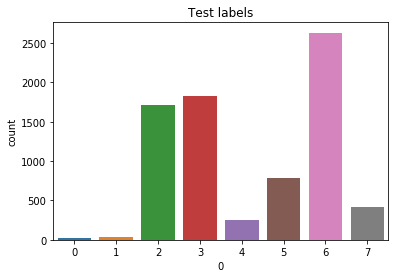

In [67]:
plt.title("Test labels")
sns.countplot(x=0,data=pd.DataFrame(y))

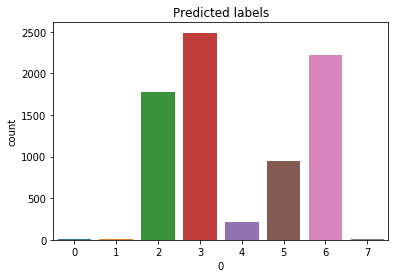

In [68]:
plt.title("Predicted labels")
sns.countplot(x=0,data=pd.DataFrame(predictions1))